# Real Estate Pricing

## Importing major labraries

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [3]:
df=pd.read_csv('housing_data.csv')
df

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley  \
0              0       SC60       RL           65     8450   Pave  None   
1              1       SC20       RL           80     9600   Pave  None   
2              2       SC60       RL           68    11250   Pave  None   
3              3       SC70       RL           60     9550   Pave  None   
4              4       SC60       RL           84    14260   Pave  None   
...          ...        ...      ...          ...      ...    ...   ...   
1455        1455       SC60       RL           62     7917   Pave  None   
1456        1456       SC20       RL           85    13175   Pave  None   
1457        1457       SC70       RL           66     9042   Pave  None   
1458        1458       SC20       RL           68     9717   Pave  None   
1459        1459       SC20       RL           75     9937   Pave  None   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0     No     No          No   
1         Reg         Lvl    AllPub  ...        0     No     No          No   
2         IR1         Lvl    AllPub  ...        0     No     No          No   
3         IR1         Lvl    AllPub  ...        0     No     No          No   
4         IR1         Lvl    AllPub  ...        0     No     No          No   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0     No     No          No   
1456      Reg         Lvl    AllPub  ...        0     No  MnPrv          No   
1457      Reg         Lvl    AllPub  ...        0     No  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0     No     No          No   
1459      Reg         Lvl    AllPub  ...        0     No     No          No   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0    Feb   2008        WD         Normal     208500  
1          0    May   2007        WD         Normal     181500  
2          0    Sep   2008        WD         Normal     223500  
3          0    Feb   2006        WD        Abnorml     140000  
4          0    Dec   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0    Aug   2007        WD         Normal     175000  
1456       0    Feb   2010        WD         Normal     210000  
1457    2500    May   2010        WD         Normal     266500  
1458       0    Apr   2010        WD         Normal     142125  
1459       0    Jun   2008        WD         Normal     147500  

[1460 rows x 81 columns]

## Summary of dataset

In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   int64  
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe()

Unnamed: 0  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    57.623288   10516.828082     6.099315     5.575342   
std     421.610009    34.664304    9981.264932     1.382997     1.112799   
min       0.000000     0.000000    1300.000000     1.000000     1.000000   
25%     364.750000    42.000000    7553.500000     5.000000     5.000000   
50%     729.500000    63.000000    9478.500000     6.000000     5.000000   
75%    1094.250000    79.000000   11601.500000     7.000000     6.000000   
max    1459.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.117123   443.639726    46.549315  ...   
std      30.202904     20.645407   180.731373   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   164.250000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       YrSold      SalePrice  
count  1460.000000  1460.000000   1460.000000  1460.000000    1460.000000  
mean     15.060959     2.758904     43.489041  2007.815753  180921.195890  
std      55.757415    40.177307    496.123024     1.328095   79442.502883  
min       0.000000     0.000000      0.000000  2006.000000   34900.000000  
25%       0.000000     0.000000      0.000000  2007.000000  129975.000000  
50%       0.000000     0.000000      0.000000  2008.000000  163000.000000  
75%       0.000000     0.000000      0.000000  2009.000000  214000.000000  
max     480.000000   738.000000  15500.000000  2010.000000  755000.000000  

[8 rows x 36 columns]

## Checking Null values in dataset

In [7]:
df.isnull().sum()

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

## Checking columns in dataset

In [8]:
columns=df.columns
columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

## Checking duplicates value in dataset

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [10]:
df.duplicated().sum()

0

In [11]:
# means there are zero duplicate rows

## Checking Correlation of Sales Price with numerical colums

In [12]:
c=df.corr()
c

Unnamed: 0  LotFrontage   LotArea  OverallQual  OverallCond  \
Unnamed: 0       1.000000    -0.019761 -0.033226    -0.028365     0.012609   
LotFrontage     -0.019761     1.000000  0.100739     0.176561    -0.053457   
LotArea         -0.033226     0.100739  1.000000     0.105806    -0.005636   
OverallQual     -0.028365     0.176561  0.105806     1.000000    -0.091932   
OverallCond      0.012609    -0.053457 -0.005636    -0.091932     1.000000   
YearBuilt       -0.012713     0.036853  0.014228     0.572323    -0.375983   
YearRemodAdd    -0.021998     0.078686  0.013788     0.550684     0.073741   
MasVnrArea      -0.051071     0.105010  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.005024     0.076670  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.005968    -0.009312  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.007940     0.160829 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.015415     0.238274  0.260833     0.537808    -0.171098   
1stFlrSF         0.010496     0.245181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.005590     0.042549  0.050986     0.295493     0.028942   
LowQualFinSF    -0.044230     0.049981  0.004779    -0.030429     0.025494   
GrLivArea        0.008273     0.220347  0.263116     0.593007    -0.079686   
BsmtFullBath     0.002289     0.010514  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.020155    -0.027856  0.048046    -0.040150     0.117821   
FullBath         0.005587     0.120548  0.126031     0.550600    -0.194149   
HalfBath         0.006784    -0.012952  0.014259     0.273458    -0.060769   
BedroomAbvGr     0.037719     0.144494  0.119690     0.101676     0.012980   
KitchenAbvGr     0.002951     0.034425 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.027239     0.221396  0.190015     0.427452    -0.057583   
Fireplaces      -0.019772     0.044018  0.271364     0.396765    -0.023820   
GarageYrBlt      0.000072     0.044045 -0.024947     0.547766    -0.324297   
GarageCars       0.016570     0.165229  0.154871     0.600671    -0.185758   
GarageArea       0.017634     0.201473  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.029643    -0.016780  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.000477     0.069605  0.084774     0.308819    -0.032589   
EnclosedPorch    0.002889     0.027366 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.046635     0.023499  0.020423     0.030371     0.025504   
ScreenPorch      0.001330     0.022969  0.043160     0.064886     0.054811   
PoolArea         0.057044     0.114106  0.077672     0.065166    -0.001985   
MiscVal         -0.006242    -0.059606  0.038068    -0.031406     0.068777   
YrSold           0.000712    -0.012094 -0.014261    -0.027347     0.043950   
SalePrice       -0.021917     0.209624  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
Unnamed: 0     -0.012713     -0.021998   -0.051071   -0.005024   -0.005968   
LotFrontage     0.036853      0.078686    0.105010    0.076670   -0.009312   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.240379    0.339850    0.445863    0.097117   
2ndFlrSF        0.010308      0.1400

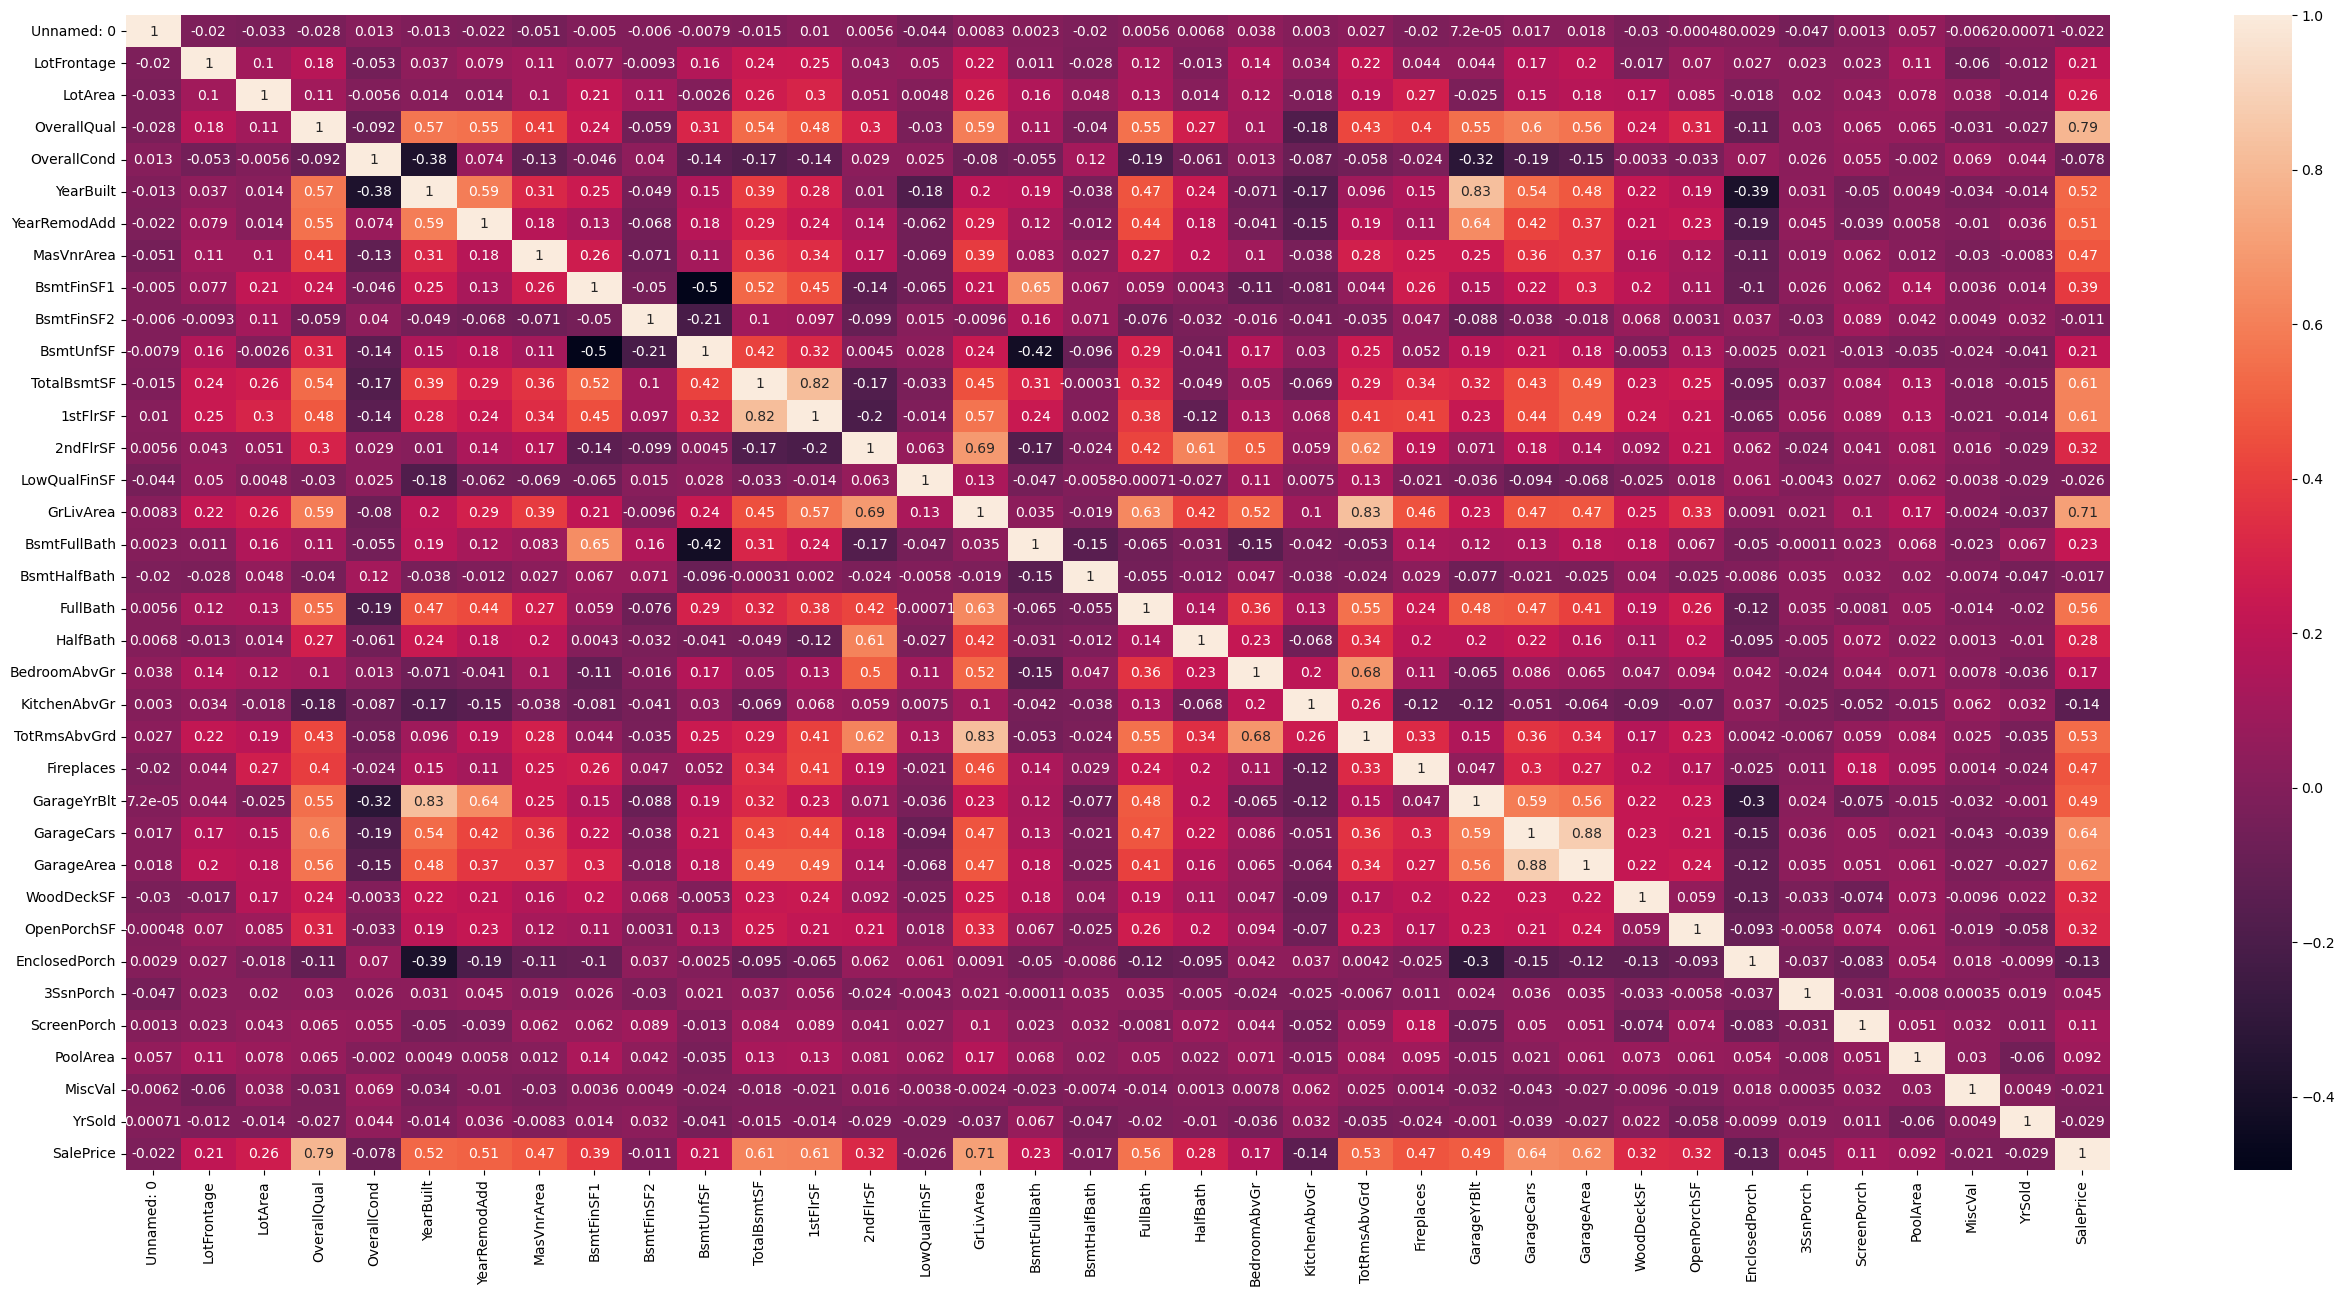

In [13]:
plt.figure(figsize=(32, 15))
sns.heatmap(c,annot=True)
plt.show()

In [14]:
#Analysis
#Sales price has High degree of correlation with variables -OverallQual, 1stFlrSF, GrLivArea ,GarageCars ,Garage Area
#And Moderate degree of correaltion with variables -Lot Area , Year Built,YearRennoadd ,MassVnArea,Bsmnt Fnish,2ndFlrSF,
                                                    #Full Bath,,HalfBath, TotalRms aboveGrnd, Fireplaces ,GarageYsBlt ,
                                                    #Wood deck ,OpenPorchSF

# Checking unique values 

In [15]:
df['MSSubClass'].unique()

array(['SC60', 'SC20', 'SC70', 'SC50', 'SC190', 'SC45', 'SC90', 'SC120',
       'SC30', 'SC85', 'SC80', 'SC160', 'SC75', 'SC180', 'SC40'],
      dtype=object)

# Renaming Unique values in MSSubClass Column

In [16]:
df['MSSubClass']=df["MSSubClass"].replace({'SC60':"2-STORY 1946 & NEWER",'SC20':"1-STORY 1946 & NEWER ALL STYLES",
                                           'SC70':"2-STORY 1945 & OLDER",'SC50':"1-1/2 STORY FINISHED ALL AGES",
                                           'SC190':"2 FAMILY CONVERSION - ALL STYLES AND AGES",
                                           'SC45':"1-1/2 STORY - UNFINISHED ALL AGES",
                                           'SC90':"DUPLEX - ALL STYLES AND AGES",
                                           'SC120':"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
                                           'SC30':"1-STORY 1945 & OLDER",'SC85':"SPLIT FOYER",
                                           'SC80':"SPLIT OR MULTI-LEVEL",
                                           'SC160':"2-STORY PUD - 1946 & NEWER",
                                           'SC75':"2-1/2 STORY ALL AGES",
                                           'SC180':"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
                                           'SC40':"1-STORY W/FINISHED ATTIC ALL AGES"})

In [17]:
df['MSSubClass'].unique()

array(['2-STORY 1946 & NEWER', '1-STORY 1946 & NEWER ALL STYLES',
       '2-STORY 1945 & OLDER', '1-1/2 STORY FINISHED ALL AGES',
       '2 FAMILY CONVERSION - ALL STYLES AND AGES',
       '1-1/2 STORY - UNFINISHED ALL AGES',
       'DUPLEX - ALL STYLES AND AGES',
       '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       '1-STORY 1945 & OLDER', 'SPLIT FOYER', 'SPLIT OR MULTI-LEVEL',
       '2-STORY PUD - 1946 & NEWER', '2-1/2 STORY ALL AGES',
       'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       '1-STORY W/FINISHED ATTIC ALL AGES'], dtype=object)

# Changing Column name from MSSubclass to Type of Dwelling

In [18]:
df.rename(columns={"MSSubClass":"Type of Dwelling"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling MSZoning  LotFrontage  LotArea  \
0           0             2-STORY 1946 & NEWER       RL           65     8450   
1           1  1-STORY 1946 & NEWER ALL STYLES       RL           80     9600   
2           2             2-STORY 1946 & NEWER       RL           68    11250   
3           3             2-STORY 1945 & OLDER       RL           60     9550   
4           4             2-STORY 1946 & NEWER       RL           84    14260   

  Street Alley LotShape LandContour Utilities  ... PoolArea PoolQC Fence  \
0   Pave  None      Reg         Lvl    AllPub  ...        0     No    No   
1   Pave  None      Reg         Lvl    AllPub  ...        0     No    No   
2   Pave  None      IR1         Lvl    AllPub  ...        0     No    No   
3   Pave  None      IR1         Lvl    AllPub  ...        0     No    No   
4   Pave  None      IR1         Lvl    AllPub  ...        0     No    No   

  MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          No       0    Feb   2008        WD         Normal     208500  
1          No       0    May   2007        WD         Normal     181500  
2          No       0    Sep   2008        WD         Normal     223500  
3          No       0    Feb   2006        WD        Abnorml     140000  
4          No       0    Dec   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [19]:
df["Type of Dwelling"].value_counts()

1-STORY 1946 & NEWER ALL STYLES                          536
2-STORY 1946 & NEWER                                     299
1-1/2 STORY FINISHED ALL AGES                            144
1-STORY PUD (Planned Unit Development) - 1946 & NEWER     87
1-STORY 1945 & OLDER                                      69
2-STORY PUD - 1946 & NEWER                                63
2-STORY 1945 & OLDER                                      60
SPLIT OR MULTI-LEVEL                                      58
DUPLEX - ALL STYLES AND AGES                              52
2 FAMILY CONVERSION - ALL STYLES AND AGES                 30
SPLIT FOYER                                               20
2-1/2 STORY ALL AGES                                      16
1-1/2 STORY - UNFINISHED ALL AGES                         12
PUD - MULTILEVEL - INCL SPLIT LEV/FOYER                   10
1-STORY W/FINISHED ATTIC ALL AGES                          4
Name: Type of Dwelling, dtype: int64

<Axes: ylabel='Type of Dwelling'>

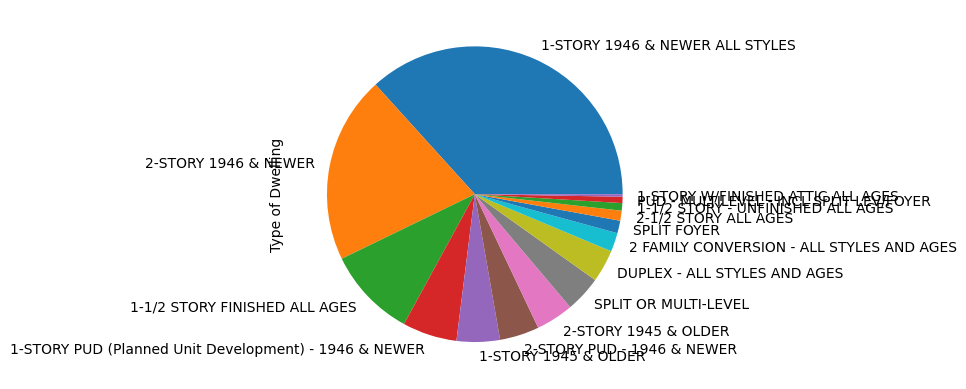

In [20]:
df["Type of Dwelling"].value_counts().plot(kind="pie")

<Axes: >

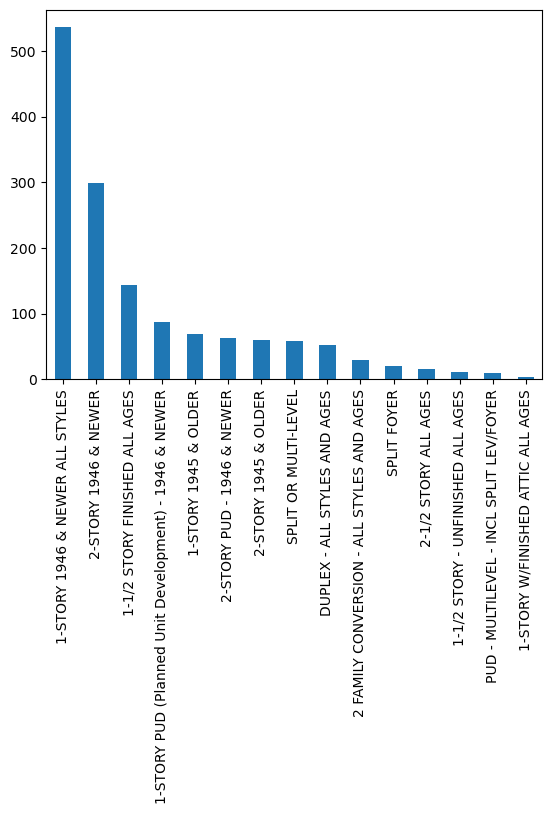

In [21]:
df["Type of Dwelling"].value_counts().plot(kind="bar")

# Checking Unnamed column

In [22]:
df["Unnamed: 0"].unique()

array([   0,    1,    2, ..., 1457, 1458, 1459], dtype=int64)

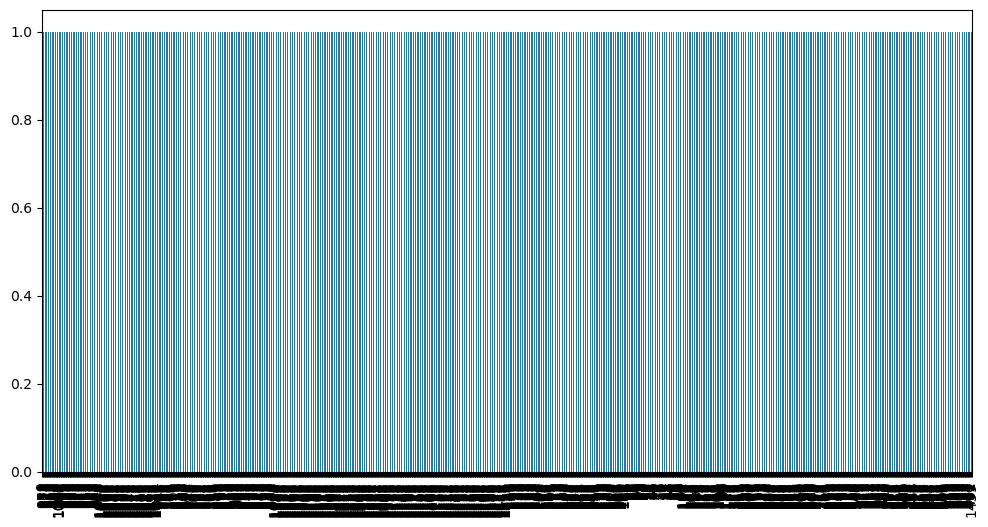

In [23]:
plt.figure(figsize=(12, 6))
df['Unnamed: 0'].value_counts().plot(kind='bar')
plt.show()

In [24]:
#Analysis
#This column can be dropped as there is no standard value available

# Checking MSZoning unique values

In [25]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

<Axes: >

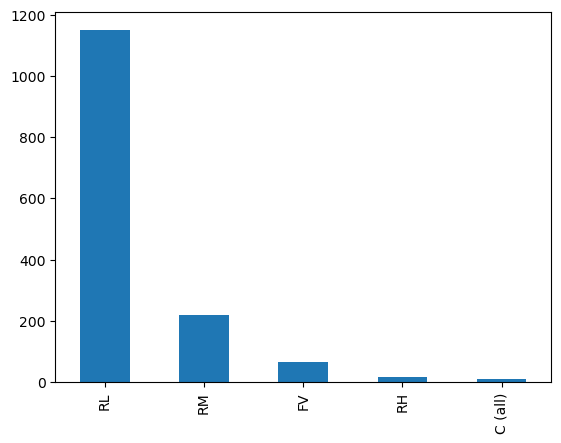

In [26]:
df["MSZoning"].value_counts().plot(kind="bar")

# Renaming MSZoning column name and entries

In [27]:
df['MSZoning']=df["MSZoning"].replace({'RL':"Residential Low-Density",
                                       'RM':"Residential Medium Density",
                                       "FV":"Floating Village Residential",
                                       "RH":"Residential High-Density"})

In [28]:
df.rename(columns={"MSZoning":"Zone classification"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   LotFrontage  LotArea Street Alley LotShape LandContour Utilities  ...  \
0           65     8450   Pave  None      Reg         Lvl    AllPub  ...   
1           80     9600   Pave  None      Reg         Lvl    AllPub  ...   
2           68    11250   Pave  None      IR1         Lvl    AllPub  ...   
3           60     9550   Pave  None      IR1         Lvl    AllPub  ...   
4           84    14260   Pave  None      IR1         Lvl    AllPub  ...   

  PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  \
0        0     No    No          No       0    Feb   2008        WD   
1        0     No    No          No       0    May   2007        WD   
2        0     No    No          No       0    Sep   2008        WD   
3        0     No    No          No       0    Feb   2006        WD   
4        0     No    No          No       0    Dec   2008        WD   

   SaleCondition  SalePrice  
0         Normal     208500  
1         Normal     181500  
2         Normal     223500  
3        Abnorml     140000  
4         Normal     250000  

[5 rows x 81 columns]

# Checking LotFrontage unique values

<Axes: >

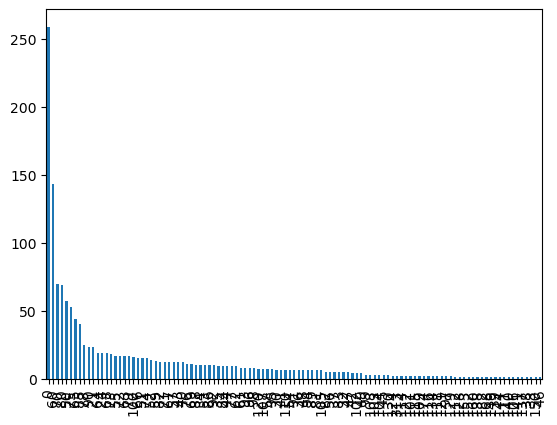

In [29]:
df["LotFrontage"].value_counts().plot(kind="bar")

# Renaming Lotfrontage Column name

In [30]:
df.rename(columns={"LotFrontage":"Linear feet of street"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  LotArea Street Alley LotShape LandContour Utilities  \
0                     65     8450   Pave  None      Reg         Lvl    AllPub   
1                     80     9600   Pave  None      Reg         Lvl    AllPub   
2                     68    11250   Pave  None      IR1         Lvl    AllPub   
3                     60     9550   Pave  None      IR1         Lvl    AllPub   
4                     84    14260   Pave  None      IR1         Lvl    AllPub   

   ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  \
0  ...        0     No    No          No       0    Feb   2008        WD   
1  ...        0     No    No          No       0    May   2007        WD   
2  ...        0     No    No          No       0    Sep   2008        WD   
3  ...        0     No    No          No       0    Feb   2006        WD   
4  ...        0     No    No          No       0    Dec   2008        WD   

   SaleCondition  SalePrice  
0         Normal     208500  
1         Normal     181500  
2         Normal     223500  
3        Abnorml     140000  
4         Normal     250000  

[5 rows x 81 columns]

# Renaming LotArea Column name

In [31]:
df.rename(columns={"LotArea":"Plot Size(sq.ft)"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Street Alley LotShape LandContour  \
0                     65              8450   Pave  None      Reg         Lvl   
1                     80              9600   Pave  None      Reg         Lvl   
2                     68             11250   Pave  None      IR1         Lvl   
3                     60              9550   Pave  None      IR1         Lvl   
4                     84             14260   Pave  None      IR1         Lvl   

  Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0    AllPub  ...        0     No    No          No       0    Feb   2008   
1    AllPub  ...        0     No    No          No       0    May   2007   
2    AllPub  ...        0     No    No          No       0    Sep   2008   
3    AllPub  ...        0     No    No          No       0    Feb   2006   
4    AllPub  ...        0     No    No          No       0    Dec   2008   

   SaleType  SaleCondition  SalePrice  
0        WD         Normal     208500  
1        WD         Normal     181500  
2        WD         Normal     223500  
3        WD        Abnorml     140000  
4        WD         Normal     250000  

[5 rows x 81 columns]

# Checking Street unique values

<Axes: >

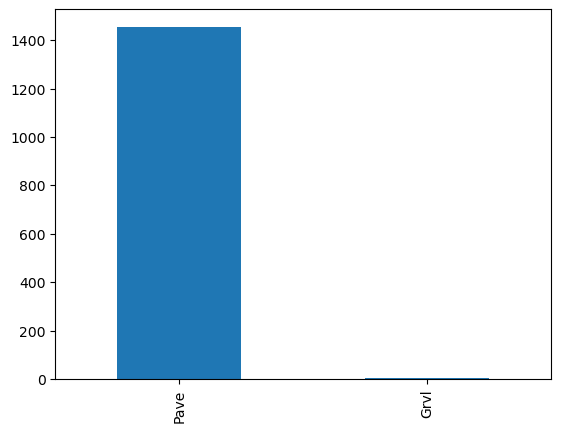

In [32]:
df["Street"].value_counts().plot(kind="bar")

# Renaming Street column name and its entries

In [33]:
df["Street"]=df["Street"].replace({"Pave":"Paved Road","Grvl":"Gravel Road"})

In [34]:
df["Street"].unique()

array(['Paved Road', 'Gravel Road'], dtype=object)

In [35]:
df.rename(columns={"Street":"Type of Road"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road Alley LotShape  \
0                     65              8450   Paved Road  None      Reg   
1                     80              9600   Paved Road  None      Reg   
2                     68             11250   Paved Road  None      IR1   
3                     60              9550   Paved Road  None      IR1   
4                     84             14260   Paved Road  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Checking unique values of Alley

<Axes: >

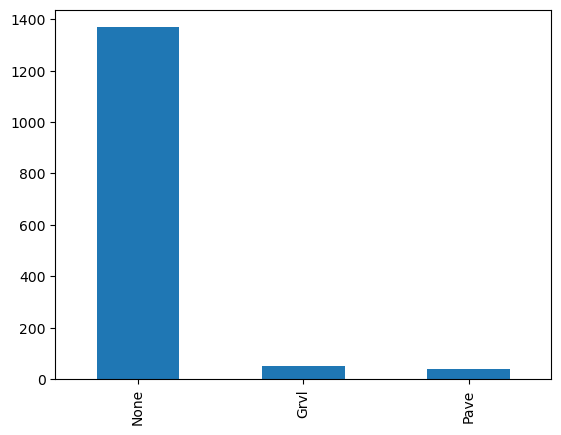

In [36]:
df["Alley"].value_counts().plot(kind="bar")

# Renaming Alley column entries 

In [37]:
df['Alley']=df["Alley"].replace({"Grvl":"Gravel type","Pave":"Paved type","None":"No alley access"})

In [38]:
df['Alley'].unique()

array(['No alley access', 'Gravel type', 'Paved type'], dtype=object)

# Renaming LotShape column entries

<Axes: >

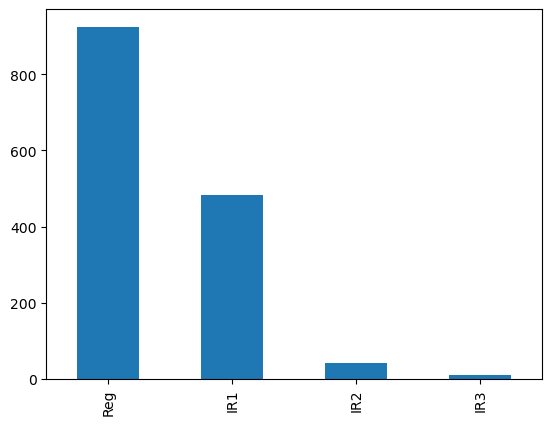

In [39]:
df['LotShape'].value_counts().plot(kind="bar")

In [40]:
df.rename(columns={"LotShape":"General Shape of propoerty"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road            Alley  \
0                     65              8450   Paved Road  No alley access   
1                     80              9600   Paved Road  No alley access   
2                     68             11250   Paved Road  No alley access   
3                     60              9550   Paved Road  No alley access   
4                     84             14260   Paved Road  No alley access   

  General Shape of propoerty LandContour Utilities  ... PoolArea PoolQC Fence  \
0                        Reg         Lvl    AllPub  ...        0     No    No   
1                        Reg         Lvl    AllPub  ...        0     No    No   
2                        IR1         Lvl    AllPub  ...        0     No    No   
3                        IR1         Lvl    AllPub  ...        0     No    No   
4                        IR1         Lvl    AllPub  ...        0     No    No   

  MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          No       0    Feb   2008        WD         Normal     208500  
1          No       0    May   2007        WD         Normal     181500  
2          No       0    Sep   2008        WD         Normal     223500  
3          No       0    Feb   2006        WD        Abnorml     140000  
4          No       0    Dec   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [41]:
df["General Shape of propoerty"]=df["General Shape of propoerty"].replace({"Reg":"Regular","IR1":"Slightly irregular",
                                                                          "IR2":"Moderately irregular","IR3":"Irregular"})

In [42]:
df["General Shape of propoerty"].unique()

array(['Regular', 'Slightly irregular', 'Moderately irregular',
       'Irregular'], dtype=object)

# Renaming LandContour column entries

<Axes: >

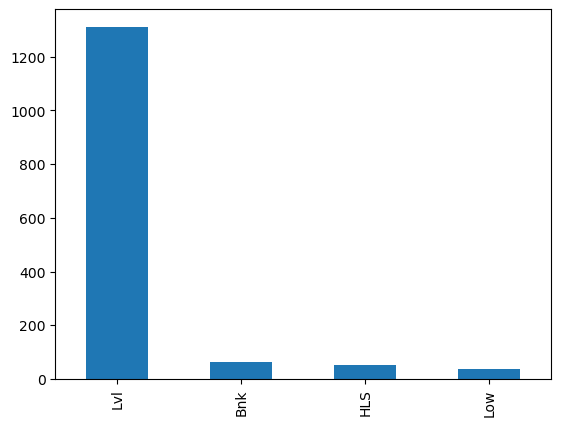

In [43]:
df["LandContour"].value_counts().plot(kind="bar")

In [44]:
df.rename(columns={"LandContour":"Flatness of the propoerty"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road            Alley  \
0                     65              8450   Paved Road  No alley access   
1                     80              9600   Paved Road  No alley access   
2                     68             11250   Paved Road  No alley access   
3                     60              9550   Paved Road  No alley access   
4                     84             14260   Paved Road  No alley access   

  General Shape of propoerty Flatness of the propoerty Utilities  ...  \
0                    Regular                       Lvl    AllPub  ...   
1                    Regular                       Lvl    AllPub  ...   
2         Slightly irregular                       Lvl    AllPub  ...   
3         Slightly irregular                       Lvl    AllPub  ...   
4         Slightly irregular                       Lvl    AllPub  ...   

  PoolArea PoolQC Fence MiscFeature MiscVal MoSold YrSold  SaleType  \
0        0     No    No          No       0    Feb   2008        WD   
1        0     No    No          No       0    May   2007        WD   
2        0     No    No          No       0    Sep   2008        WD   
3        0     No    No          No       0    Feb   2006        WD   
4        0     No    No          No       0    Dec   2008        WD   

   SaleCondition  SalePrice  
0         Normal     208500  
1         Normal     181500  
2         Normal     223500  
3        Abnorml     140000  
4         Normal     250000  

[5 rows x 81 columns]

In [45]:
df["Flatness of the propoerty"]=df["Flatness of the propoerty"].replace({"Lvl":"Near Flat / Level",
                                                                        "Bnk":"Banked","HLS":"Hillside",
                                                                        "Low":"Depression"})

In [46]:
df["Flatness of the propoerty"].unique()

array(['Near Flat / Level', 'Banked', 'Depression', 'Hillside'],
      dtype=object)

# Renaming Utilities column entries

<Axes: >

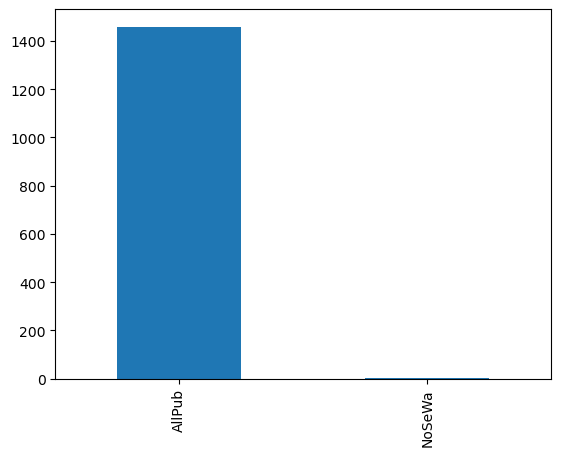

In [47]:
df["Utilities"].value_counts().plot(kind='bar')

In [48]:
df["Utilities"]=df["Utilities"].replace({"AllPub":"All public utilities E,G,W,S",
                                        "NoSeWa":"Electricity and Gas only"})

In [49]:
df["Utilities"].unique()

array(['All public utilities E,G,W,S', 'Electricity and Gas only'],
      dtype=object)

# Renaming LotConfig column entries

<Axes: >

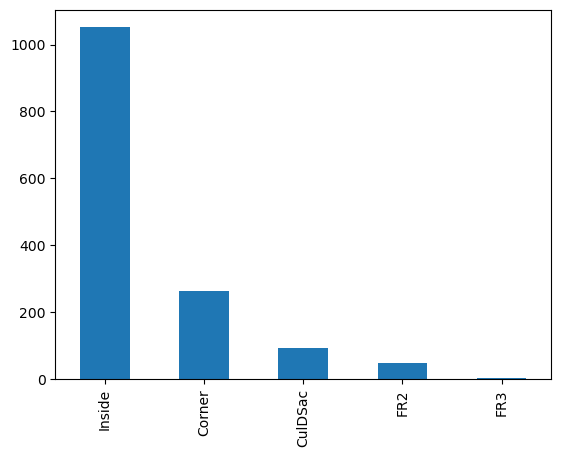

In [50]:
df["LotConfig"].value_counts().plot(kind="bar")

In [51]:
df["LotConfig"]=df["LotConfig"].replace({"Inside":"Inside lot",
                                        "Corner":"Corner Lot",
                                        "CulDSac":"Cul-de-sac",
                                        "FR2":"Frontage on 2 sides of the property",
                                        "FR3":"Frontage on 3 sides of the property"})

In [52]:
df["LotConfig"].unique()

array(['Inside lot', 'Frontage on 2 sides of the property', 'Corner Lot',
       'Cul-de-sac', 'Frontage on 3 sides of the property'], dtype=object)

In [53]:
df.rename(columns={"LotConfig":"Lot Configuration"},inplace=True)
df.head()

Unnamed: 0                 Type of Dwelling      Zone classification  \
0           0             2-STORY 1946 & NEWER  Residential Low-Density   
1           1  1-STORY 1946 & NEWER ALL STYLES  Residential Low-Density   
2           2             2-STORY 1946 & NEWER  Residential Low-Density   
3           3             2-STORY 1945 & OLDER  Residential Low-Density   
4           4             2-STORY 1946 & NEWER  Residential Low-Density   

   Linear feet of street  Plot Size(sq.ft) Type of Road            Alley  \
0                     65              8450   Paved Road  No alley access   
1                     80              9600   Paved Road  No alley access   
2                     68             11250   Paved Road  No alley access   
3                     60              9550   Paved Road  No alley access   
4                     84             14260   Paved Road  No alley access   

  General Shape of propoerty Flatness of the propoerty  \
0                    Regular         Near Flat / Level   
1                    Regular         Near Flat / Level   
2         Slightly irregular         Near Flat / Level   
3         Slightly irregular         Near Flat / Level   
4         Slightly irregular         Near Flat / Level   

                      Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0  All public utilities E,G,W,S  ...        0     No    No          No   
1  All public utilities E,G,W,S  ...        0     No    No          No   
2  All public utilities E,G,W,S  ...        0     No    No          No   
3  All public utilities E,G,W,S  ...        0     No    No          No   
4  All public utilities E,G,W,S  ...        0     No    No          No   

  MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0       0    Feb   2008        WD         Normal     208500  
1       0    May   2007        WD         Normal     181500  
2       0    Sep   2008        WD         Normal     223500  
3       0    Feb   2006        WD        Abnorml     140000  
4       0    Dec   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [54]:
df["Lot Configuration"].head()

0                             Inside lot
1    Frontage on 2 sides of the property
2                             Inside lot
3                             Corner Lot
4    Frontage on 2 sides of the property
Name: Lot Configuration, dtype: object

# Renaming LandSlope Column entries

<Axes: >

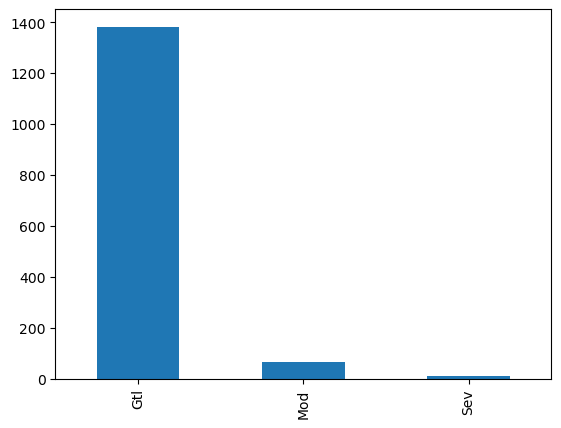

In [55]:
df["LandSlope"].value_counts().plot(kind="bar")

In [56]:
df["LandSlope"]=df["LandSlope"].replace({"Gtl":"Gentle slope",
                                        "Mod":"Moderate slope",
                                        "Sev":"Severe Slope"})

In [57]:
df["LandSlope"].unique()

array(['Gentle slope', 'Moderate slope', 'Severe Slope'], dtype=object)

In [58]:
df.rename(columns={"LandSlope":"Slope of property"},inplace=True)

# Checking Correlation of Categorical data

### Handling categorical data by importing label encoders

In [59]:
categorical1_columns=df[['Alley','Type of Dwelling','BldgType','BsmtCond','BsmtExposure','BsmtFullBath','BsmtHalfBath','BsmtQual','CentralAir','Electrical','ExterCond','ExterQual','Fence','Fireplaces','FullBath','GarageCars','GarageFinish','HalfBath','HeatingQC','KitchenAbvGr','KitchenQual','Flatness of the propoerty','Slope of property','Lot Configuration','General Shape of propoerty','Zone classification','MasVnrType','MiscFeature','PavedDrive','PoolQC','Type of Road','Utilities','SalePrice']]


In [60]:
categorical1_columns

Alley                 Type of Dwelling BldgType BsmtCond  \
0     No alley access             2-STORY 1946 & NEWER     1Fam       TA   
1     No alley access  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA   
2     No alley access             2-STORY 1946 & NEWER     1Fam       TA   
3     No alley access             2-STORY 1945 & OLDER     1Fam       Gd   
4     No alley access             2-STORY 1946 & NEWER     1Fam       TA   
...               ...                              ...      ...      ...   
1455  No alley access             2-STORY 1946 & NEWER     1Fam       TA   
1456  No alley access  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA   
1457  No alley access             2-STORY 1945 & OLDER     1Fam       Gd   
1458  No alley access  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA   
1459  No alley access  1-STORY 1946 & NEWER ALL STYLES     1Fam       TA   

     BsmtExposure  BsmtFullBath  BsmtHalfBath BsmtQual CentralAir Electrical  \
0              No             1             0       Gd          Y      SBrkr   
1              Gd             0             1       Gd          Y      SBrkr   
2              Mn             1             0       Gd          Y      SBrkr   
3              No             1             0       TA          Y      SBrkr   
4              Av             1             0       Gd          Y      SBrkr   
...           ...           ...           ...      ...        ...        ...   
1455           No             0             0       Gd          Y      SBrkr   
1456           No             1             0       Gd          Y      SBrkr   
1457           No             0             0       TA          Y      SBrkr   
1458           Mn             1             0       TA          Y      FuseA   
1459           No             1             0       TA          Y      SBrkr   

      ...                    Lot Configuration General Shape of propoerty  \
0     ...                           Inside lot                    Regular   
1     ...  Frontage on 2 sides of the property                    Regular   
2     ...                           Inside lot         Slightly irregular   
3     ...                           Corner Lot         Slightly irregular   
4     ...  Frontage on 2 sides of the property         Slightly irregular   
...   ...                                  ...                        ...   
1455  ...                           Inside lot                    Regular   
1456  ...                           Inside lot                    Regular   
1457  ...                           Inside lot                    Regular   
1458  ...                           Inside lot                    Regular   
1459  ...                           Inside lot                    Regular   

          Zone classification  MasVnrType  MiscFeature  PavedDrive PoolQC  \
0     Residential Low-Density     BrkFace           No           Y     No   
1     Residential Low-Density        None           No           Y     No   
2     Residential Low-Density     BrkFace           No           Y     No   
3     Residential Low-Density        None           No           Y     No   
4     Residential Low-Density     BrkFace           No           Y     No   
...                       ...         ...          ...         ...    ...   
1455  Residential Low-Density        None           No           Y     No   
1456  Residential Low-Density       Stone           No           Y     No   
1457  Residential Low-Density        None         Shed           Y     No   
1458  Residential Low-Density        None           No           Y     No   
1459  Residential Low-Density        None           No           Y     No   

      Type of Road                     Utilities  SalePrice  
0       Paved Road  All public utilities E,G,W,S     208500  
1       Paved Road  All public utilities E,G,W,S     181500  
2       Paved Road  All public utilities E,G,W,S     223500  
3       Paved Road  All public utilities E,G

In [61]:
categorical1_columns.columns

Index(['Alley', 'Type of Dwelling', 'BldgType', 'BsmtCond', 'BsmtExposure',
       'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'CentralAir', 'Electrical',
       'ExterCond', 'ExterQual', 'Fence', 'Fireplaces', 'FullBath',
       'GarageCars', 'GarageFinish', 'HalfBath', 'HeatingQC', 'KitchenAbvGr',
       'KitchenQual', 'Flatness of the propoerty', 'Slope of property',
       'Lot Configuration', 'General Shape of propoerty',
       'Zone classification', 'MasVnrType', 'MiscFeature', 'PavedDrive',
       'PoolQC', 'Type of Road', 'Utilities', 'SalePrice'],
      dtype='object')

In [62]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in categorical1_columns.columns:
  categorical1_columns[column]=le.fit_transform(categorical1_columns[column])

### Correlation with Categorical data

In [63]:
c2=categorical1_columns.corr()
c2

Alley  Type of Dwelling  BldgType  BsmtCond  \
Alley                       1.000000          0.084584  0.161375  0.043999   
Type of Dwelling            0.084584          1.000000  0.192911  0.015807   
BldgType                    0.161375          0.192911  1.000000  0.014101   
BsmtCond                    0.043999          0.015807  0.014101  1.000000   
BsmtExposure               -0.025179         -0.197494 -0.046553 -0.058202   
BsmtFullBath                0.025543          0.041518  0.051536  0.074873   
BsmtHalfBath               -0.028541          0.036995 -0.003413 -0.048526   
BsmtQual                   -0.086908         -0.154298 -0.151092 -0.019858   
CentralAir                  0.104749          0.049878  0.018197  0.197910   
Electrical                  0.076070          0.161710  0.073592  0.141341   
ExterCond                   0.062280          0.079315  0.085067  0.199067   
ExterQual                  -0.111324         -0.051819 -0.087862 -0.007887   
Fence                       0.044473          0.011459  0.132866 -0.032217   
Fireplaces                  0.002202          0.073873 -0.089942  0.046429   
FullBath                    0.095105          0.281756  0.070757  0.002418   
GarageCars                  0.065771          0.179536  0.007402  0.069512   
GarageFinish               -0.064758         -0.134736 -0.064432 -0.051849   
HalfBath                    0.073401          0.398654 -0.007588  0.089958   
HeatingQC                  -0.064949         -0.014645 -0.010396 -0.063981   
KitchenAbvGr               -0.032155          0.198346  0.182926 -0.088426   
KitchenQual                -0.042799         -0.032261 -0.024531 -0.008506   
Flatness of the propoerty   0.020221          0.074125  0.063303  0.032352   
Slope of property           0.015513         -0.035756 -0.053582  0.008127   
Lot Configuration          -0.008167         -0.022814  0.107229  0.030091   
General Shape of propoerty  0.027955          0.053301 -0.076450  0.040194   
Zone classification        -0.368086         -0.097153  0.005690 -0.011450   
MasVnrType                 -0.014029         -0.139069 -0.028751 -0.048398   
MiscFeature                -0.054428         -0.038179 -0.062730  0.002326   
PavedDrive                  0.097880          0.116912  0.059390  0.157161   
PoolQC                     -0.001564         -0.047944  0.026062 -0.020600   
Type of Road               -0.001587         -0.007604 -0.018243 -0.020903   
Utilities                   0.000647         -0.017946 -0.010778  0.008519   
SalePrice                   0.120174          0.177338 -0.076439  0.104845   

                            BsmtExposure  BsmtFullBath  BsmtHalfBath  \
Alley                          -0.025179      0.025543     -0.028541   
Type of Dwelling               -0.197494      0.041518      0.036995   
BldgType                       -0.046553      0.051536     -0.003413   
BsmtCond                       -0.058202      0.074873     -0.048526   
BsmtExposure                    1.000000     -0.273245     -0.055164   
BsmtFullBath                   -0.273245      1.000000     -0.147871   
BsmtHalfBath                   -0.055164     -0.147871      1.000000   
BsmtQual                        0.287341     -0.146701      0.051928   
CentralAir                     -0.097594      0.114603      0.040325   
Electrical                     -0.129580      0.122981      0.020847   
ExterCond                      -0.062875      0.011657     -0.061271   
ExterQual                       0.222958     -0.101196      0.056518   
Fence                          -0.069765     -0.038394     -0.014322   
Fireplaces                     -0.110571      0.137928      0.028976   
FullBath                       -0.087973     -0.064512     -0.054536   
GarageCars                     -0.229882      0.131881     -0.020891   
GarageFinish                    0.197116     -0.133496      0.036994   
HalfBath                        0.062380     -0.030905     -0.012340   
HeatingQC 

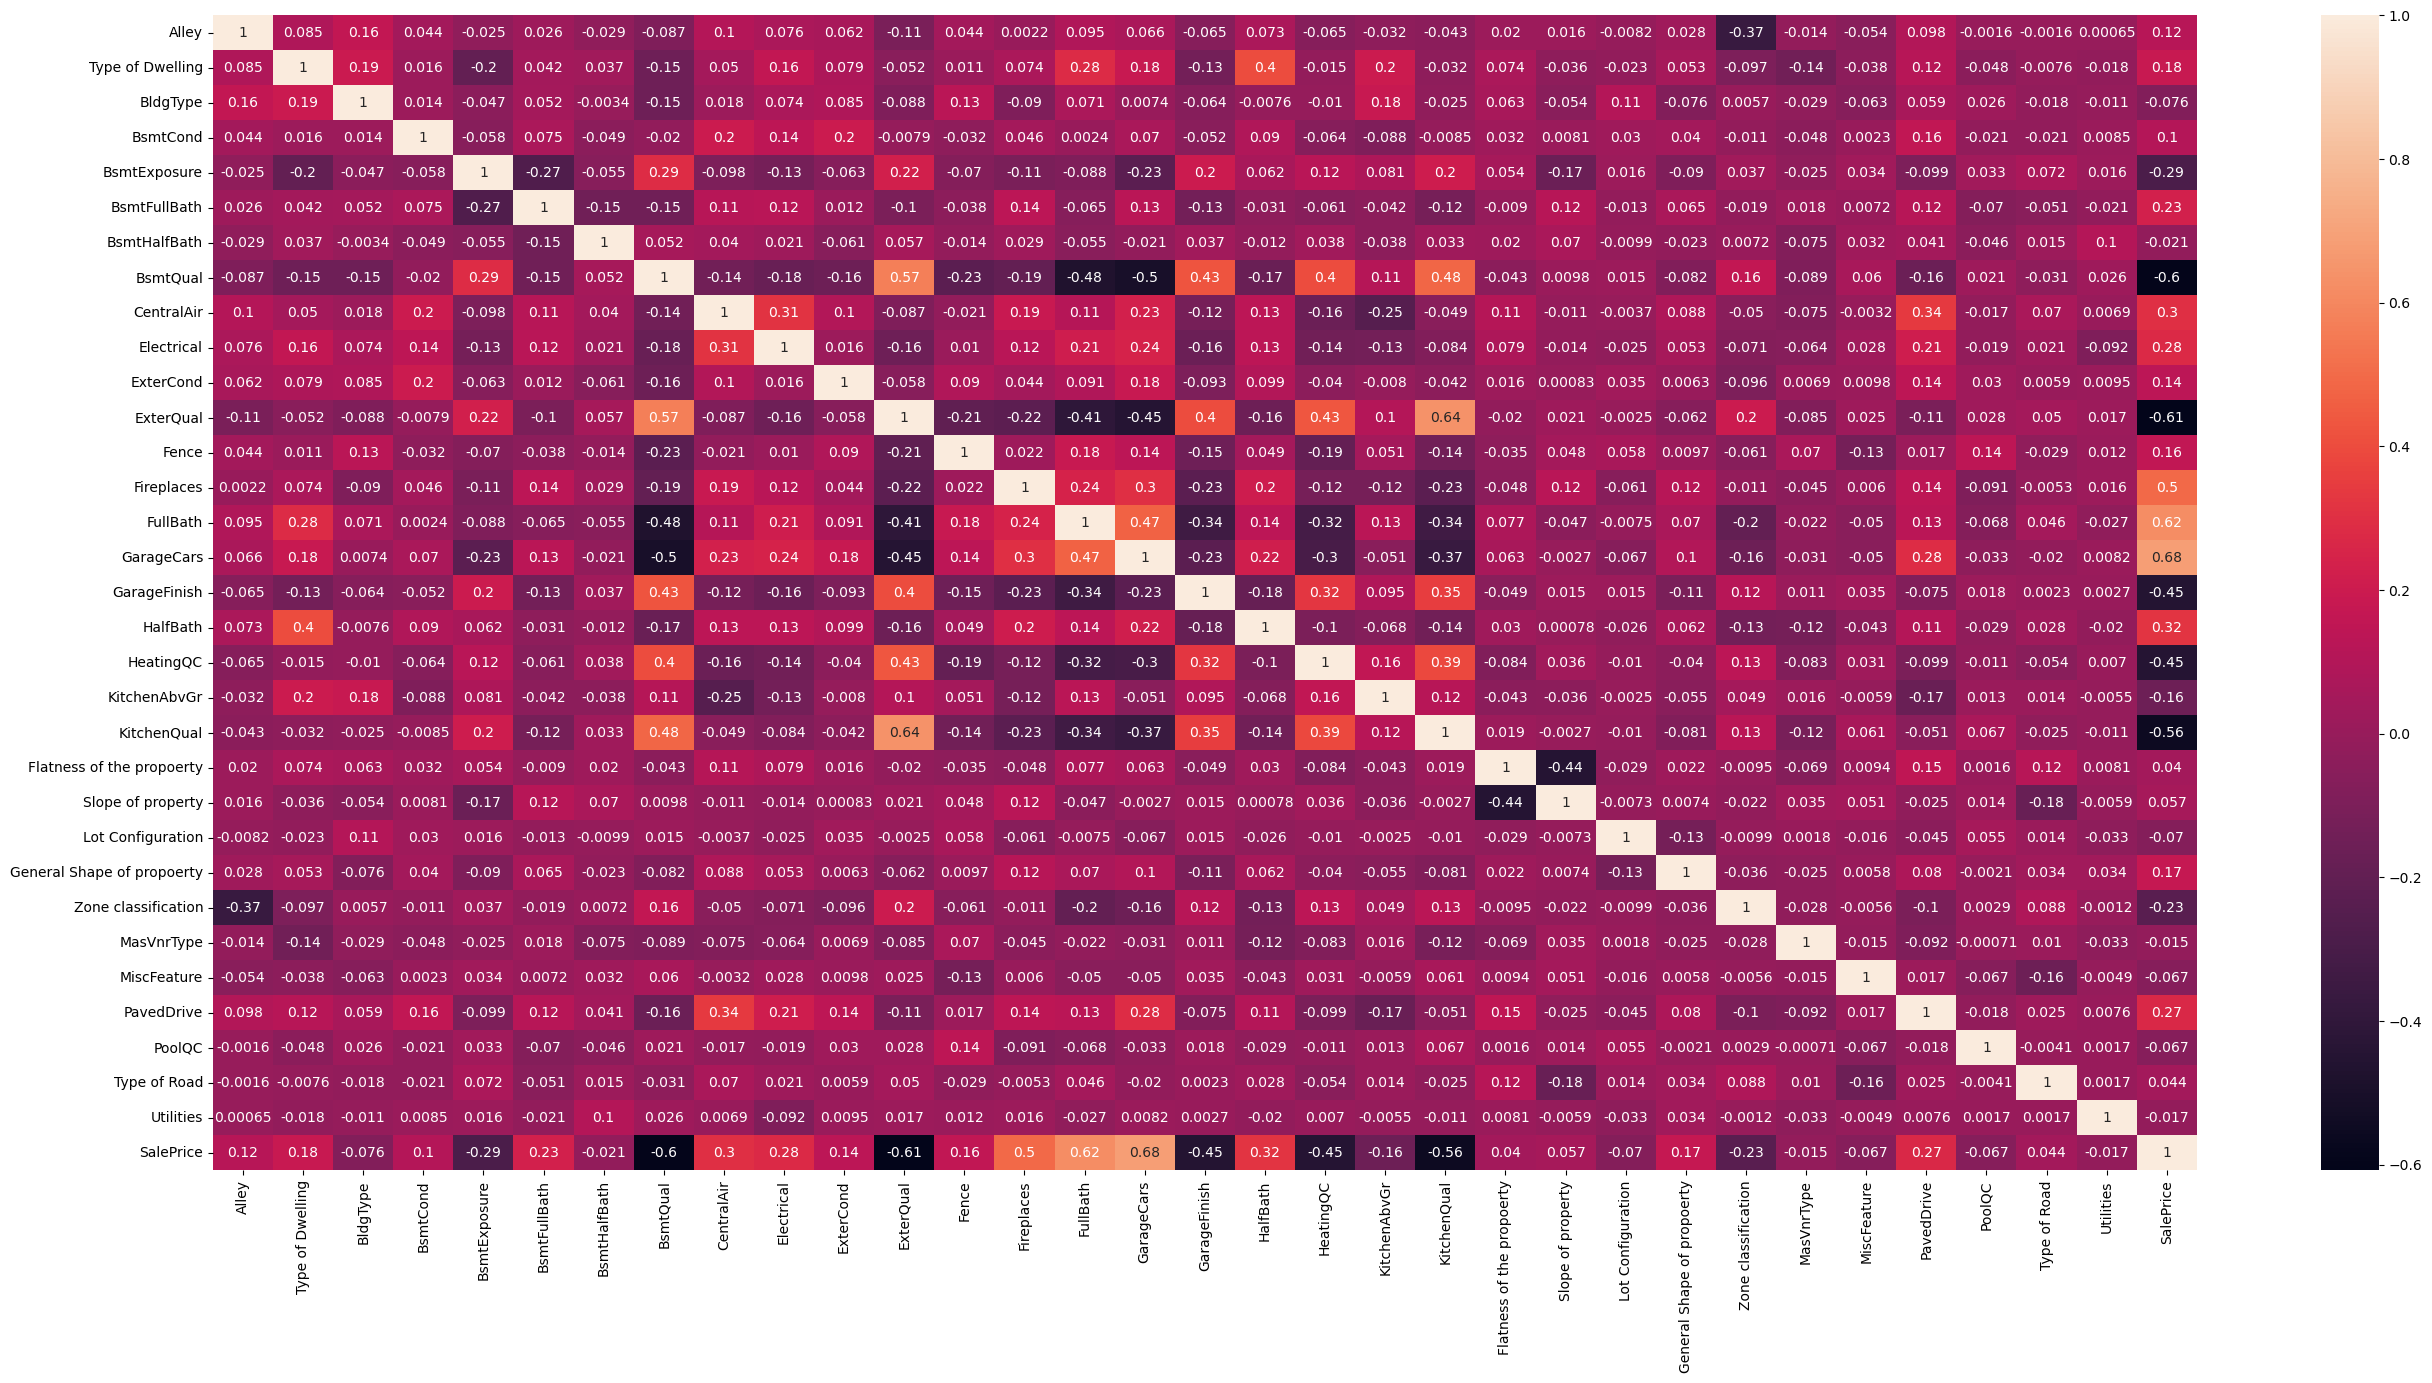

In [64]:
plt.figure(figsize=(32, 15))
sns.heatmap(c2,annot=True)
plt.show()

In [65]:
#Analysis-
# Sales price has Moderate degree of correaltion with 3 variables-  Garage Cars, FullBath , Fireplaces
#And low degree of correaltion with 3 variables- Central Air, Electrical ,HalfBath , PavedDrive

## Univariance analysis Histplot for all Categorical columns

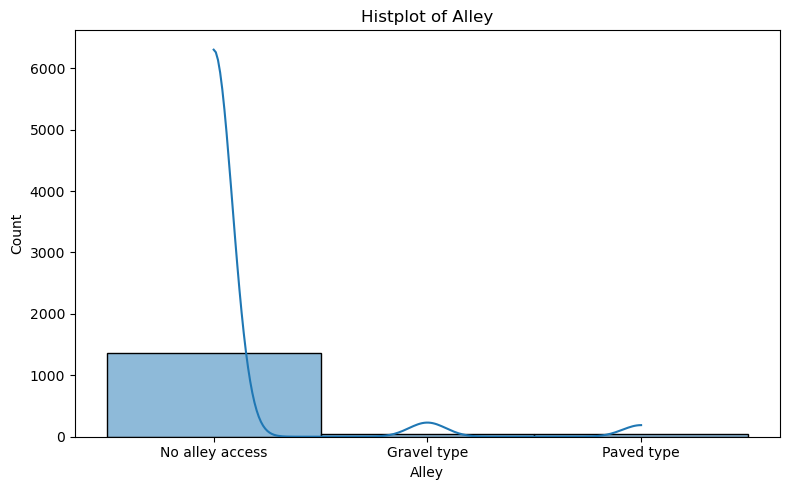

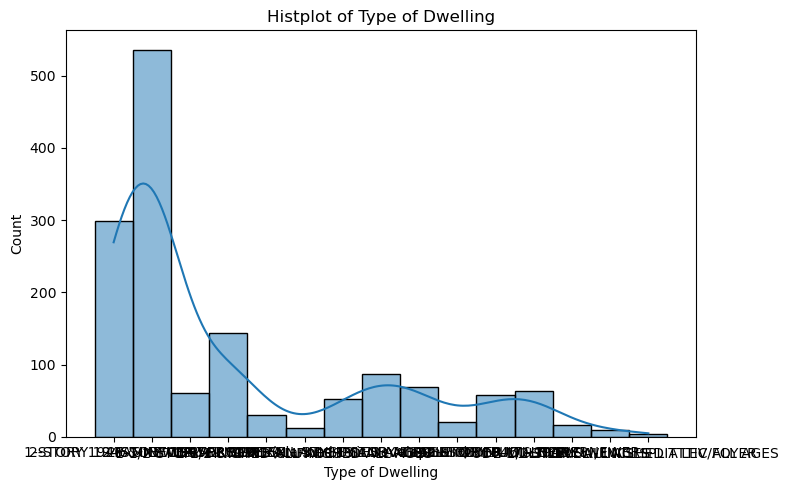

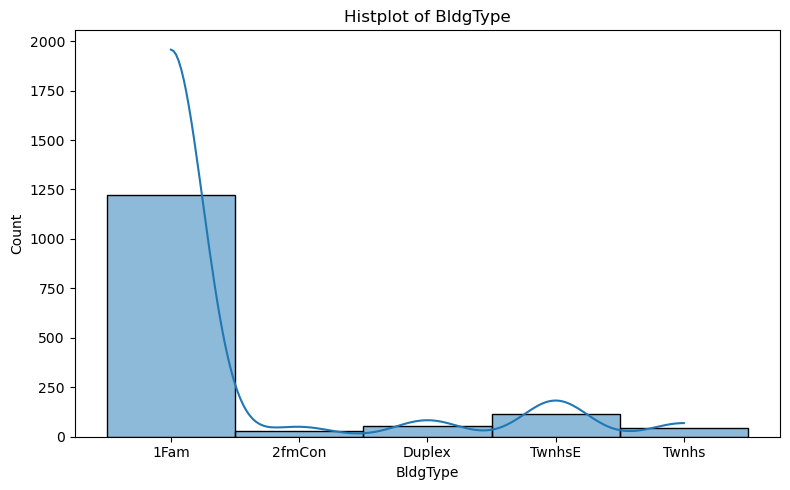

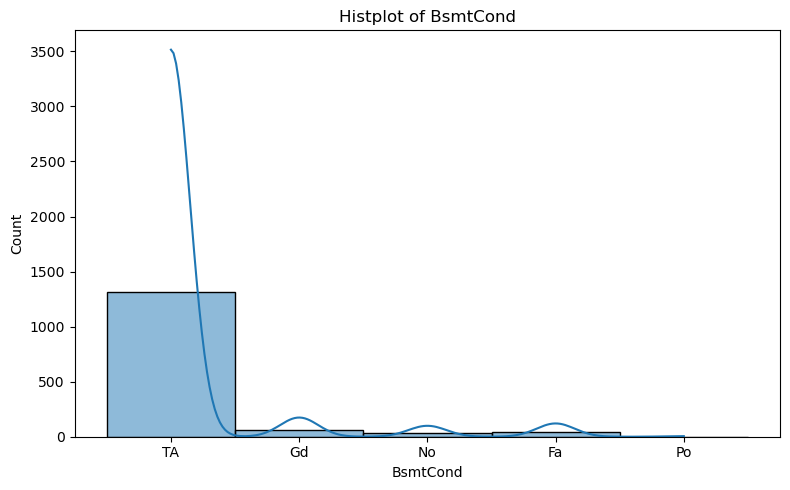

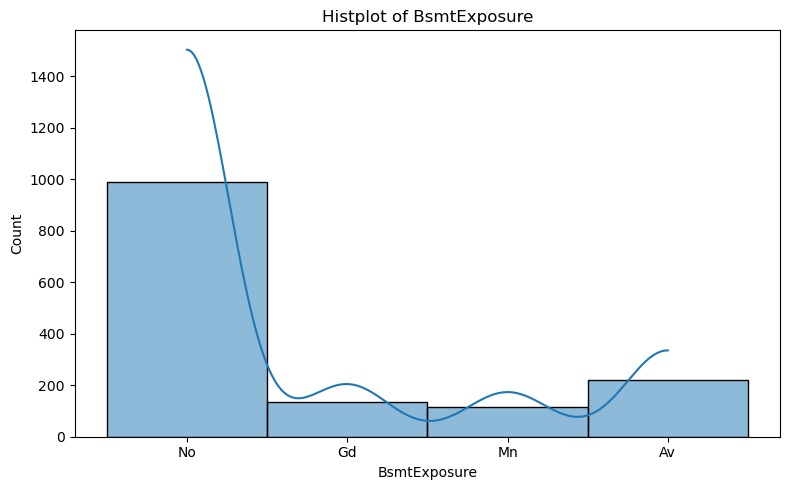

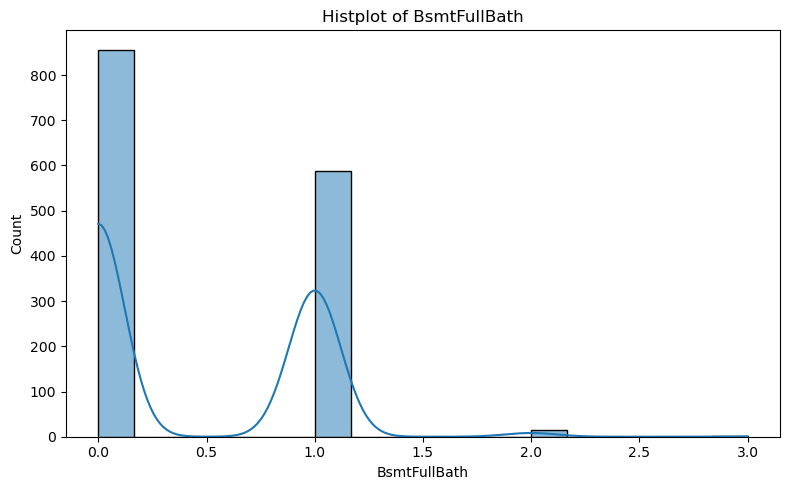

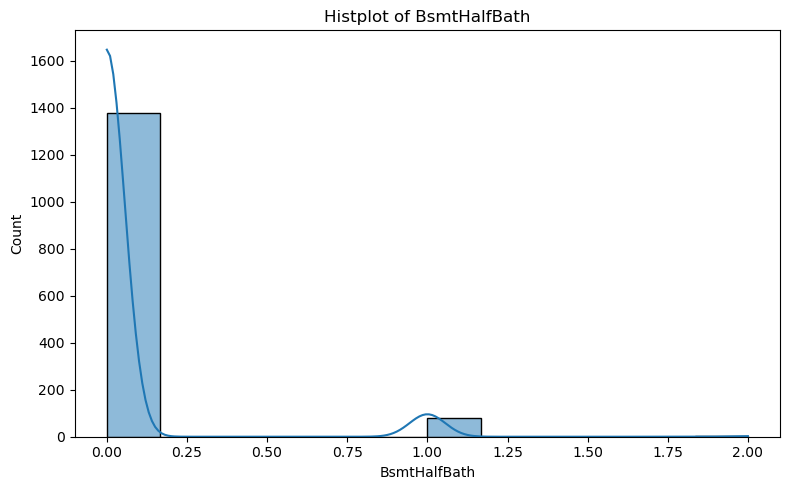

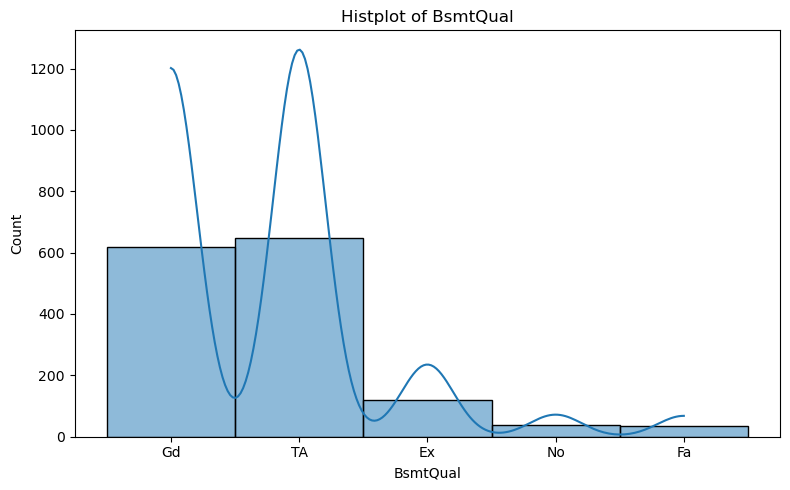

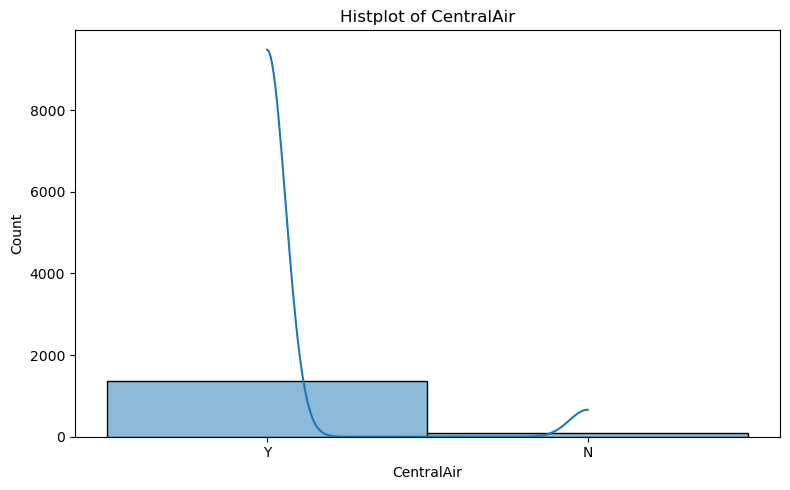

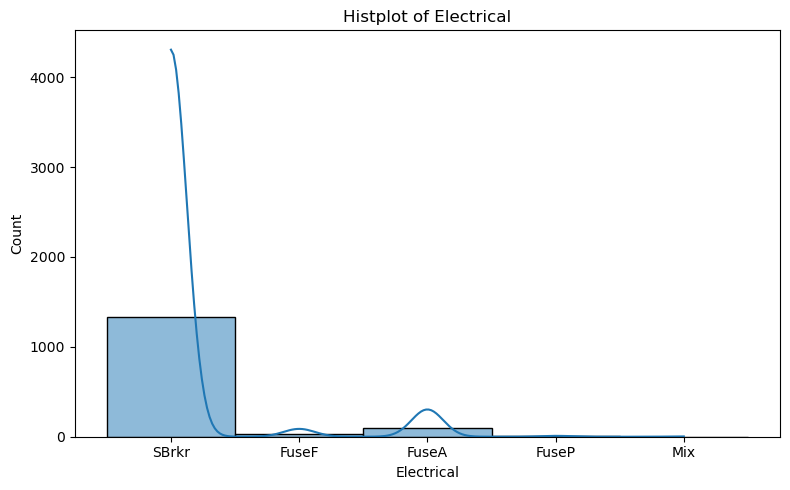

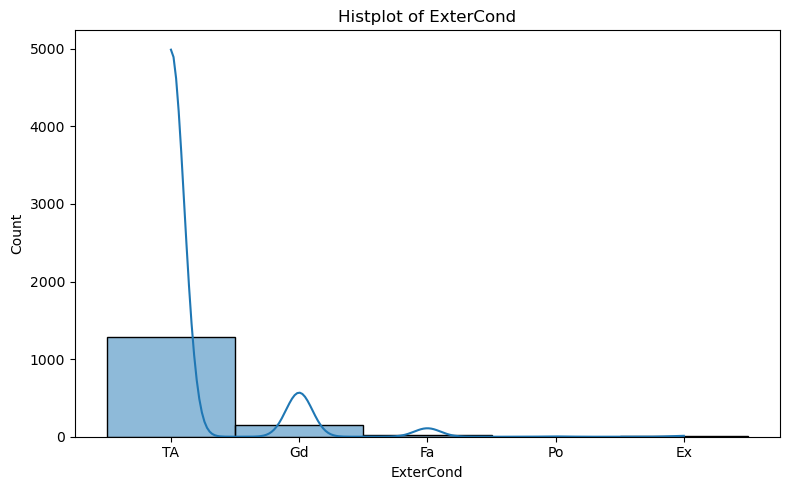

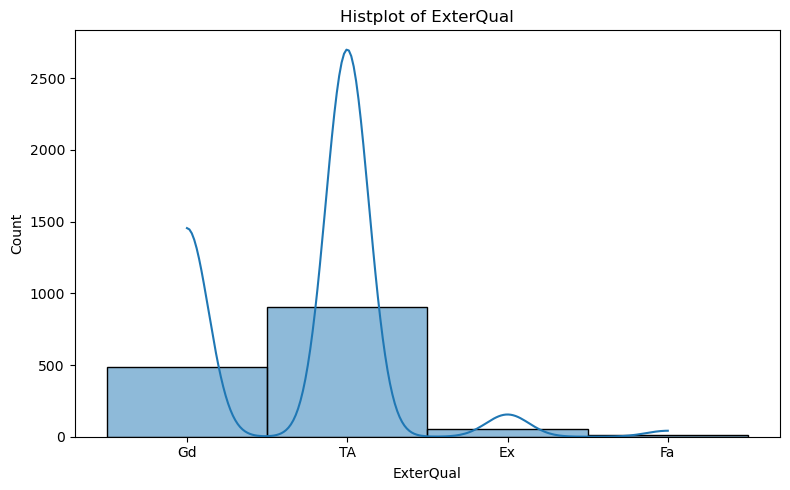

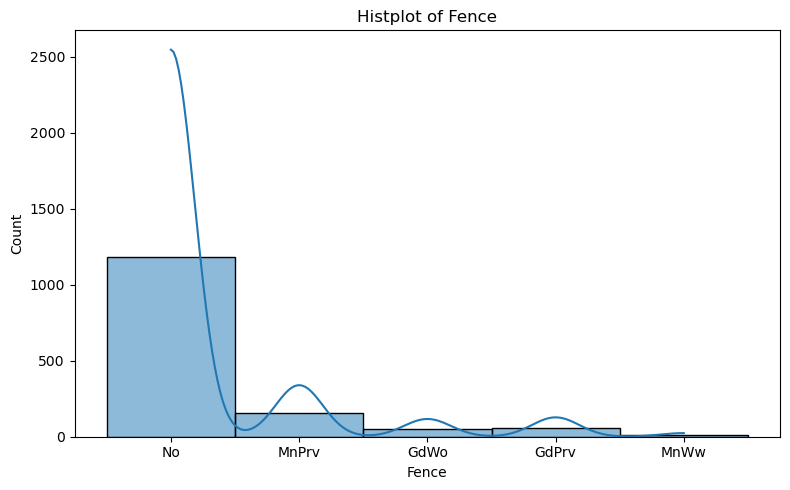

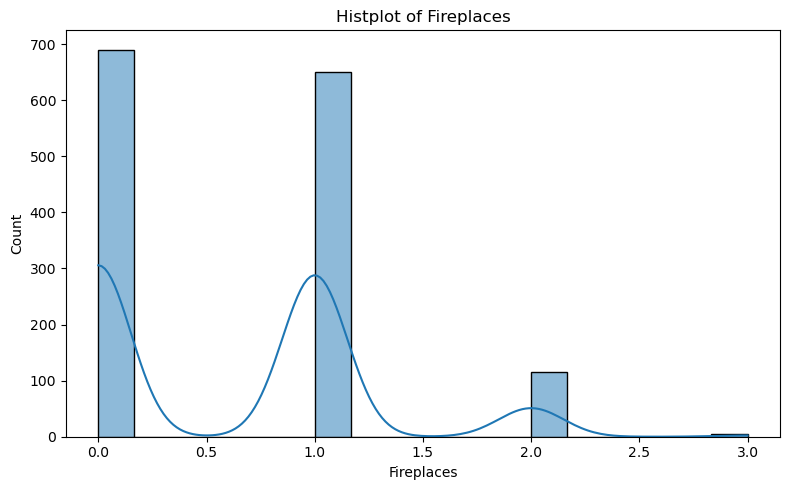

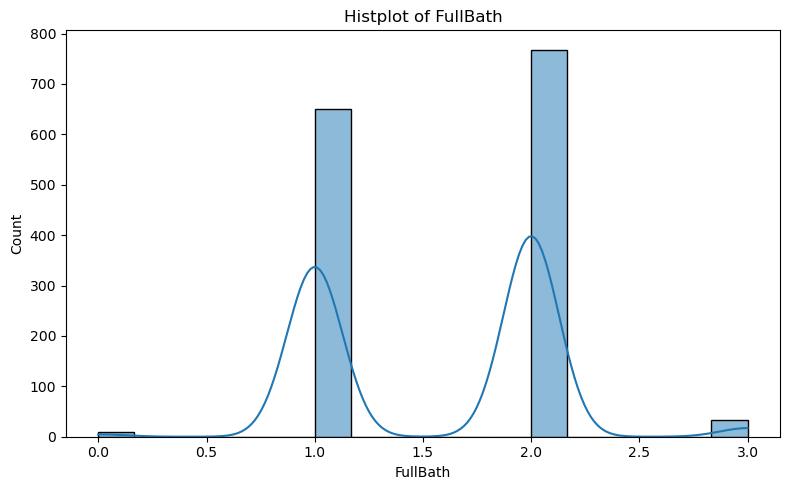

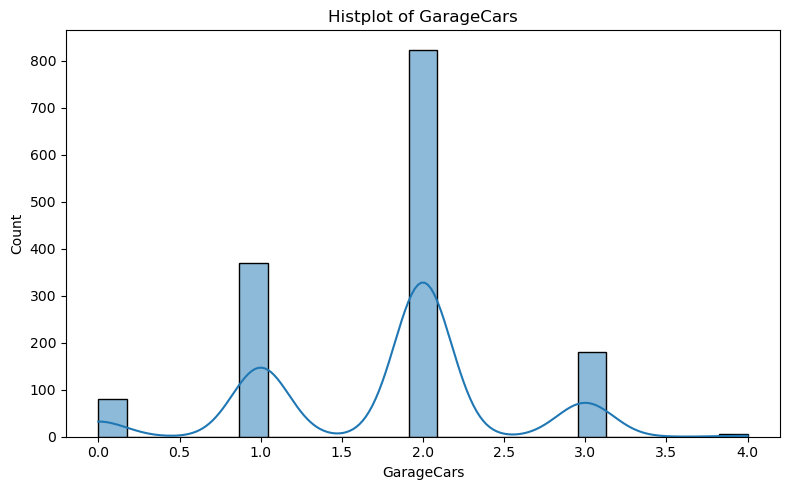

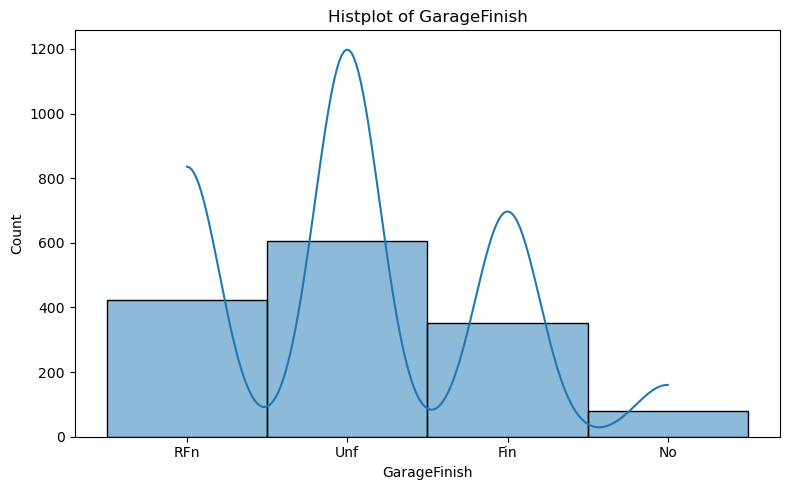

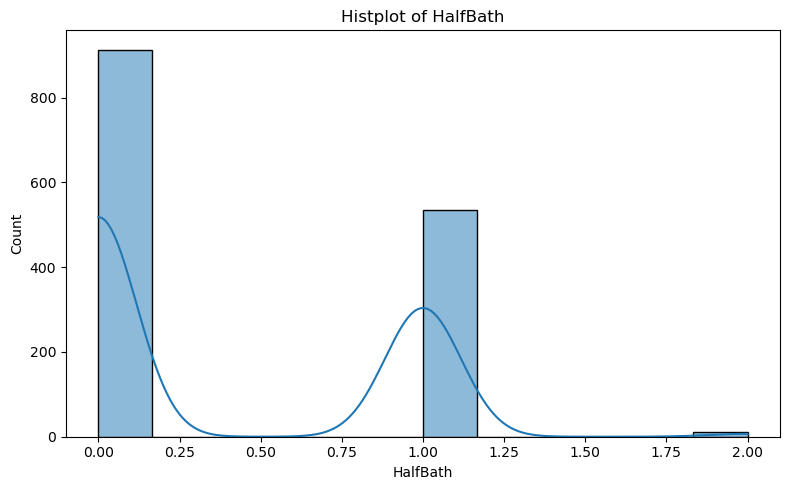

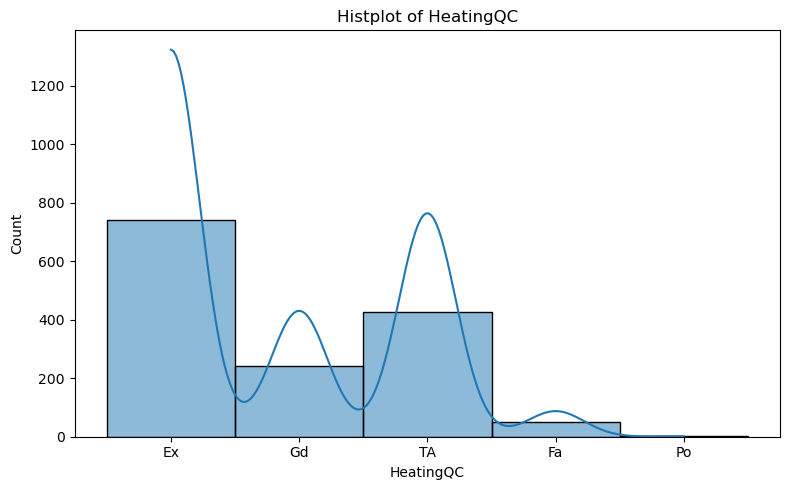

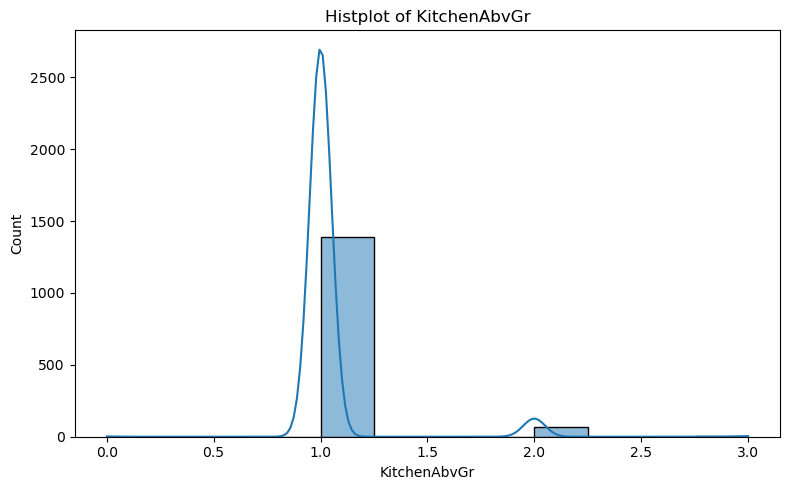

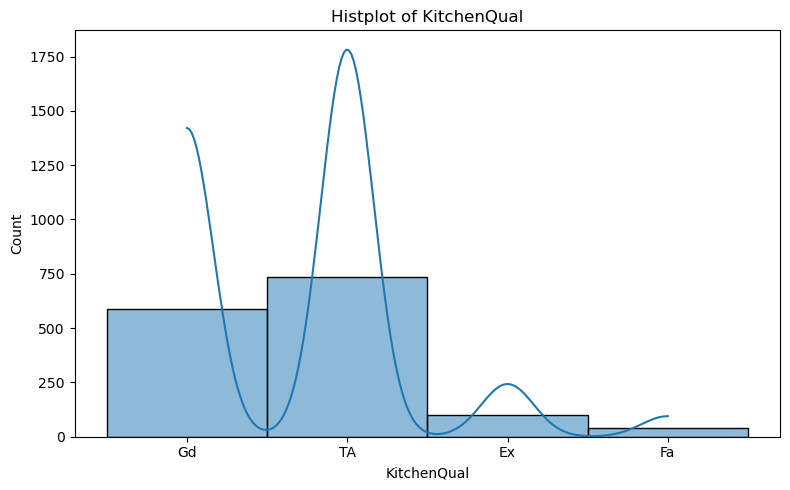

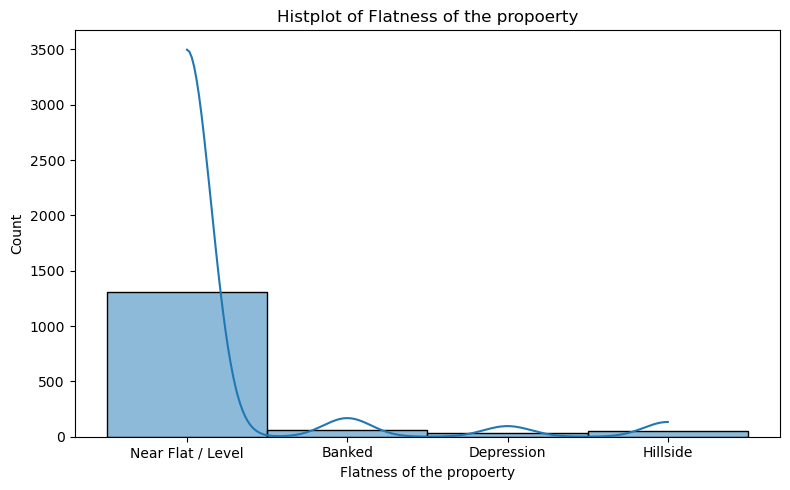

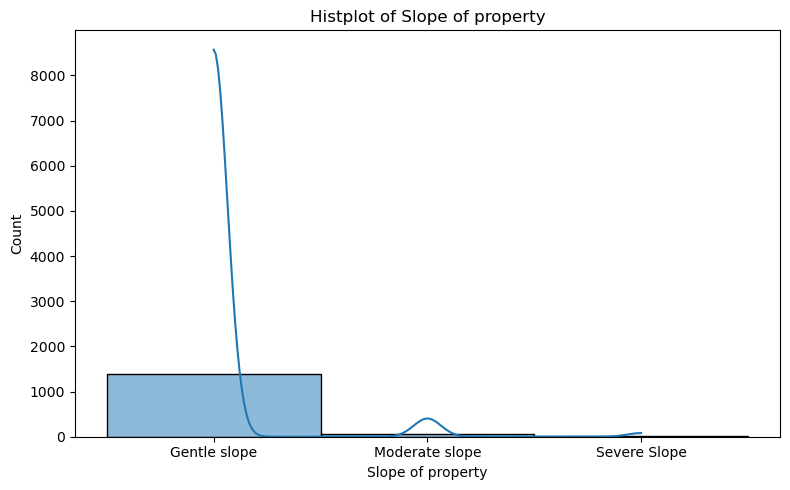

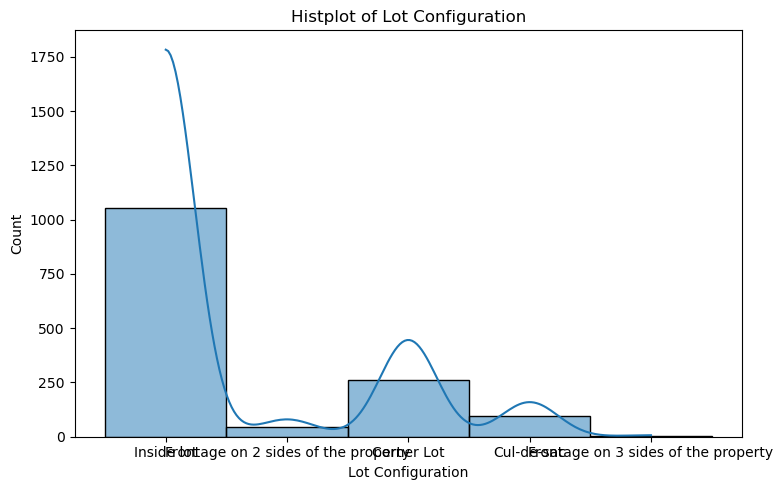

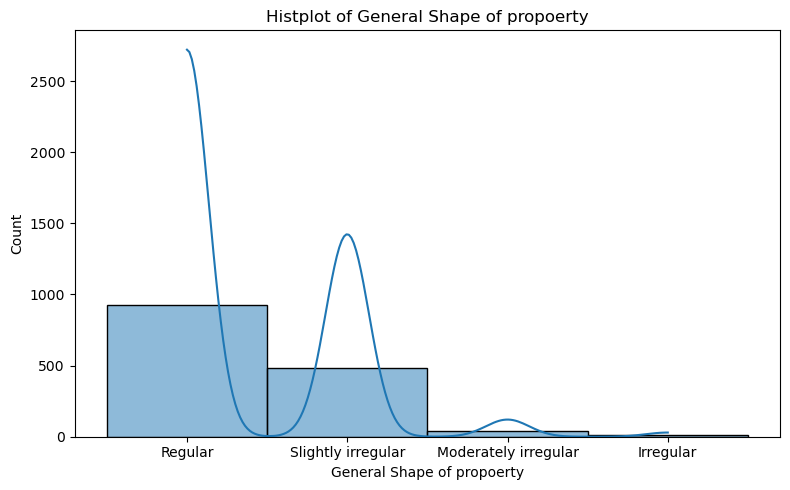

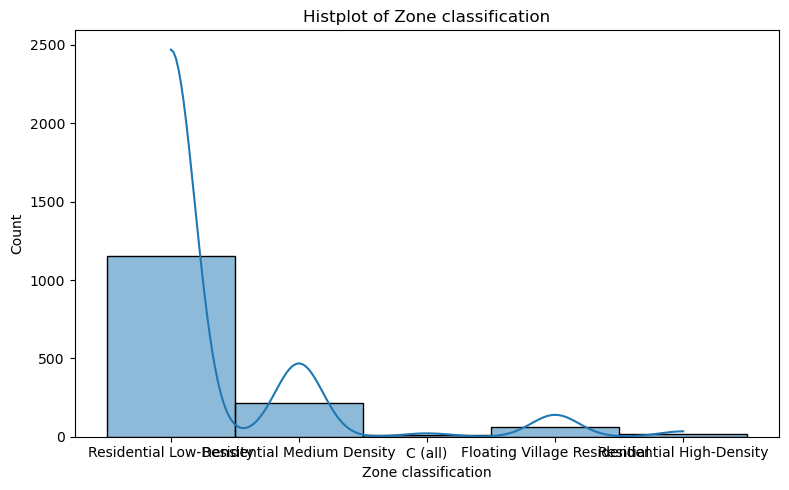

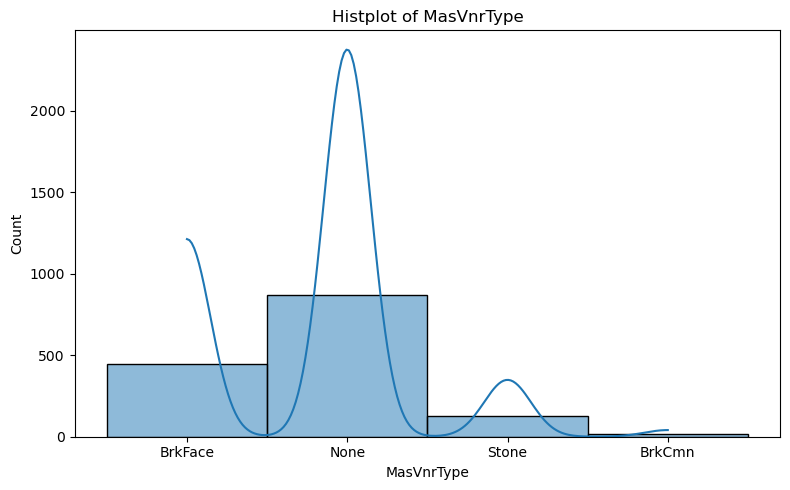

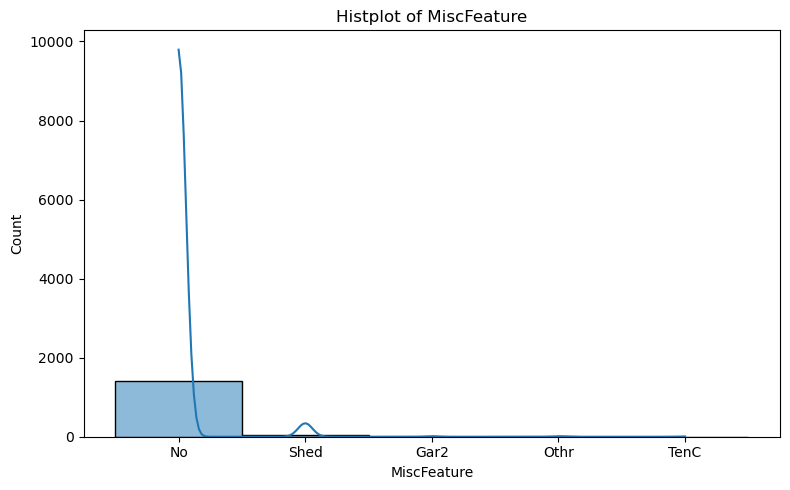

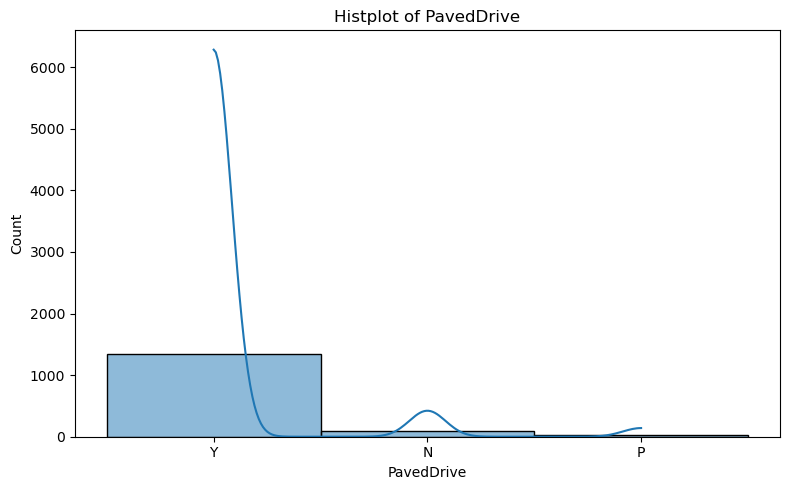

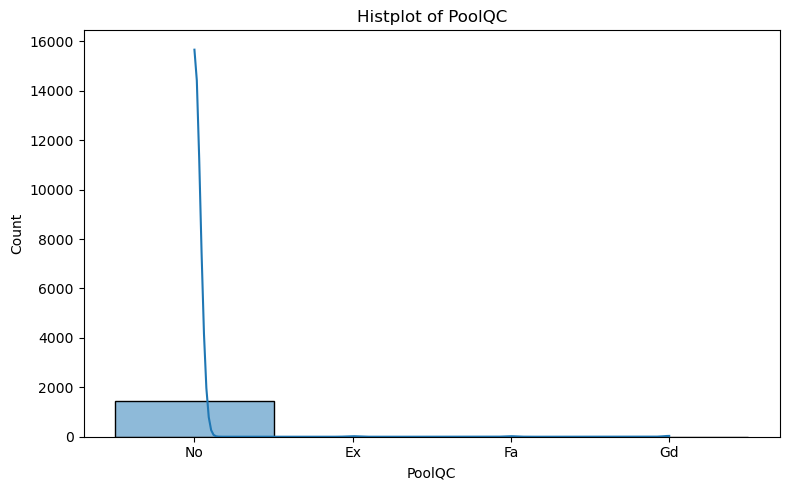

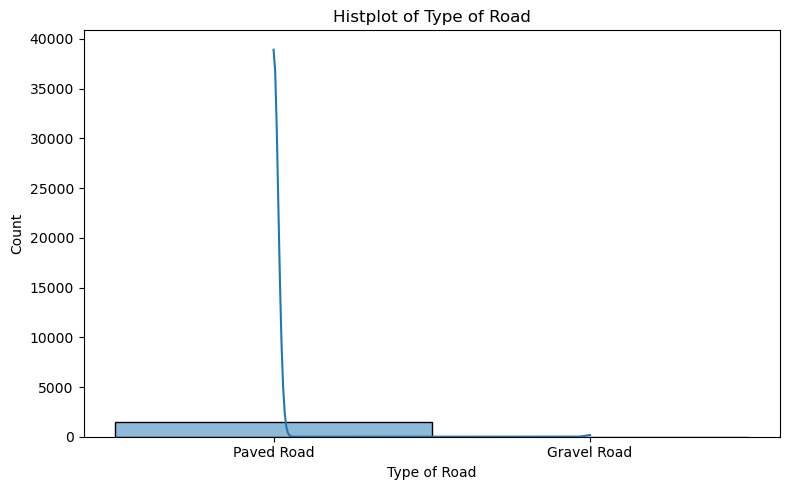

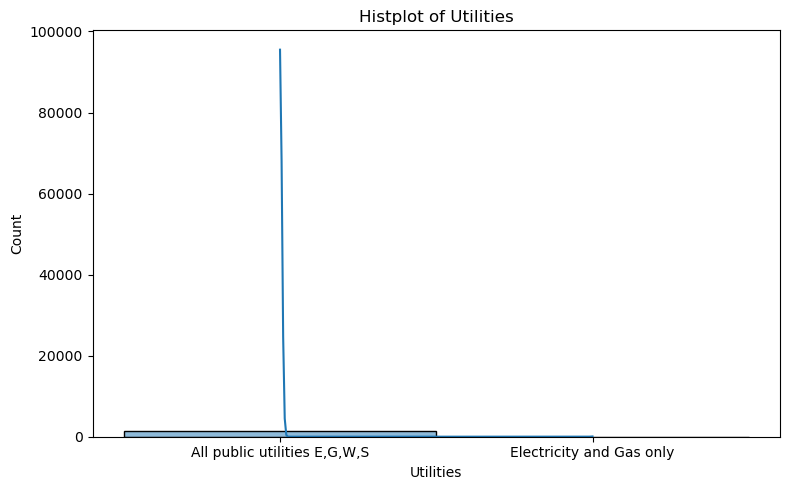

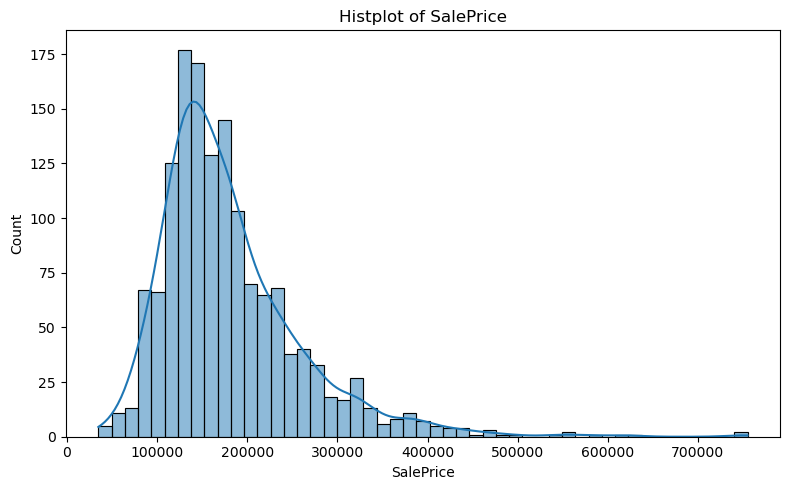

In [66]:

for column in categorical1_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df,x=column,kde=True)
    #sns.countplot(data=df, x=column)
    plt.title(f'Histplot of {column}')

    # Directly set custom labels
    #labels = categorical_columns[column]
    #ticks = range(len(labels))
    #plt.xticks(ticks=ticks, labels=labels)

    plt.tight_layout()
    plt.show()

# Renaming OverallQuad attributes

<Axes: >

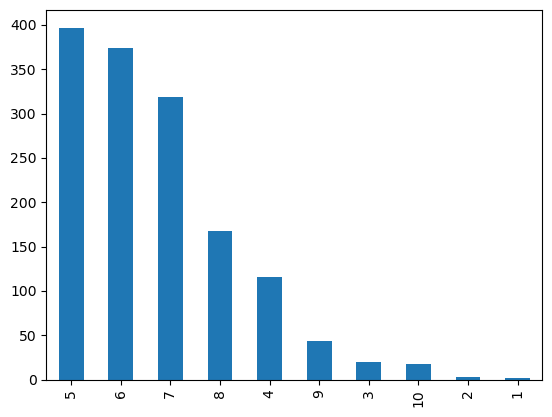

In [67]:
df["OverallQual"].value_counts().plot(kind="bar")

In [68]:
df['OverallQual']=df["OverallQual"].replace({10:"Very Excellent",
                                            9:"Excellent",
                                            8:"Very Good",
                                            7:"Good",
                                            6:"Above Average",
                                            5:"Average",
                                            4:"Below Average",
                                            3:"Fair",
                                            2:"Poor",
                                            1:"Very Poor"})

In [69]:
df["OverallQual"].unique()

array(['Good', 'Above Average', 'Very Good', 'Average', 'Excellent',
       'Below Average', 'Very Excellent', 'Fair', 'Very Poor', 'Poor'],
      dtype=object)

In [70]:
df.rename(columns={'OverallQual':"Overall Quality"},inplace=True)
df.columns

Index(['Unnamed: 0', 'Type of Dwelling', 'Zone classification',
       'Linear feet of street', 'Plot Size(sq.ft)', 'Type of Road', 'Alley',
       'General Shape of propoerty', 'Flatness of the propoerty', 'Utilities',
       'Lot Configuration', 'Slope of property', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Overall Quality',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageTyp

# Renaming OverallCond attributes

<Axes: >

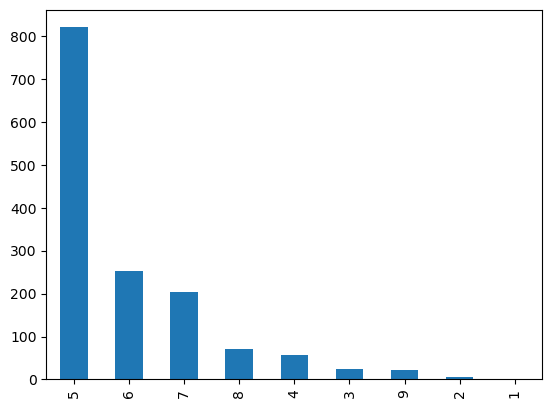

In [71]:
df["OverallCond"].value_counts().plot(kind="bar")

In [72]:
df["OverallCond"]=df["OverallCond"].replace({10:"Very Excellent",
                                            9:"Excellent",
                                            8:"Very Good",
                                            7:"Good",
                                            6:"Above Average",
                                            5:"Average",
                                            4:"Below Average",
                                            3:"Fair",
                                            2:"Poor",
                                            1:"Very Poor"})

In [73]:
df["OverallCond"].unique()

array(['Average', 'Very Good', 'Above Average', 'Good', 'Below Average',
       'Poor', 'Fair', 'Excellent', 'Very Poor'], dtype=object)

In [74]:
df.rename(columns={'OverallCond':"Overall Condition"},inplace=True)
df.columns

Index(['Unnamed: 0', 'Type of Dwelling', 'Zone classification',
       'Linear feet of street', 'Plot Size(sq.ft)', 'Type of Road', 'Alley',
       'General Shape of propoerty', 'Flatness of the propoerty', 'Utilities',
       'Lot Configuration', 'Slope of property', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Overall Quality',
       'Overall Condition', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'Gar

# Renaming column names which are correlated to Sales Price

In [75]:
df.rename(columns={"YearBuilt":"Original Construction date","YearRemodAdd":"Remodel date"},inplace=True)
df.columns

Index(['Unnamed: 0', 'Type of Dwelling', 'Zone classification',
       'Linear feet of street', 'Plot Size(sq.ft)', 'Type of Road', 'Alley',
       'General Shape of propoerty', 'Flatness of the propoerty', 'Utilities',
       'Lot Configuration', 'Slope of property', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Overall Quality',
       'Overall Condition', 'Original Construction date', 'Remodel date',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'F

In [76]:
df.rename(columns={"MasVnrType":"Masonary veneer type",
                   "BsmtFinSF1":"Type 1 finished aquare feet",
                  "1stFlrSF":"First Floor square feet",
                  "2ndFlrSF":"Second floor square feet",
                  "GrLivArea":"Above grad (ground) living area sqaure feet",
                  "FullBath":"Full bathrooms above grade",
                  "HalfBath":"Half bath above grade",
                  "TotRmsAbvGrd":"Total rooms above ground",
                  "Fireplaces":"Number of fireplaces",
                  "GarageYrBlt":"Year Garage was bulit",
                  "GarageCars":"Garage car capacity",
                  "GarageArea":"Size of garage in sq. feet",
                  "WoodDeckSF":"Wood deck area in sq. feet",
                  "OpenPorchSF":"Open porch area in sq. feet"},inplace=True)
df.columns

Index(['Unnamed: 0', 'Type of Dwelling', 'Zone classification',
       'Linear feet of street', 'Plot Size(sq.ft)', 'Type of Road', 'Alley',
       'General Shape of propoerty', 'Flatness of the propoerty', 'Utilities',
       'Lot Configuration', 'Slope of property', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'Overall Quality',
       'Overall Condition', 'Original Construction date', 'Remodel date',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'Masonary veneer type', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Type 1 finished aquare feet', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'First Floor square feet', 'Second floor square feet',
       'LowQualFinSF', 'Above grad (ground) living area sqaure feet',
       'BsmtFullBath', 'BsmtHalfBath', 'Full bathrooms above gra

In [77]:
df["Number of fireplaces"].unique()

array([0, 1, 2, 3], dtype=int64)

# Bivariate analsyis on Sales Price vs Overall Condition

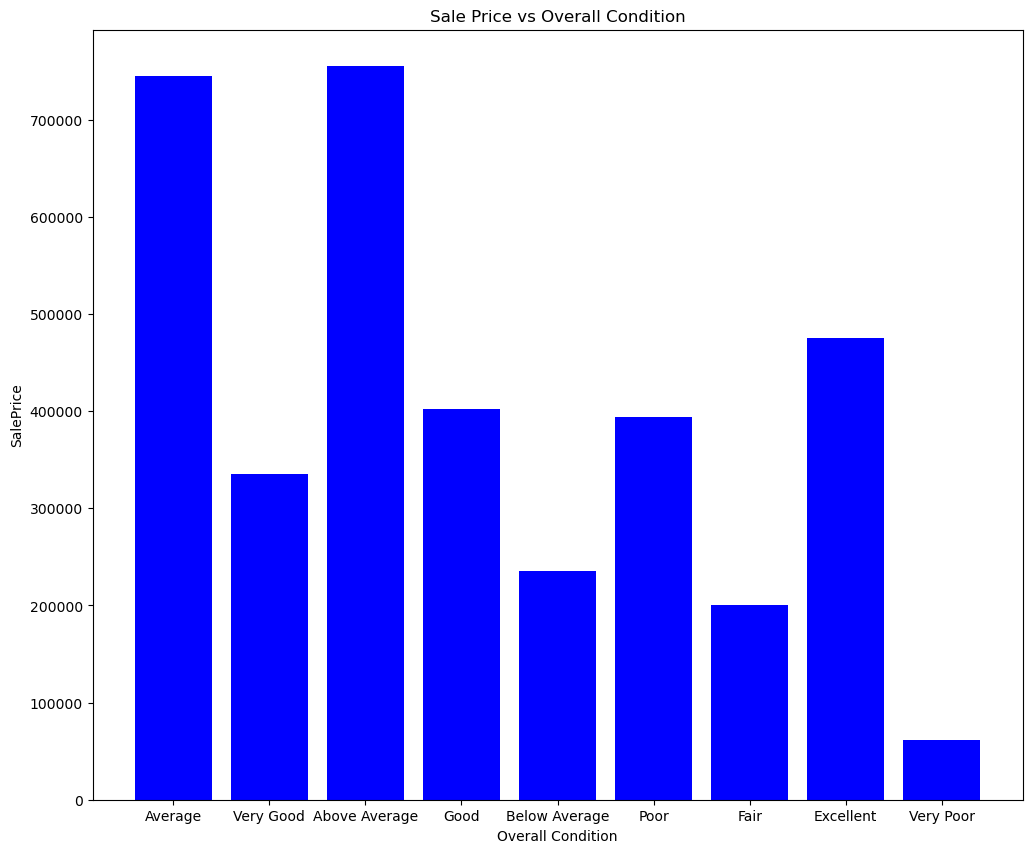

In [78]:
plt.figure(figsize=(12,10))
plt.bar(df["Overall Condition"],df["SalePrice"],color="blue")
plt.xlabel("Overall Condition")
plt.ylabel('SalePrice')
plt.title('Sale Price vs Overall Condition')
plt.show()


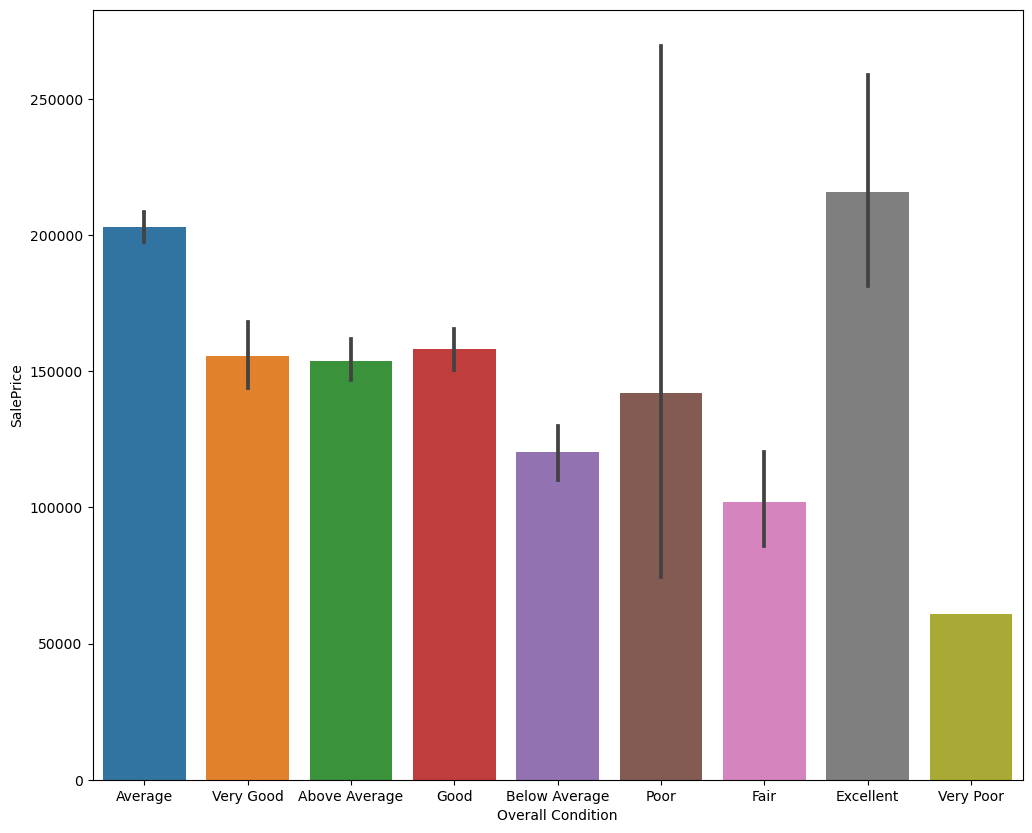

In [79]:
#2nd method to plot barplot
plt.figure(figsize=(12,10))
sns.barplot(x='Overall Condition',y='SalePrice',data=df)
plt.show()

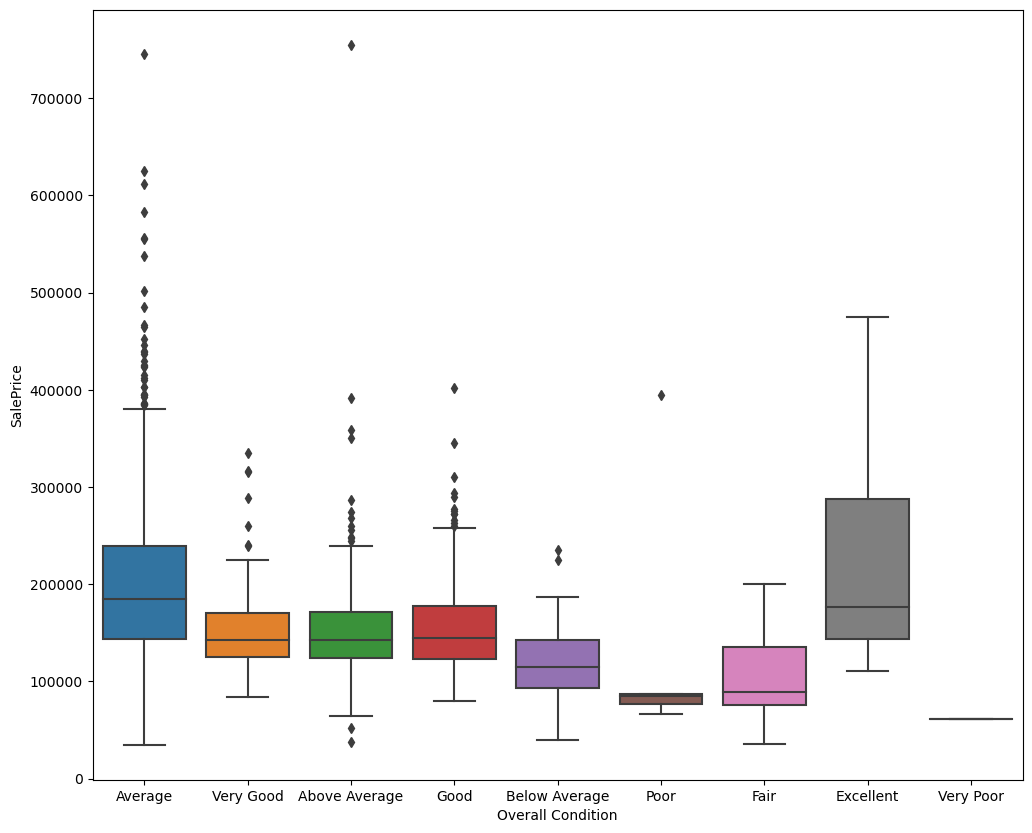

In [80]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Overall Condition',y='SalePrice',data=df)
plt.show()

Bivariate Analysis:

1.Above Average and Average conditions SalePrice are highest and second highest respectievely.

2.Average conditions has most outliers that have highest sales price.

3.Excellent conditions are third highest priced although they are good in condition. Except the outliers of other conditions, Excellent conditions house's price range are highest.

4.Poor and Very Poor conditions have lowest sale prices.

5.Very Good and Above Average has similar range of sales prices. Somewhere Good condiions has also same range.


# Bivariate analysis on SalePrice and Overall quality

### Bar plot

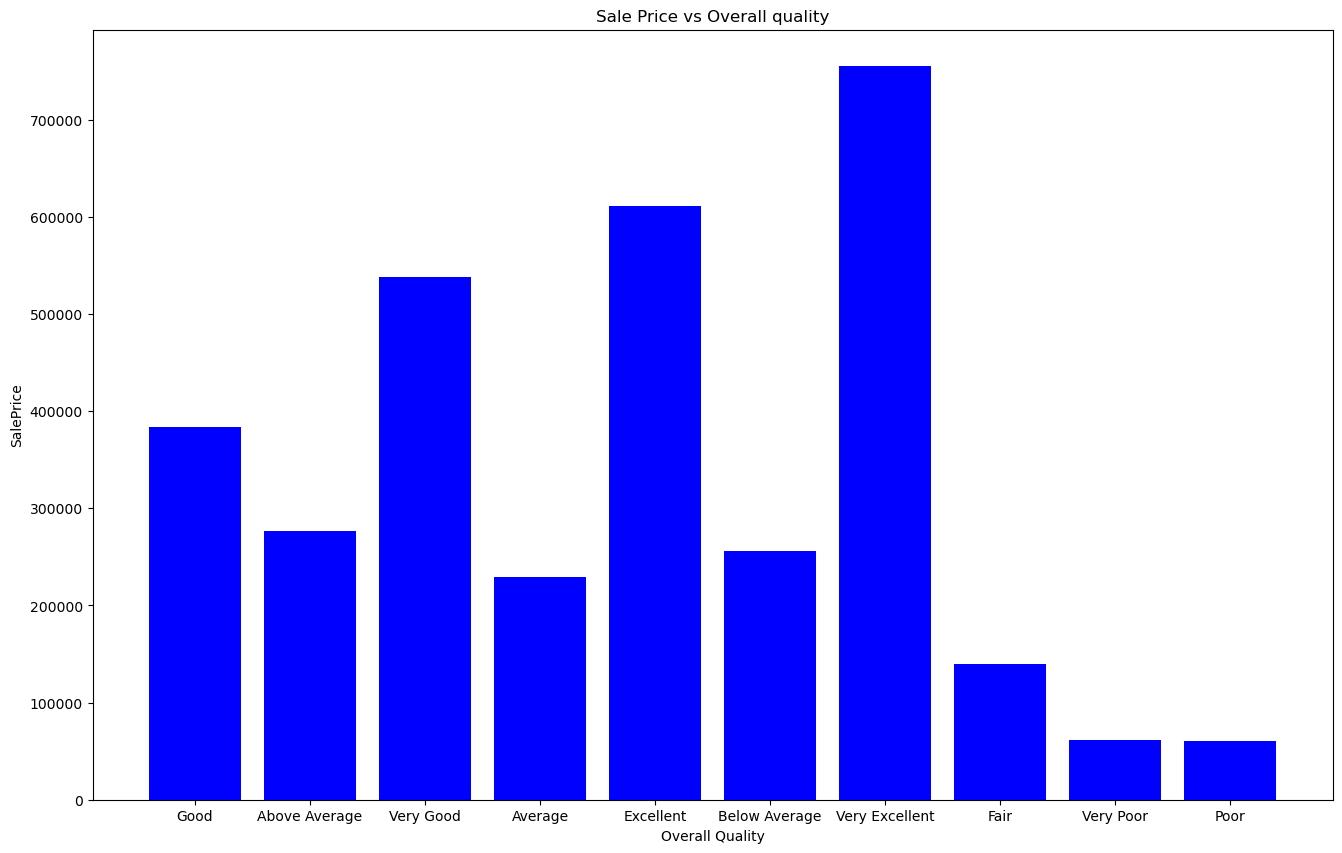

In [81]:
plt.figure(figsize=(16,10))
plt.bar(df["Overall Quality"],df["SalePrice"],color="blue")
plt.xlabel("Overall Quality")
plt.ylabel('SalePrice')
plt.title('Sale Price vs Overall quality')
plt.show()


### Box plot

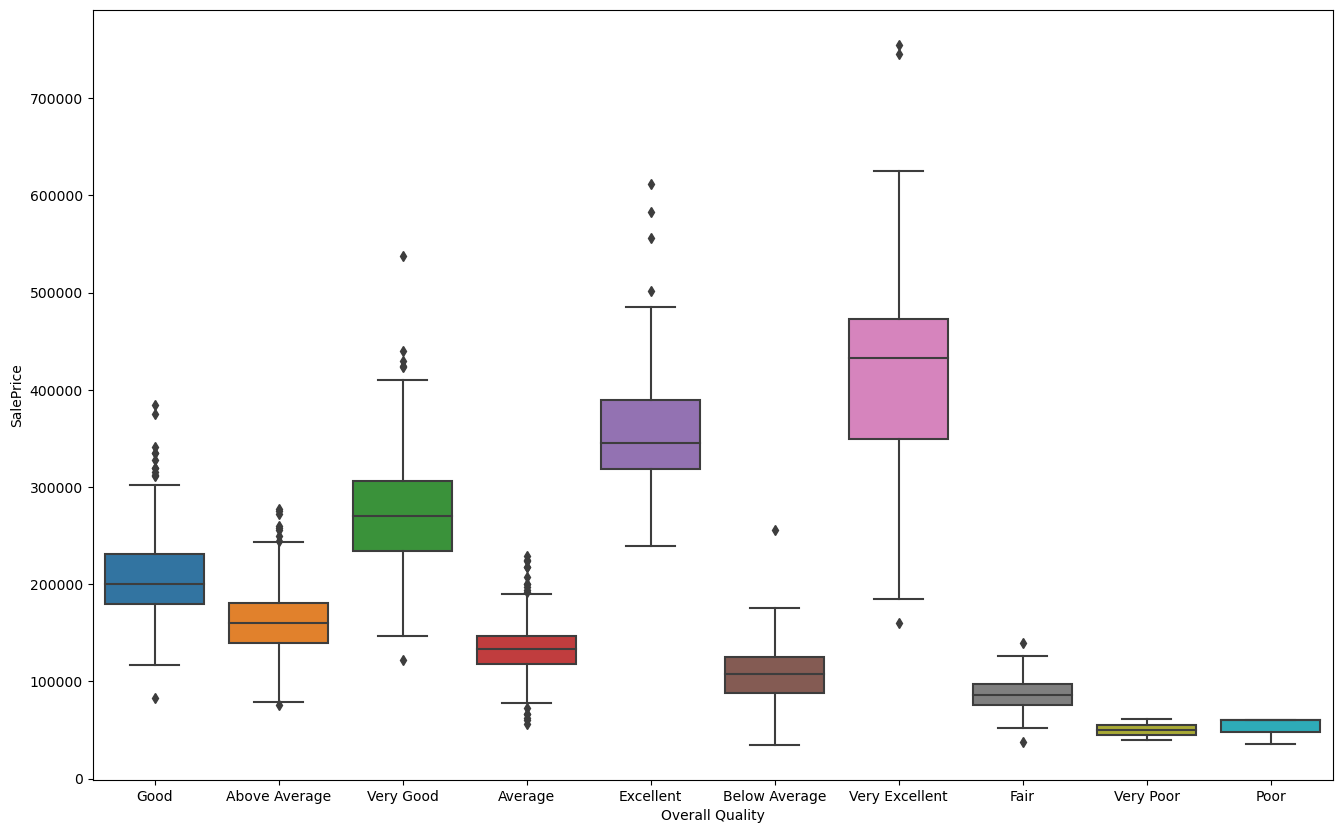

In [82]:
plt.figure(figsize=(16,10))
sns.boxplot(x='Overall Quality',y="SalePrice",data=df)
plt.show()

### Scatter Plot

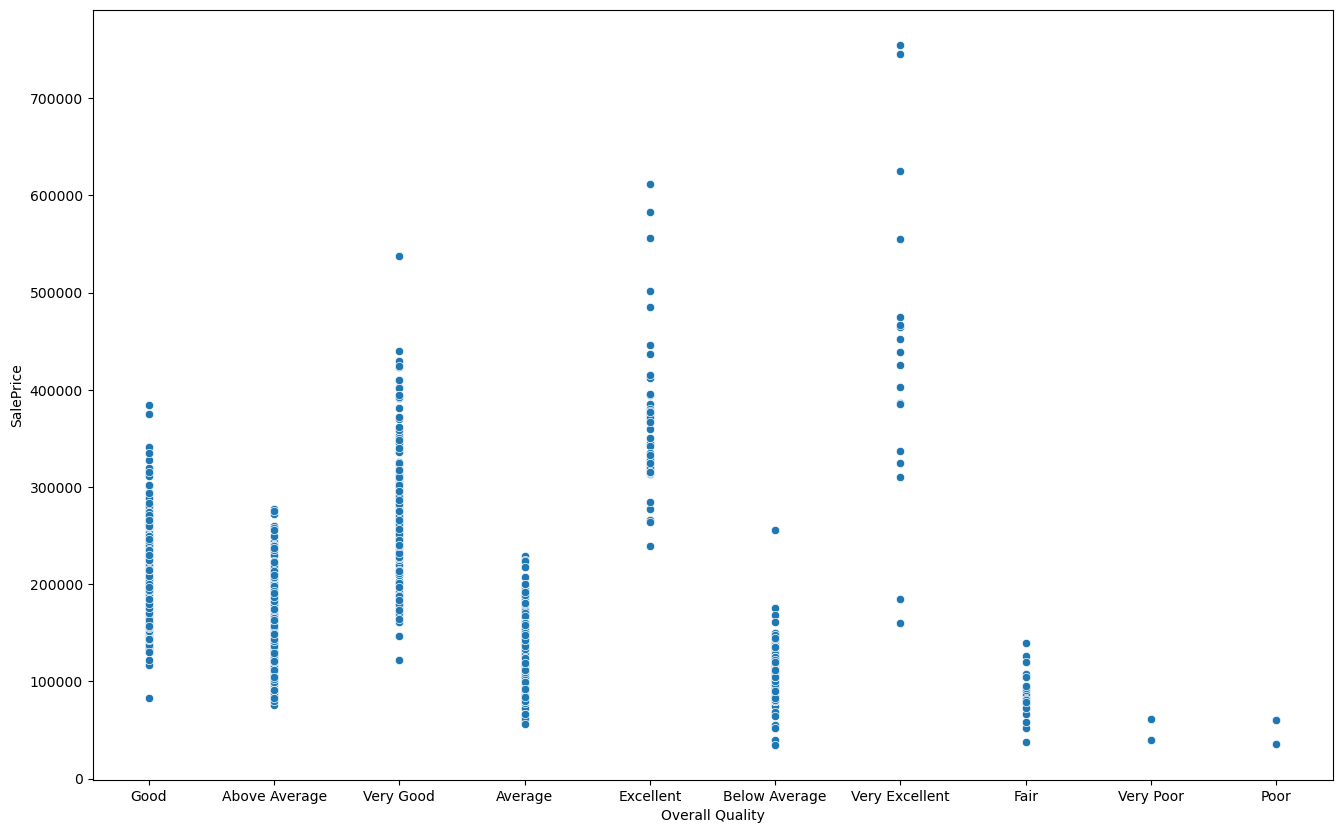

In [83]:
plt.figure(figsize=(16,10))
sns.scatterplot(x="Overall Quality",y="SalePrice",data=df)
plt.show()

### Scatter Plot

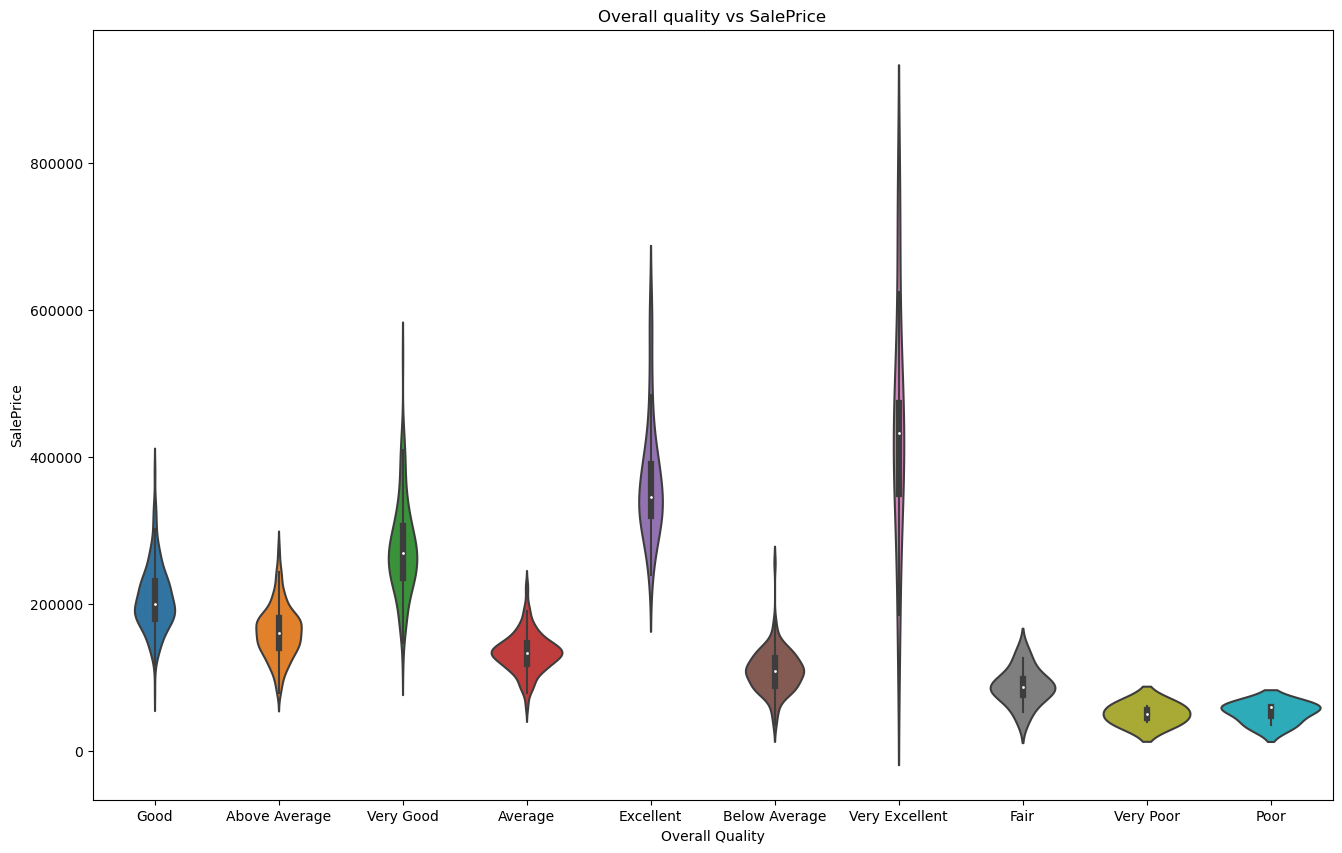

In [84]:
plt.figure(figsize=(16,10))
sns.violinplot(x="Overall Quality",y="SalePrice",data=df)
plt.title("Overall quality vs SalePrice")
plt.show()

### Analysis

1.Very Excellent and Excellent quality has highest and 2nd highest sale price.

2.Poor and very poor have lowest sale price.

3.Very good has 3rd highest sale price.

In [85]:
#plt.figure(figsize=(16,12))
#sns.pairplot(data=df,hue='SalePrice')
#plt.show()

# Bivariate analysis on Original Construction date and SalePrice

### Bar plot

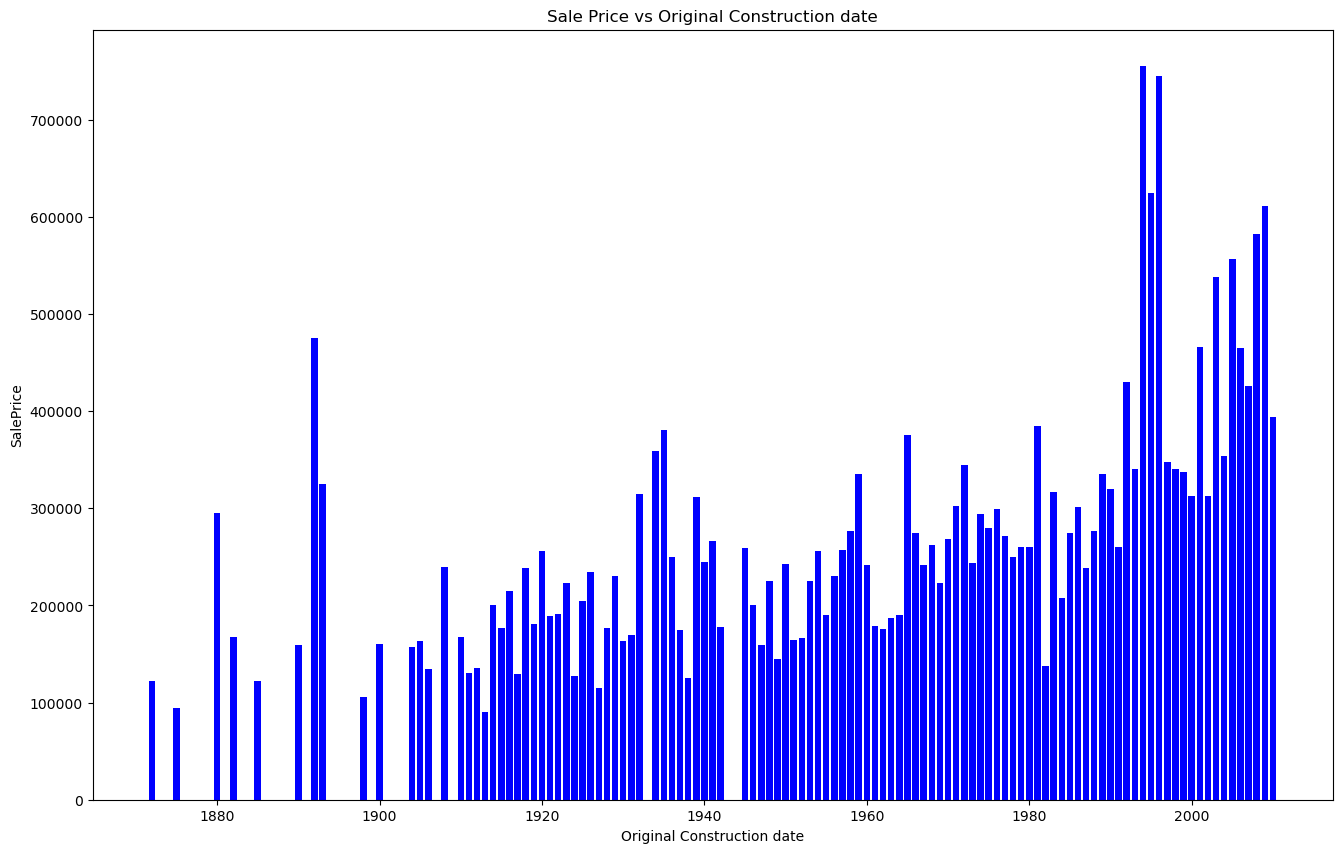

In [86]:
plt.figure(figsize=(16,10))
plt.bar(df["Original Construction date"],df["SalePrice"],color="blue")
plt.xlabel("Original Construction date")
plt.ylabel('SalePrice')
plt.title('Sale Price vs Original Construction date')
plt.show()

### Scatter plot

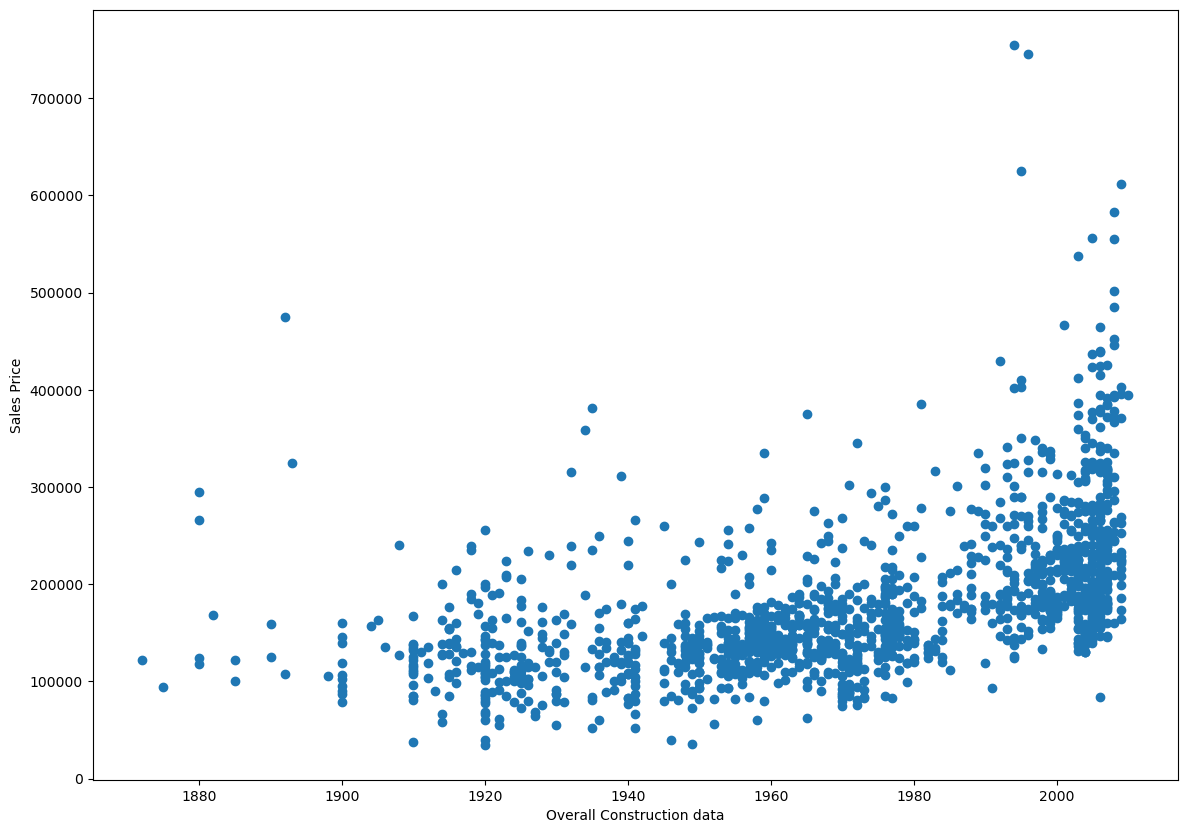

In [87]:
# Original Construction date

plt.figure(figsize=(14,10))
plt.xlabel("Overall Construction data")
plt.ylabel("Sales Price")
plt.scatter(df['Original Construction date'],df['SalePrice'])
plt.show()

### Boxplot

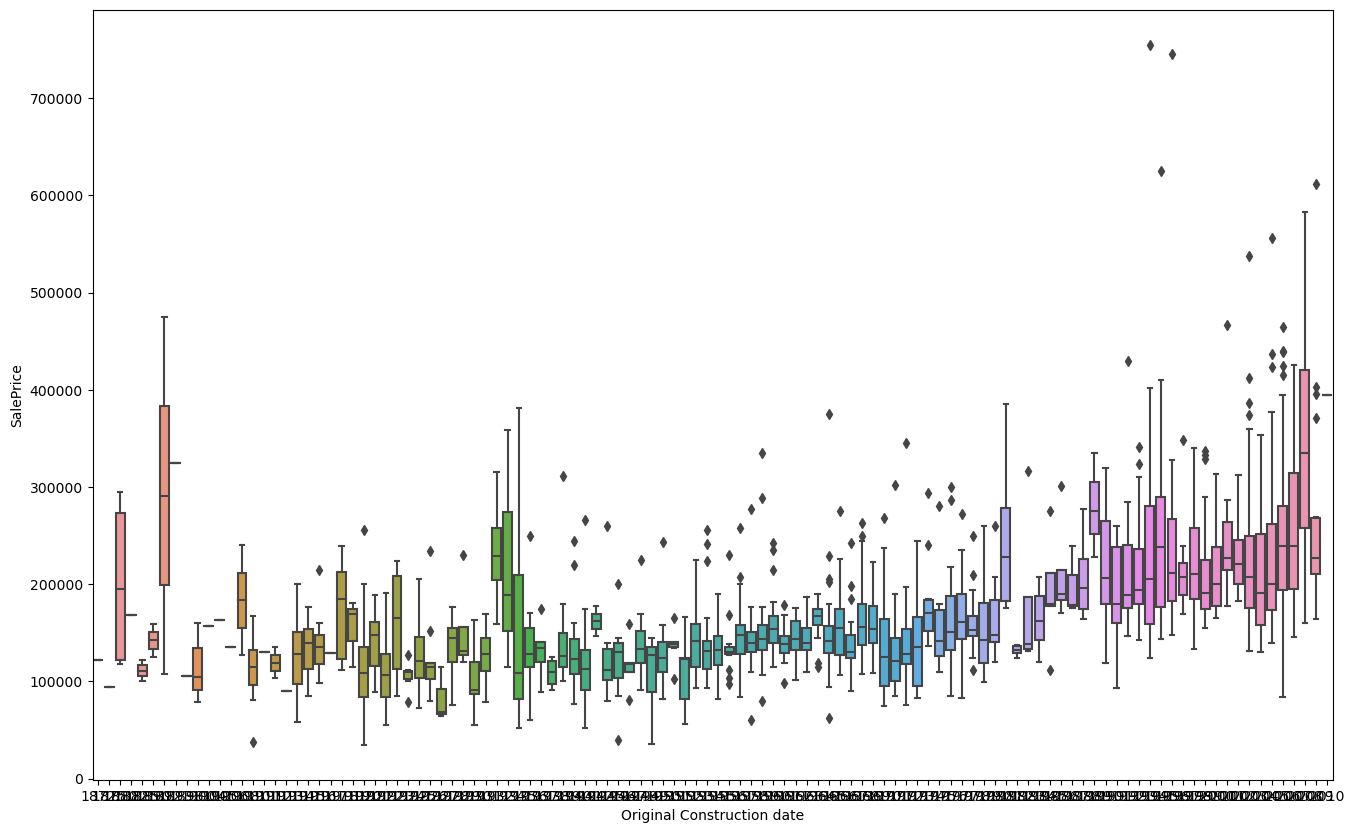

In [88]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Original Construction date",y="SalePrice",data=df)
plt.show()

### Line Plot

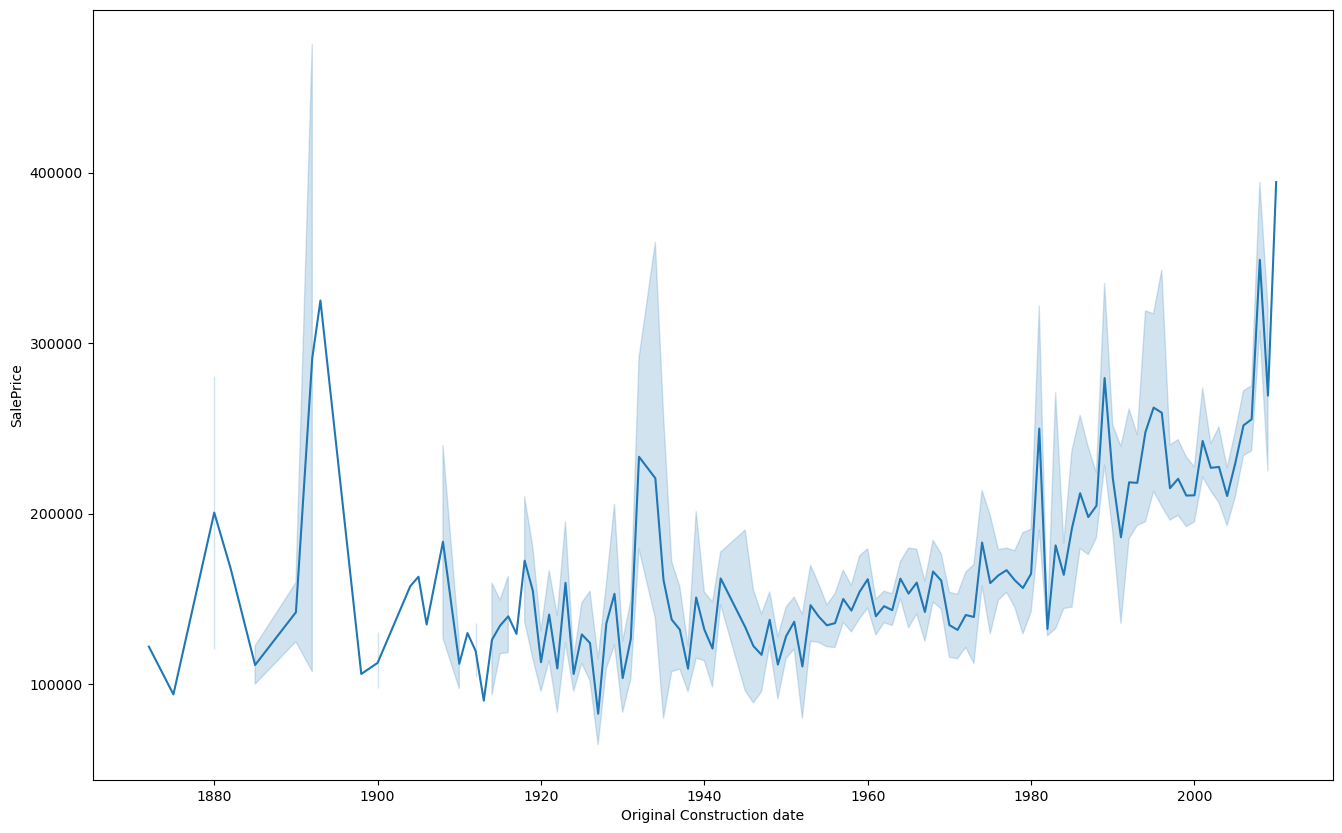

In [89]:
plt.figure(figsize=(16,10))
sns.lineplot(x="Original Construction date",y="SalePrice",data=df)
plt.show()

### Analysis

1.Maximum houses were constructed during 1960s and again it surged in around 1900s & 2000s.

2.Houses constructed after 2000s have highest prices.

3.Very few houses were constructed before 1900s.

4.Very few hou houses have sale price more than 7 lakhs.

# Bivariate analysis on Remodel date and SalePrice

### Barplot

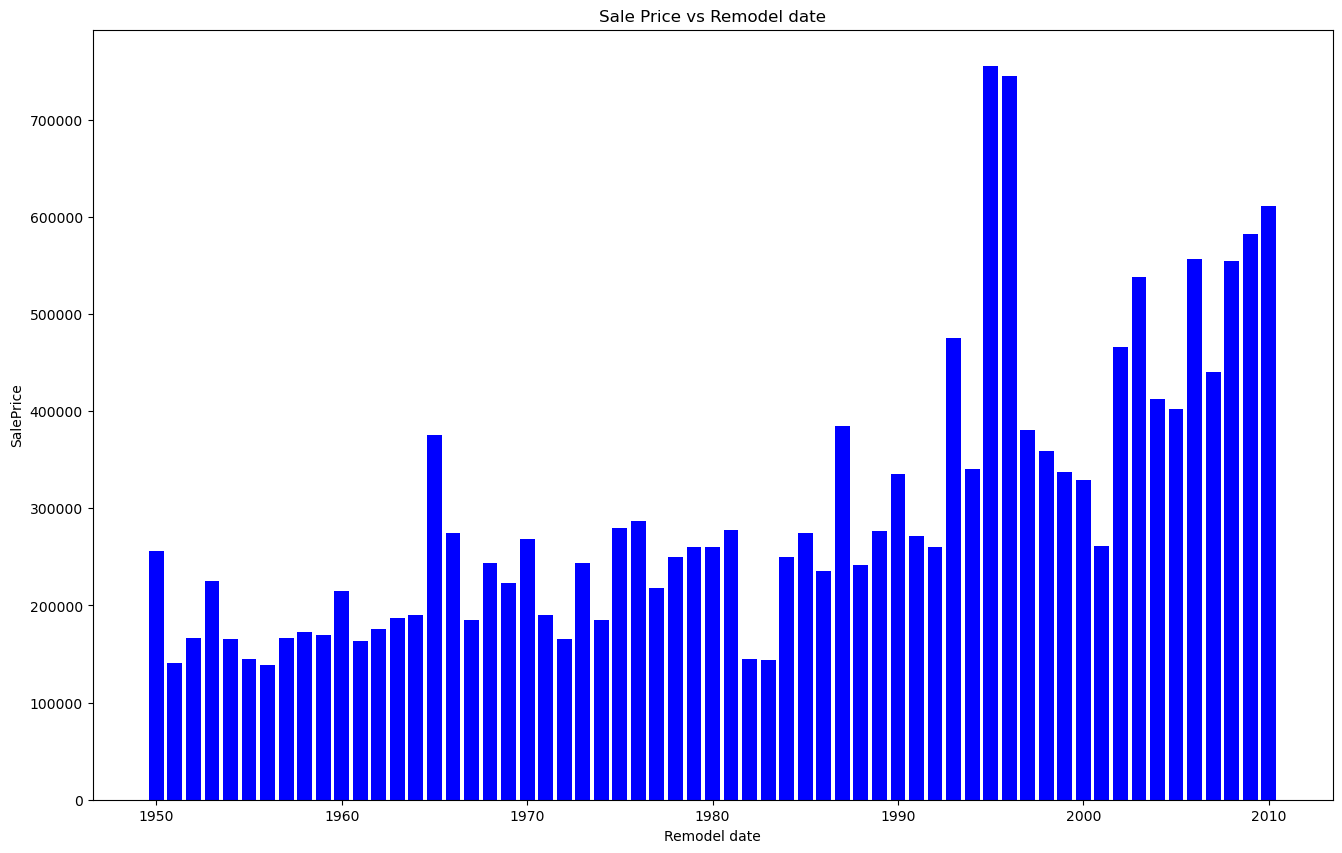

In [90]:
plt.figure(figsize=(16,10))
plt.bar(df["Remodel date"],df["SalePrice"],color="blue")
plt.xlabel("Remodel date")
plt.ylabel('SalePrice')
plt.title('Sale Price vs Remodel date')
plt.show()

### Boxplot

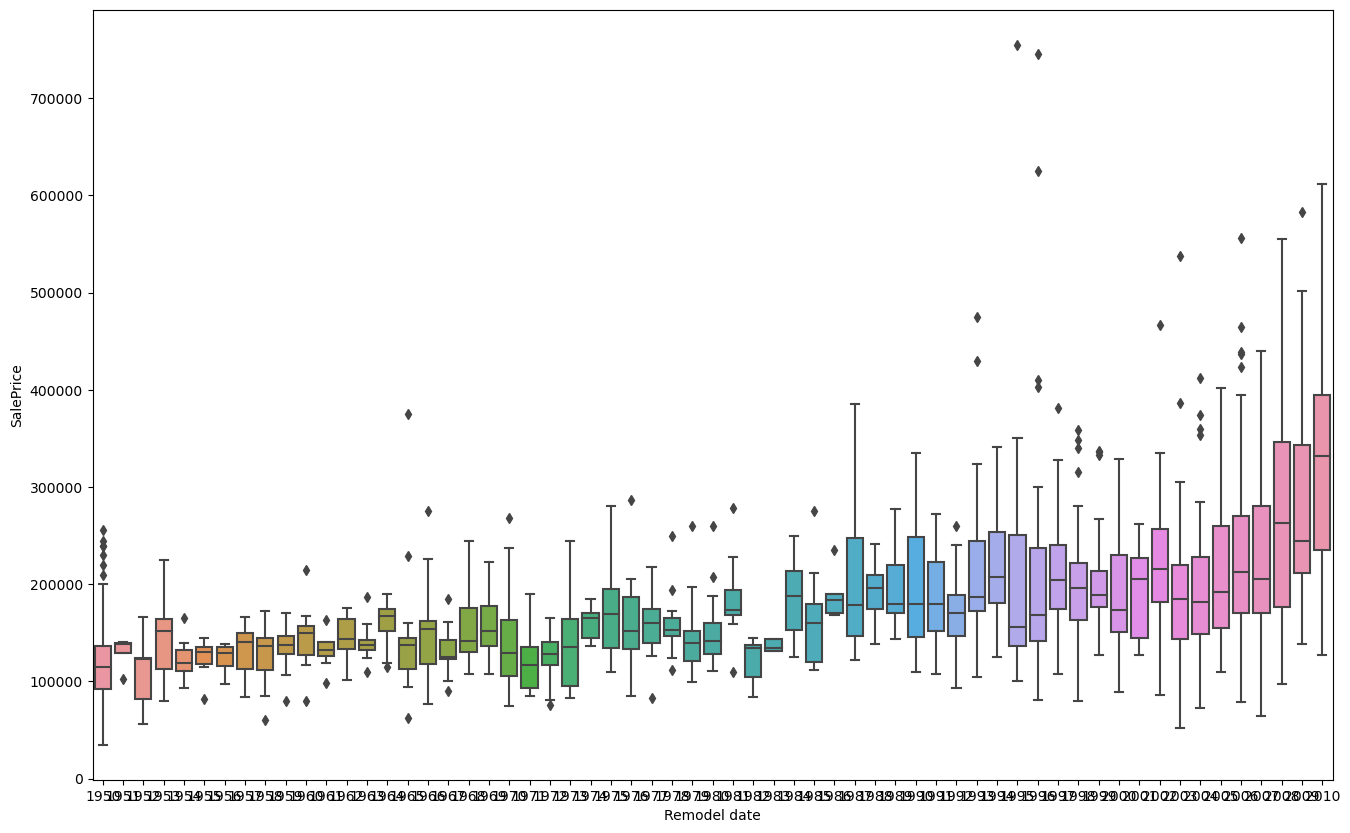

In [91]:
plt.figure(figsize=(16,10))
sns.boxplot(x="Remodel date",y="SalePrice",data=df)
plt.show()

### Scatterplot

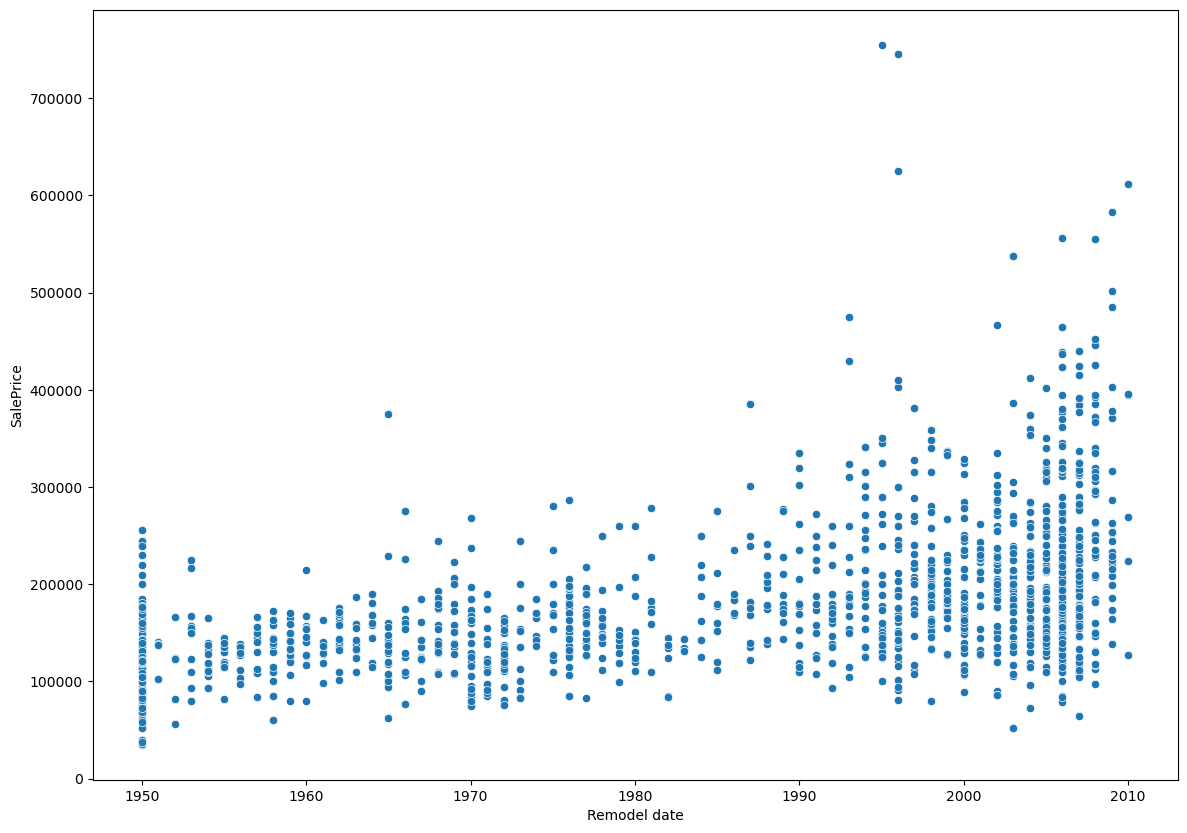

In [92]:
plt.figure(figsize=(14,10))
sns.scatterplot(x="Remodel date",y='SalePrice',data=df)
plt.show()

### Analysis

1.Maximum house remodeled in 1950s and then again surged during 1990s and 2000s afteewards

2.Very less houses were remodelled during period of 1980s to 1990s.

3.Remodelled Houses have maximum sales price during 1990s abd afterwards 2000s

# Bivariate analysis on Masonary veneer type and Sale Price

### Changing  Masonary veneer type column attributes

In [93]:
df['Masonary veneer type']=df["Masonary veneer type"].replace({"BrkCmn":"Brick Common",
                                            "BrkFace":"Brick Face",
                                            "CBlock":"Cinder Block",
                                           })
                                                               

In [94]:
df["Masonary veneer type"].unique()

array(['Brick Face', 'None', 'Stone', 'Brick Common'], dtype=object)

### Bar plot

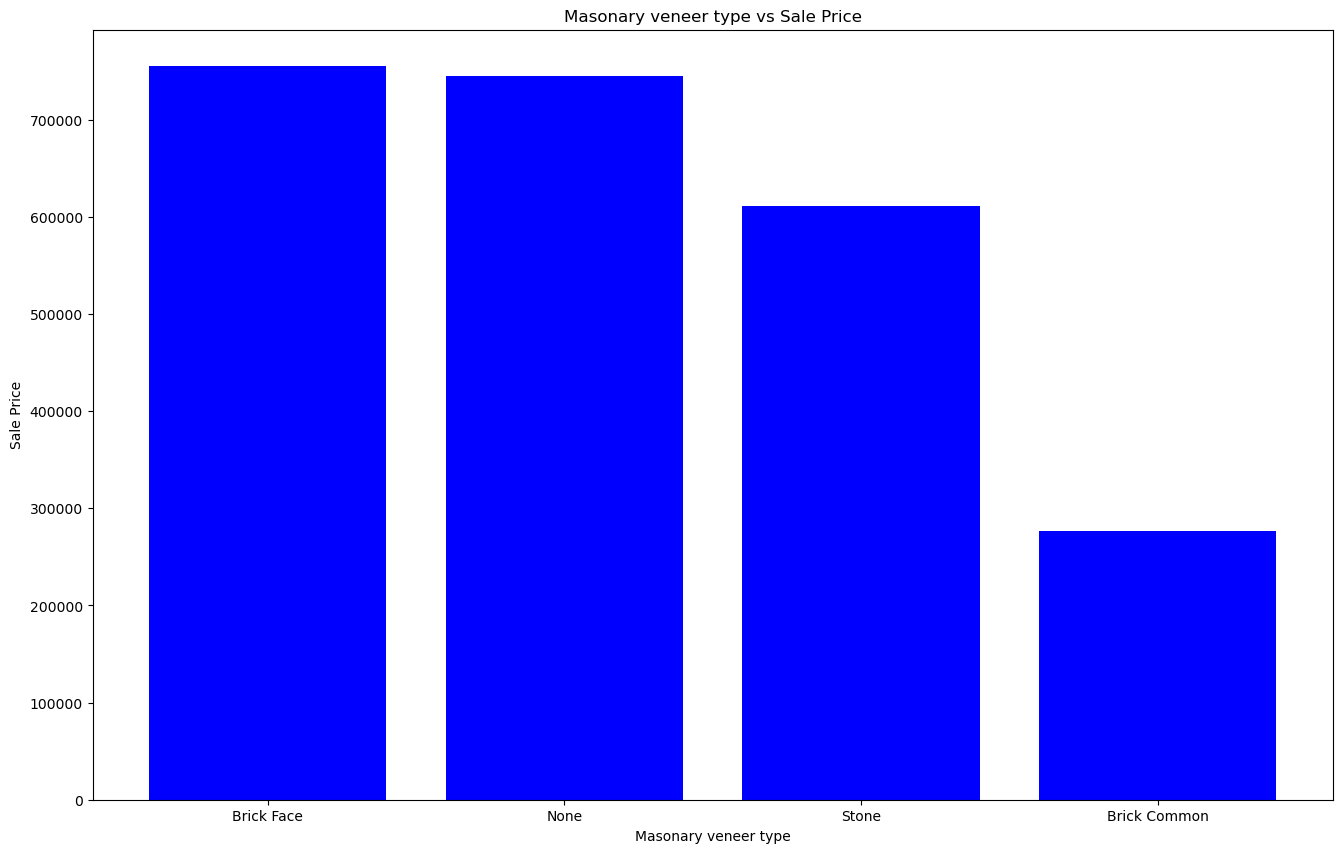

In [95]:
plt.figure(figsize=(16,10))
plt.bar(df["Masonary veneer type"],df["SalePrice"],color="blue")
plt.xlabel("Masonary veneer type")
plt.ylabel("Sale Price")
plt.title("Masonary veneer type vs Sale Price")
plt.show()

### Boxenplot

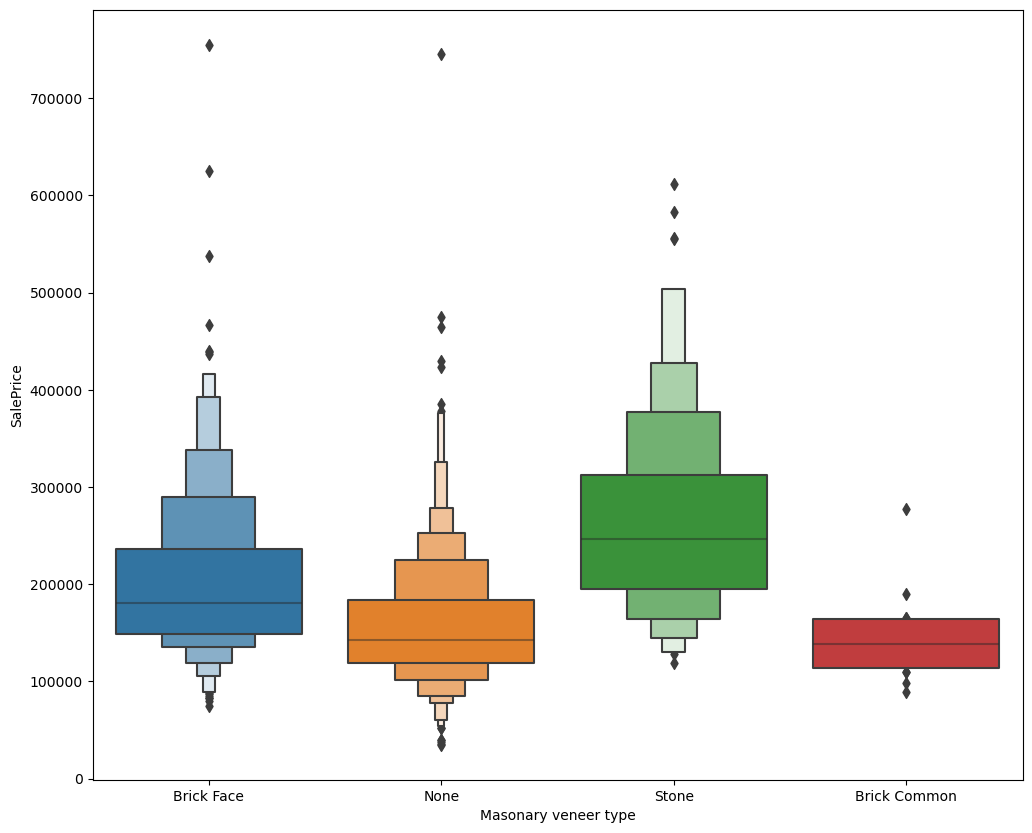

In [96]:
plt.figure(figsize=(12,10))
sns.boxenplot(x='Masonary veneer type',y='SalePrice',data=df)
plt.show()

### Boxplot

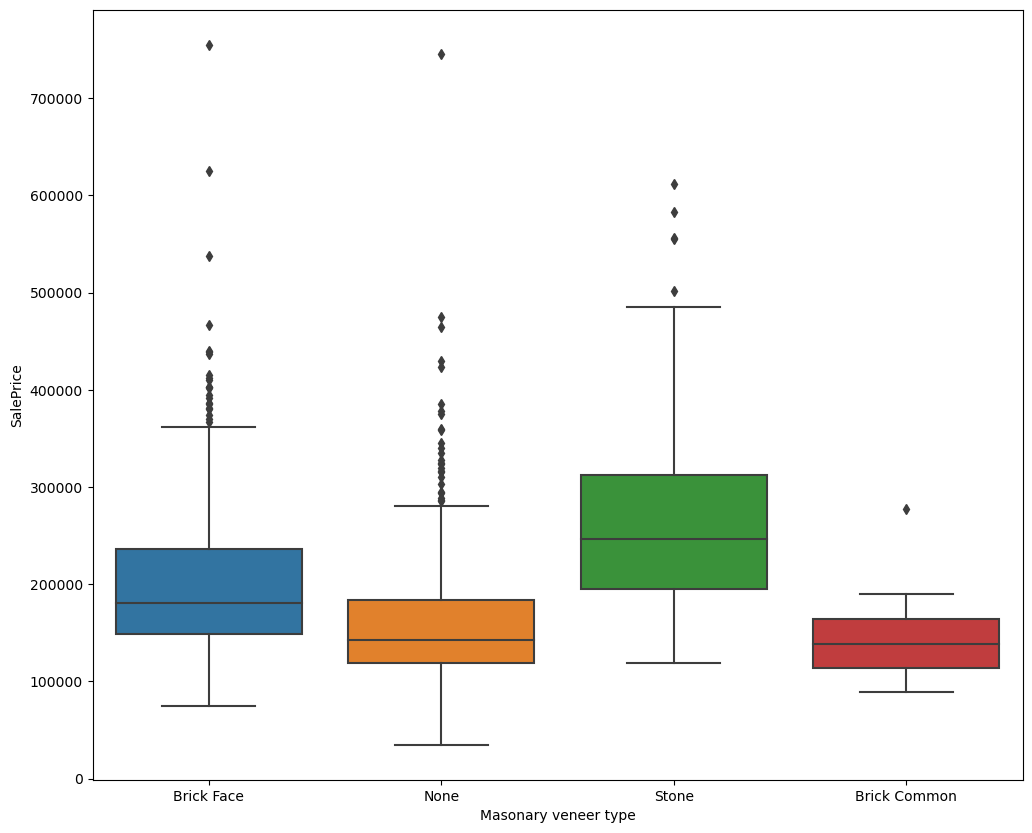

In [97]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Masonary veneer type',y='SalePrice',data=df)
plt.show()

### Violinplot

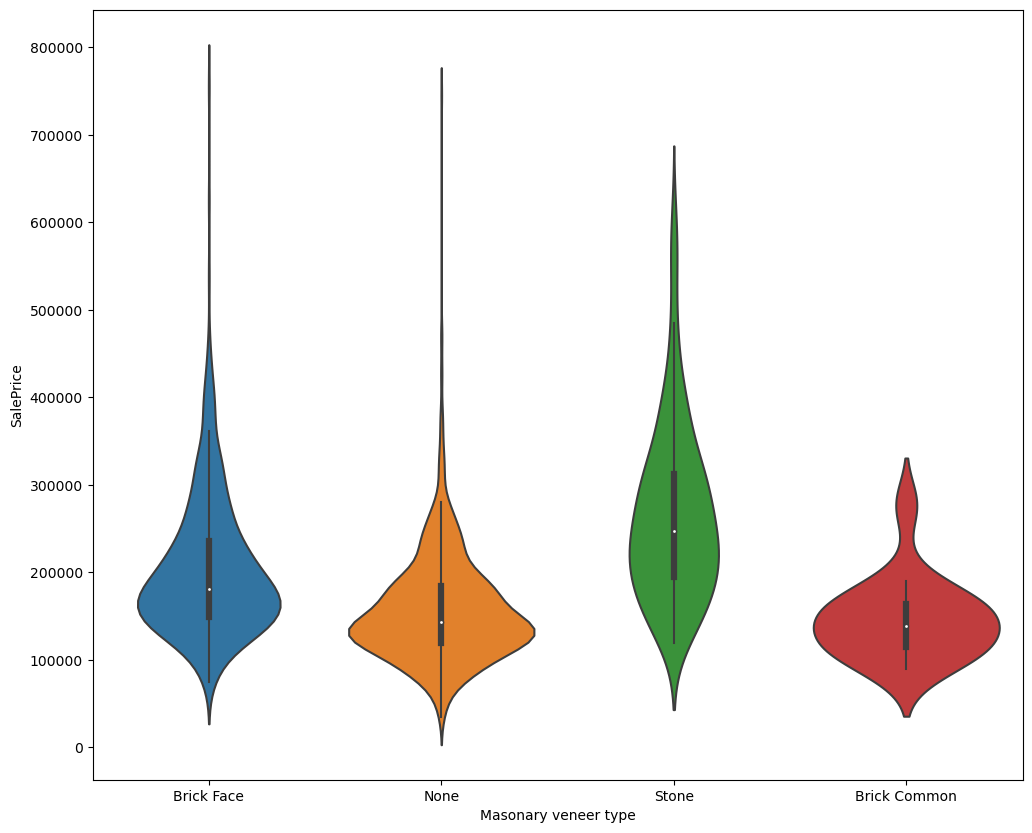

In [98]:
plt.figure(figsize=(12,10))
sns.violinplot(x='Masonary veneer type',y='SalePrice',data=df)
plt.show()

### Scatterplot

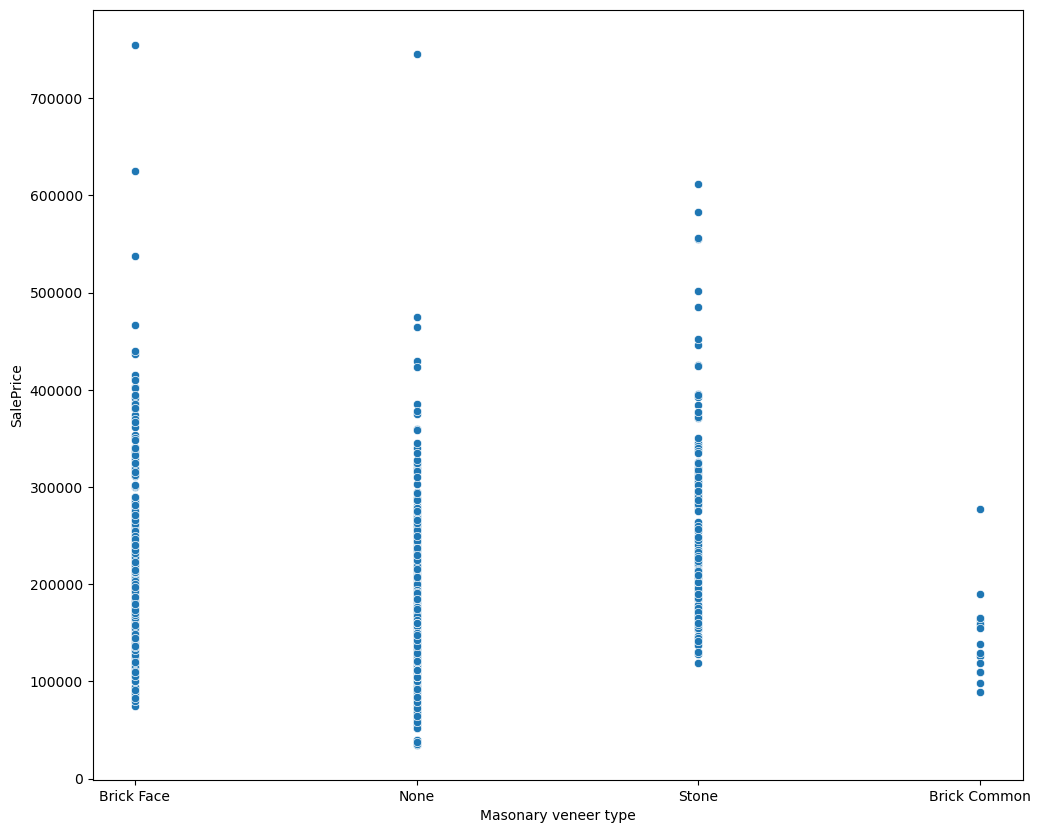

In [99]:
plt.figure(figsize=(12,10))
sns.scatterplot(x='Masonary veneer type',y='SalePrice',data=df)
plt.show()

### Lineplot

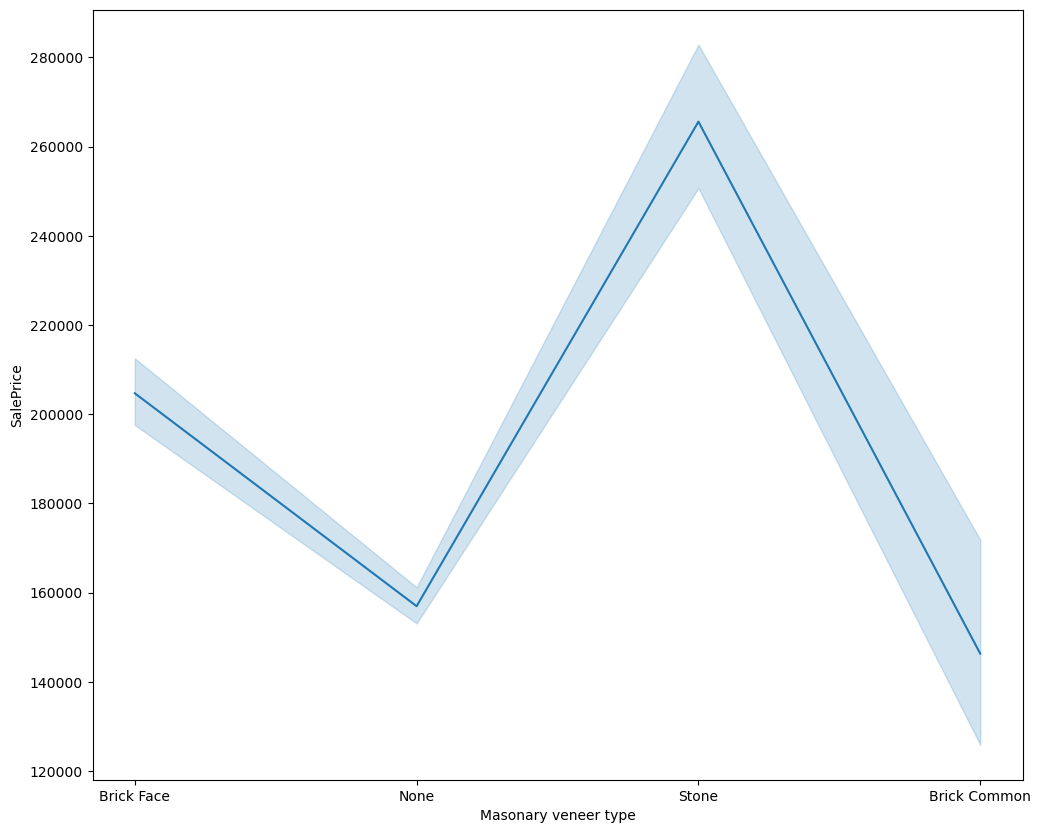

In [100]:
plt.figure(figsize=(12,10))
sns.lineplot(x='Masonary veneer type',y='SalePrice',data=df)
plt.show()

### Analysis
1.Brickface has highest and None category has 2nd highest sale price.

2.Except some outliers Brickface and None ,Stone type has range of high prices ( 2lakhs to 3 lakhs ) as its
  visible in Box plot.
    
3.Brick common type has lowest price.

# Bivariate analysis on First Floor square feet and Sale Price

### Unique values

In [101]:
df["First Floor square feet"].unique()

array([ 856, 1262,  920,  961, 1145,  796, 1694, 1107, 1022, 1077, 1040,
       1182,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 1158, 1108,
       1795, 1060, 1600,  900, 1704,  520,  649, 1228, 1234, 1700, 1561,
       1132, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       1518, 1656,  736,  955,  794,  816, 1842, 1360, 1425,  983,  860,
       1426,  780,  581, 1370,  902, 1143, 2207, 1479,  747, 1304, 2223,
        845,  885, 1086,  840,  526,  952, 1072, 1768,  682, 1337, 1563,
       1065,  804, 1301,  684,  612, 1013,  990, 1235,  964, 1260,  905,
        680, 1588,  960,  835, 1225, 1610,  977, 1535, 1226, 1053, 1047,
        789,  997, 1844, 1216,  774, 1282, 2259, 1436,  729, 1092, 1125,
       1699,  728,  988,  772, 1080, 1199, 1586,  958,  660, 1327, 1721,
       1682, 1214, 1959,  928,  864, 1734,  910, 1501, 1728,  970,  875,
        896,  969, 1710, 1252, 1200,  572,  991, 1392, 1232, 1572, 1541,
        882, 1149,  808, 1867, 1707, 1064, 1362, 16

### Barplot

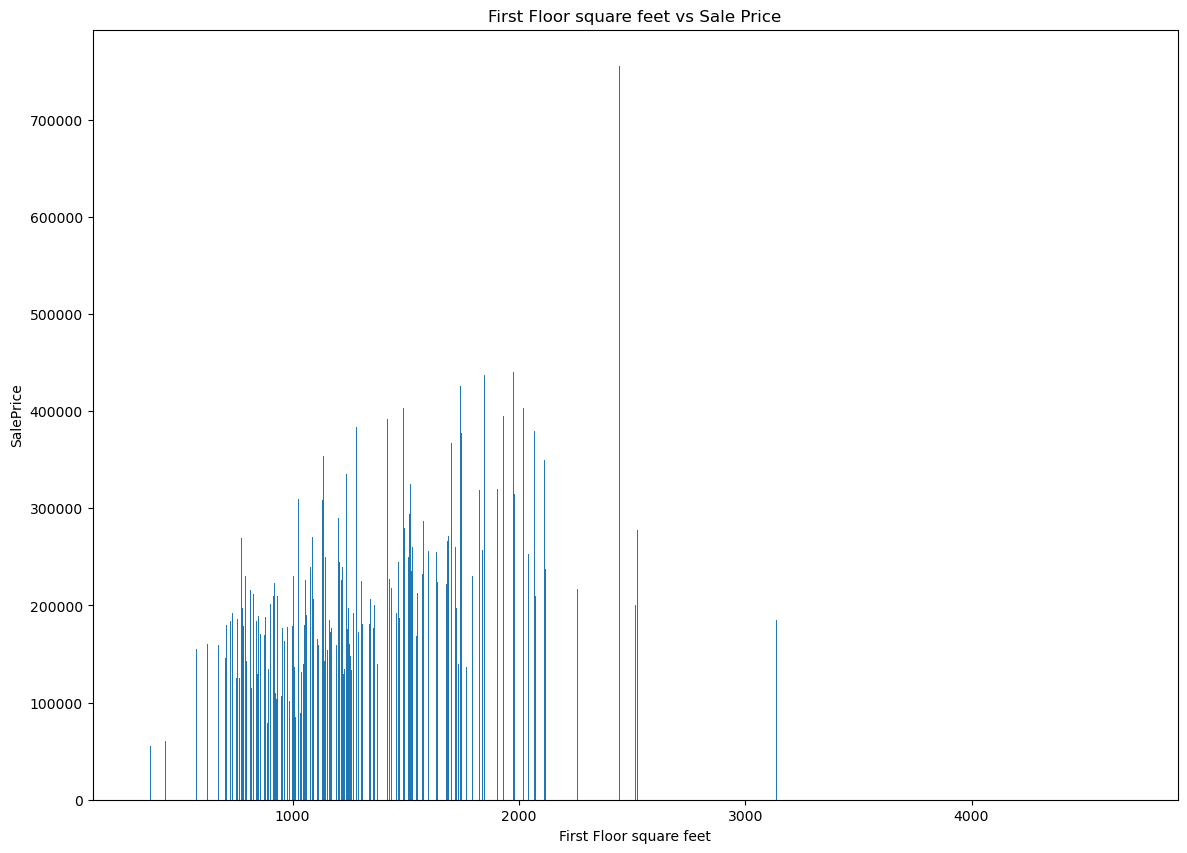

In [102]:
plt.figure(figsize=(14,10))
plt.bar(df["First Floor square feet"],df["SalePrice"])
plt.xlabel("First Floor square feet")
plt.ylabel("SalePrice")
plt.title("First Floor square feet vs Sale Price")
plt.show()

### Scatterplot

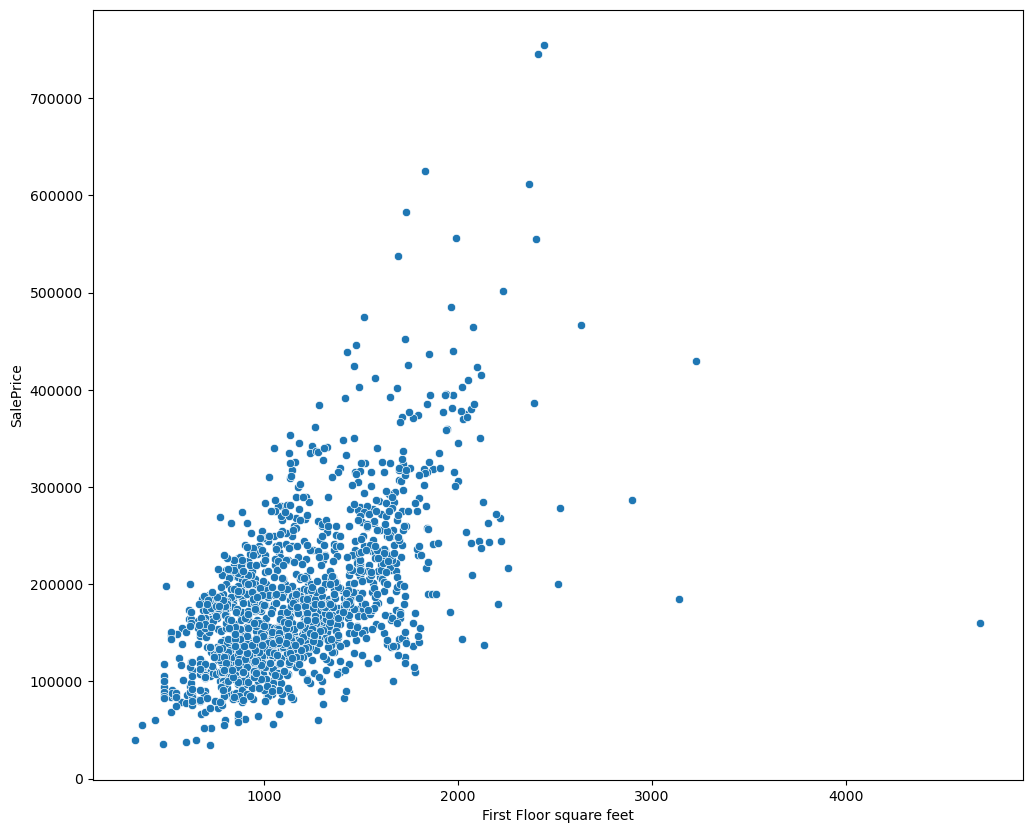

In [103]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="First Floor square feet",y="SalePrice",data=df)
plt.show()

### Jointplot

<Figure size 1200x1000 with 0 Axes>

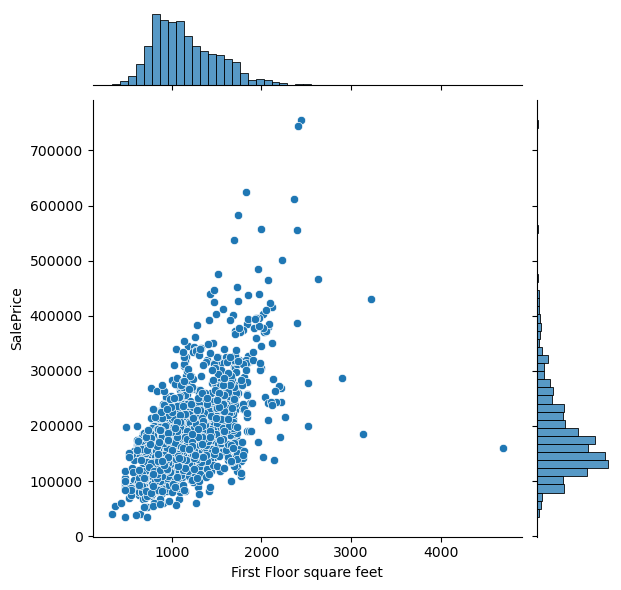

In [104]:
plt.figure(figsize=(12,10))
sns.jointplot(x='First Floor square feet',y="SalePrice",data=df)
plt.show()

### Analysis

1.First Floor sqaure feet with area around 2000 sq. feet has highest sale price.

2.Very less house above 2500 sq. feet area.

3.Max houses are around area of 500-1500 sq.ft with prices approx 1- 3 lakhs


# Bivraiate analysis on Above grad (ground) living area sqaure feet and Sale Price

### Unique values

In [105]:
df["Above grad (ground) living area sqaure feet"].unique()

array([1710, 1262, 1786, 1717, 2198, 1362, 1694, 2090, 1774, 1077, 1040,
       2324,  912, 1494, 1253,  854, 1004, 1296, 1114, 1339, 2376, 1108,
       1795, 1060, 1600,  900, 1704,  520, 1317, 1228, 1234, 1700, 1561,
       2452, 1097, 1297, 1057, 1152, 1324, 1328,  884,  938, 1150, 1752,
       2149, 1656, 1452,  955, 1470, 1176,  816, 1842, 1360, 1425, 1739,
       1720, 2945,  780, 1158, 1111, 1370, 2034, 2473, 2207, 1479,  747,
       2287, 2223,  845, 1718, 1086, 1605,  988,  952, 1285, 1768, 1230,
       2142, 1337, 1563, 1065, 1474, 2417, 1560, 1224, 1526,  990, 1235,
        964, 2291, 1588,  960,  835, 1225, 1610, 1732, 1535, 1226, 1818,
       1992, 1047,  789, 1517, 1844, 1855, 1430, 2696, 2259, 2320, 1458,
       1092, 1125, 3222, 1456, 1123, 1080, 1199, 1586,  754,  958,  840,
       1348, 1053, 2157, 2054, 1327, 1721, 1682, 1214, 1959, 1852, 1764,
        864, 1734, 1385, 1501, 1728, 1709,  875, 2035, 1344,  969, 1993,
       1252, 1200, 1096, 1968, 1947, 2462, 1232, 26

### Scatterplot

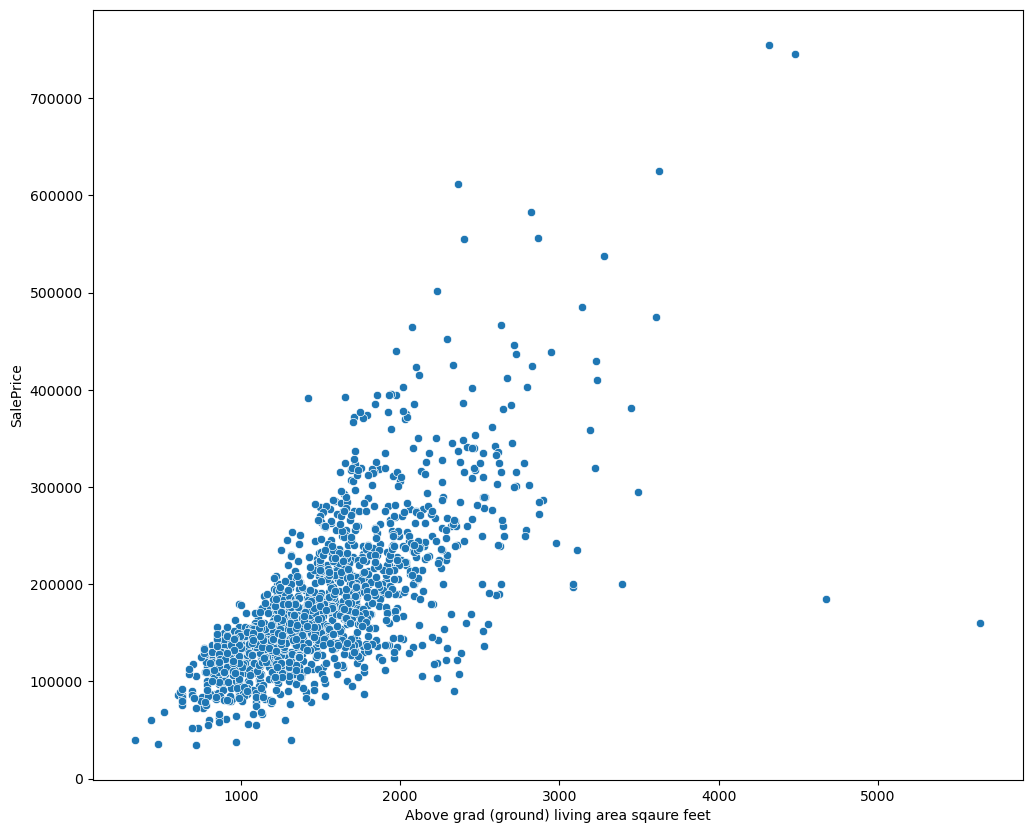

In [106]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Above grad (ground) living area sqaure feet",y='SalePrice',data=df)
plt.show()

### Jointplot

<Figure size 1200x1000 with 0 Axes>

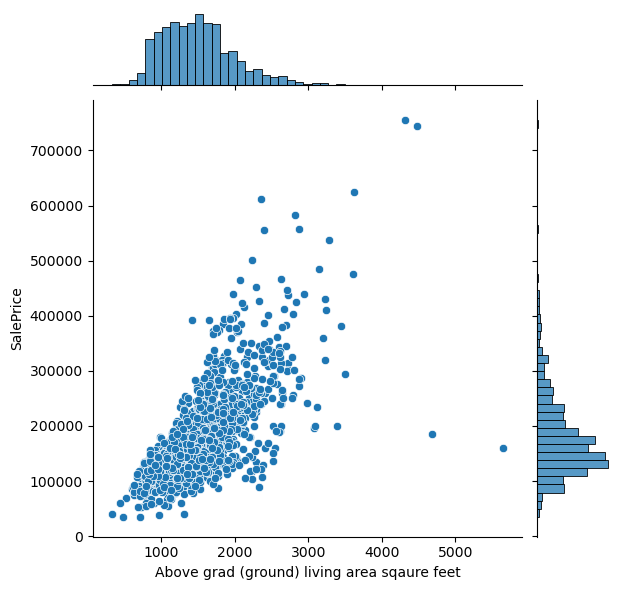

In [107]:
plt.figure(figsize=(12,10))
sns.jointplot(x="Above grad (ground) living area sqaure feet",y='SalePrice',data=df)
plt.show()

### Analysis

1.Houses with area around 2000 & 3000 sq.ft area have highest prices.

2.Very less houses with area morethan 3500 sq.ft.

3.Max houses are with area 1000 & 2000 sq.ft with prices ranging between 1-3 lakhs.

# Bivariate analysis on Full bath and SalePrice

In [108]:
df["Full bathrooms above grade"].unique()

array([2, 1, 3, 0], dtype=int64)

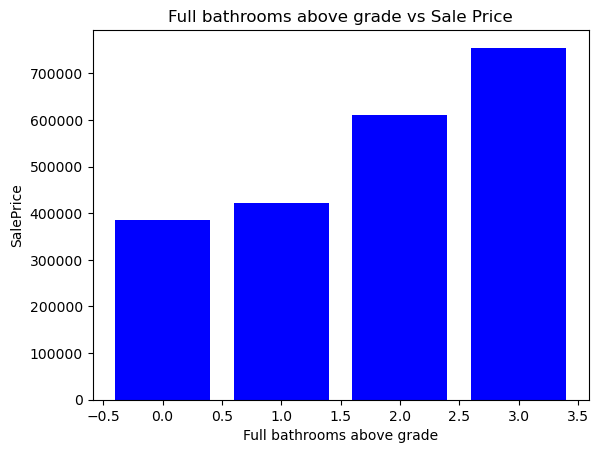

In [109]:
plt.bar(df["Full bathrooms above grade"],df['SalePrice'],color="blue")
plt.xlabel("Full bathrooms above grade")
plt.ylabel("SalePrice")
plt.title('Full bathrooms above grade vs Sale Price')
plt.show()

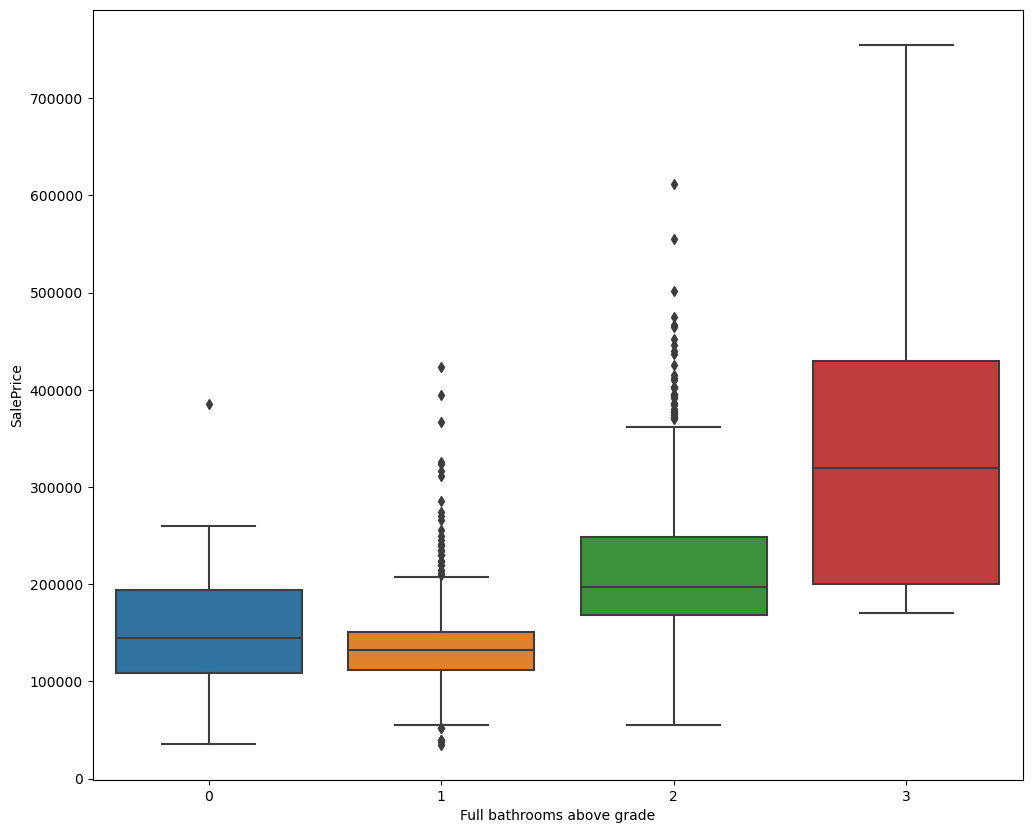

In [110]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Full bathrooms above grade",y="SalePrice",data=df)
plt.show()

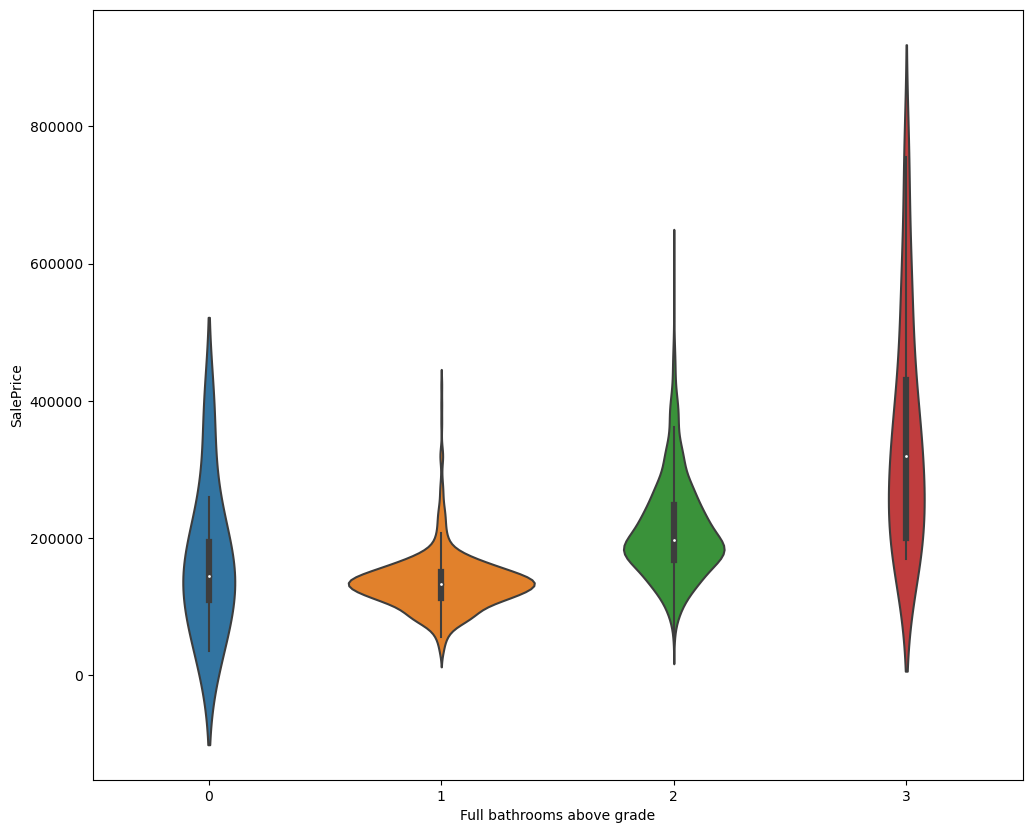

In [111]:
plt.figure(figsize=(12,10))
sns.violinplot(x="Full bathrooms above grade",y="SalePrice",data=df)
plt.show()

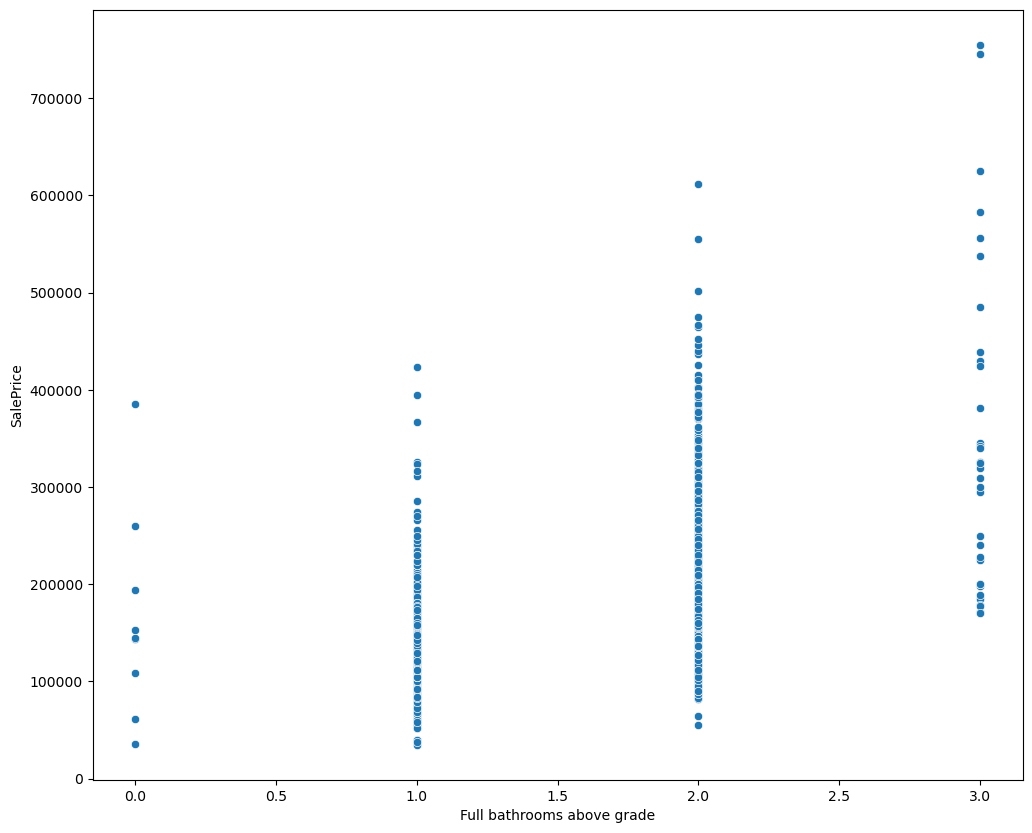

In [112]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Full bathrooms above grade",y="SalePrice",data=df)
plt.show()

### Analysis

1.Full Bath with 3 nos has the highest sales prices.

2.2 nos & 1 no have 2nd highest and 3rd highest sales prices.

3.Houses with zero full bath has lowest sales prices.

# Bivariate analysis on Total rooms above ground and Sale Price

In [113]:
df["Total rooms above ground"].unique()

array([ 8,  6,  7,  9,  5, 11,  4, 10, 12,  3,  2, 14], dtype=int64)

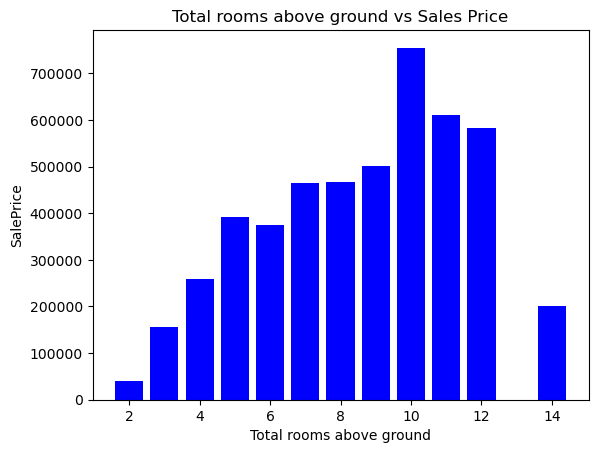

In [114]:
plt.bar(df['Total rooms above ground'],df['SalePrice'],color="blue")
plt.xlabel("Total rooms above ground")
plt.ylabel("SalePrice")
plt.title("Total rooms above ground vs Sales Price")
plt.show()

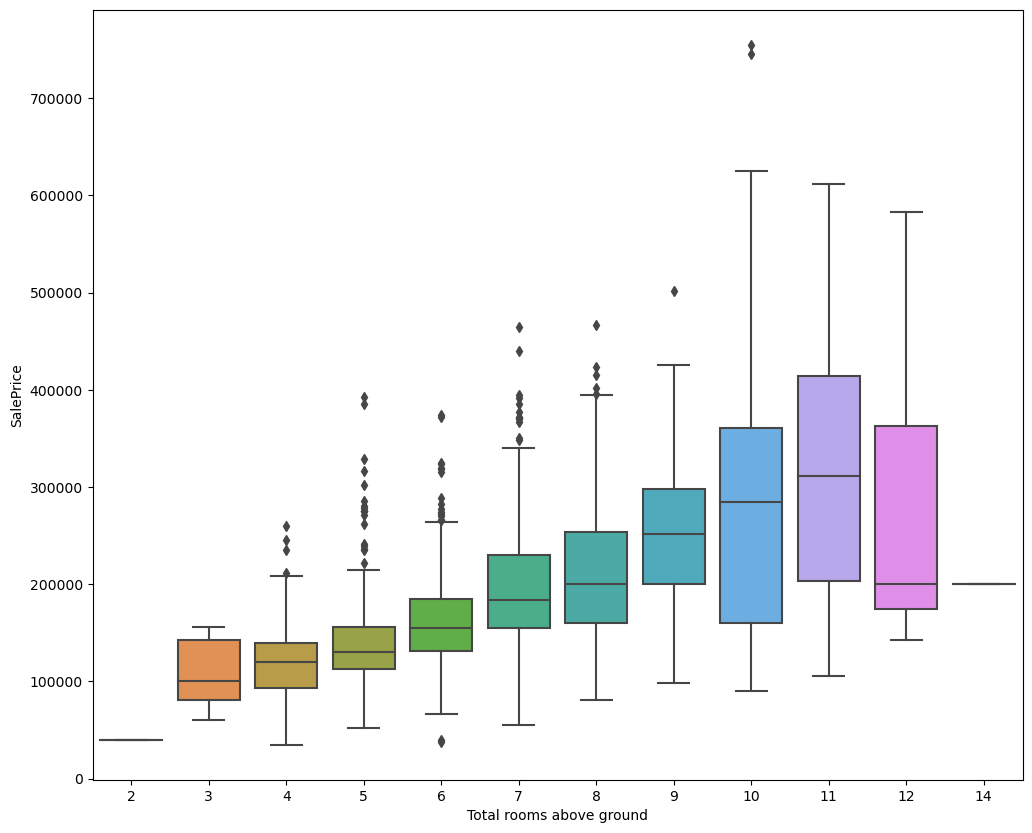

In [115]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Total rooms above ground",y="SalePrice",data=df)
plt.show()

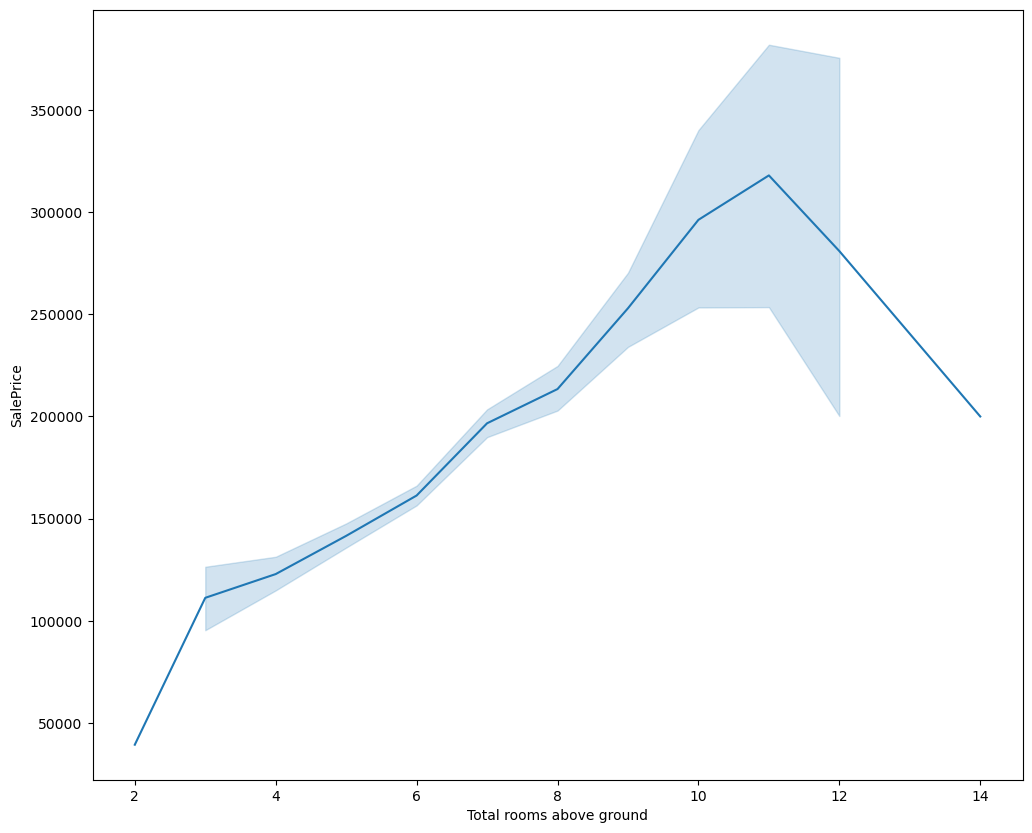

In [116]:
plt.figure(figsize=(12,10))
sns.lineplot(x="Total rooms above ground",y="SalePrice",data=df)
plt.show()

### Analysis

1.Houses with 10 rooms & 11 rooms have highest sales prices. Except some outliers in houses with 10 rooms
 11 rooms has more houses with higher sales price range.
    
2.No houses with 13 rooms

3.Houses with rooms 2 nos & 3 nos have lowest sales prices.

# Bivariate analysis on Number of fireplaces and Sales Prices

In [117]:
df["Number of fireplaces"].unique()

array([0, 1, 2, 3], dtype=int64)

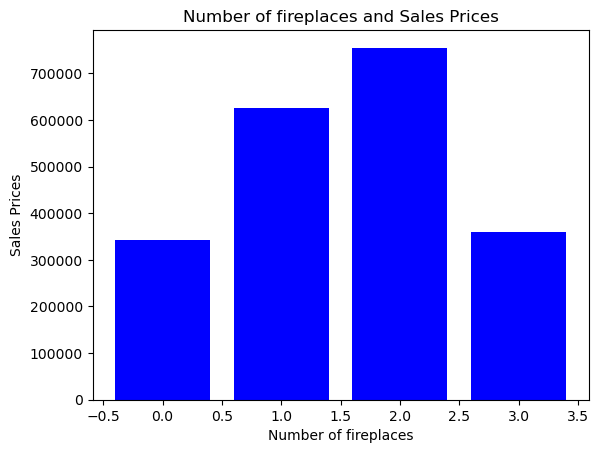

In [118]:
plt.bar(df["Number of fireplaces"],df["SalePrice"],color="blue")
plt.xlabel("Number of fireplaces")
plt.ylabel("Sales Prices")
plt.title("Number of fireplaces and Sales Prices")
plt.show()

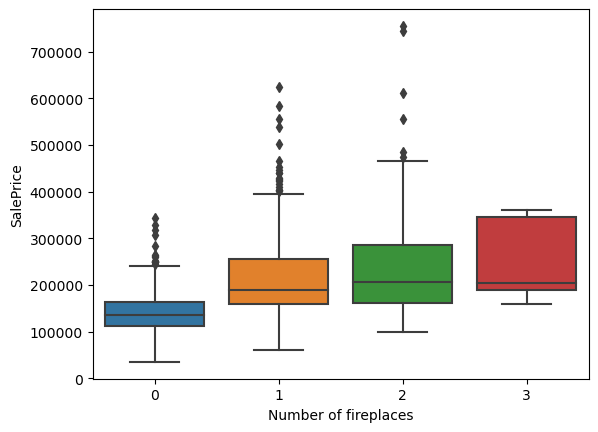

In [119]:
sns.boxplot(x="Number of fireplaces",y="SalePrice",data=df)
plt.show()

### Analysis

1.Houses with 2 nos Fireplaces has highest sales price and 1 no Fireplace has 2nd highest sales price.

2.Houses with zero Fireplaces has lowest sales price.

### Bivariate analysis on Year Garage was bulit and Sales Price

In [120]:
df["Year Garage was bulit"].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933.])

<Figure size 1800x1400 with 0 Axes>

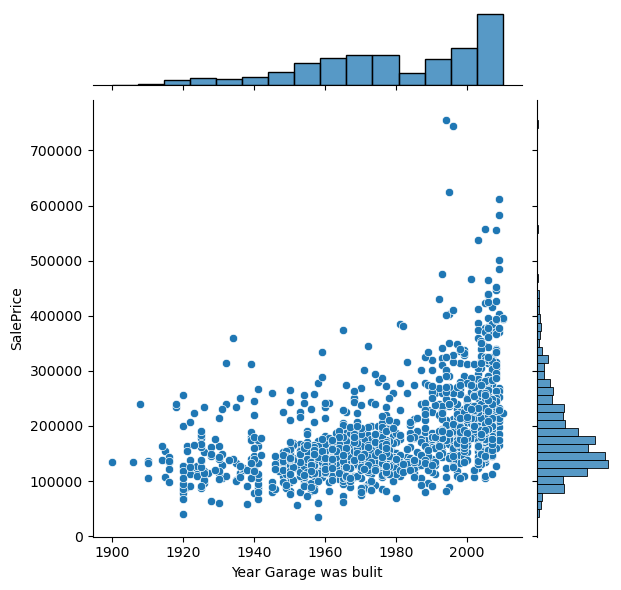

In [121]:
plt.figure(figsize=(18,14))
sns.jointplot(x="Year Garage was bulit",y="SalePrice",data=df)
plt.show()

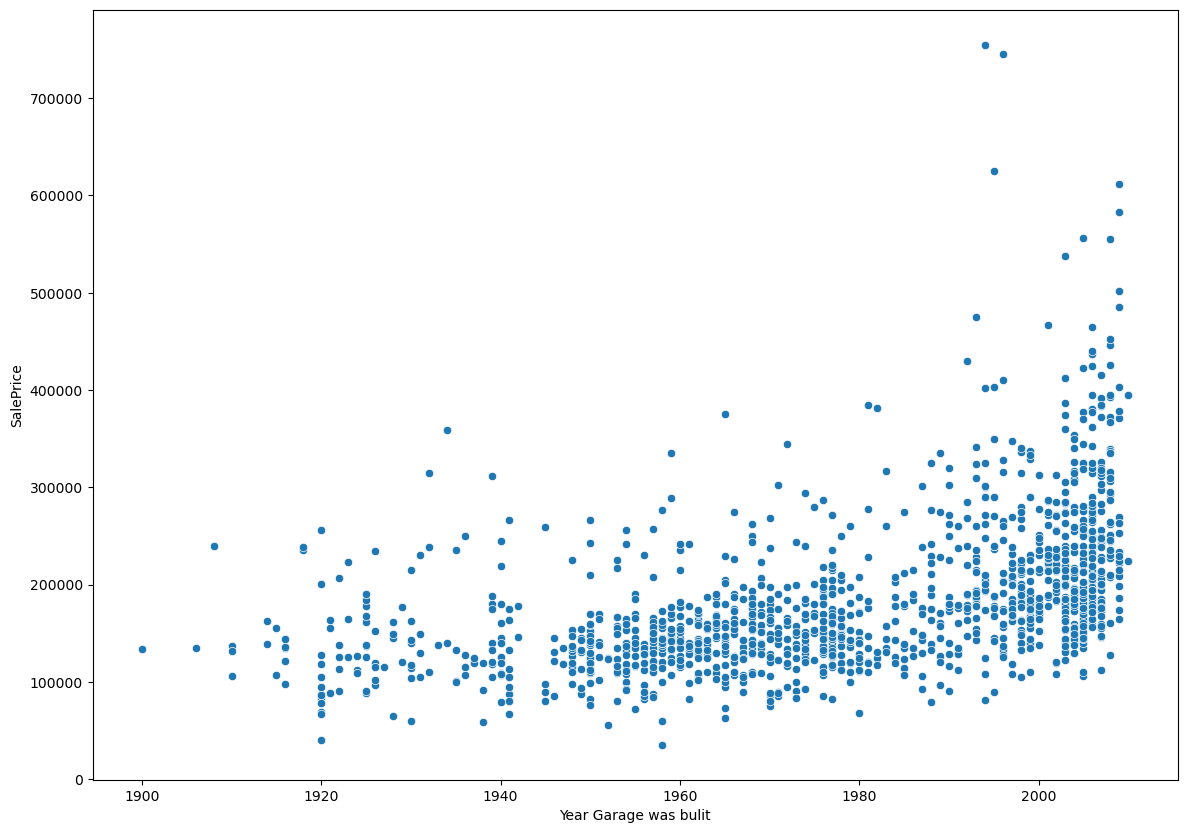

In [122]:
plt.figure(figsize=(14,10))
sns.scatterplot(x="Year Garage was bulit",y="SalePrice",data=df)
plt.show()

### Analysis

1.Garages built after 2000s has highest sales prices.

2.Garages built before 1930s has less sales prices.

3.Very less garages were built before 1920s

# Bivariate analysis on Garage car capacity and Sale Price

In [123]:
df['Garage car capacity'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

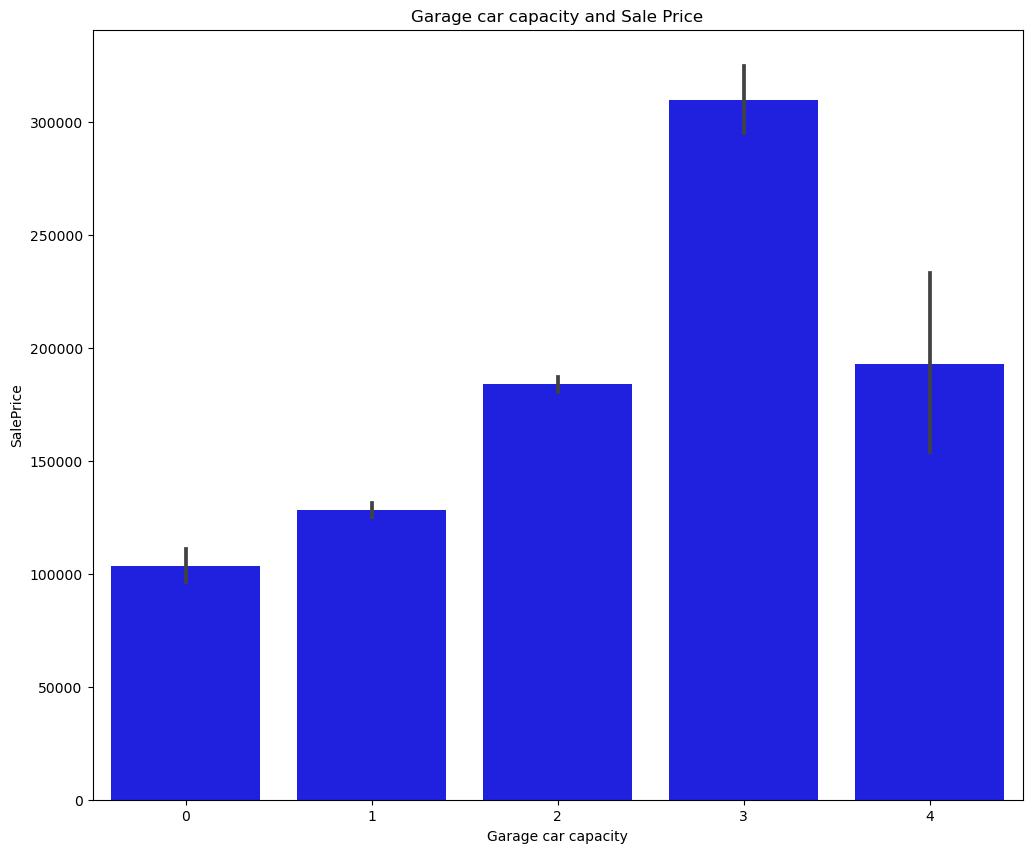

In [124]:
plt.figure(figsize=(12,10))
sns.barplot(x="Garage car capacity",y="SalePrice",data=df,color="blue")
plt.title("Garage car capacity and Sale Price")
plt.show()

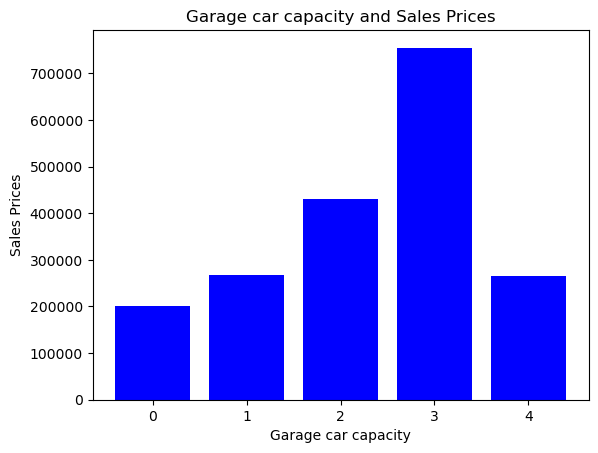

In [125]:
plt.bar(df["Garage car capacity"],df["SalePrice"],color="blue")
plt.xlabel("Garage car capacity")
plt.ylabel("Sales Prices")
plt.title("Garage car capacity and Sales Prices")
plt.show()

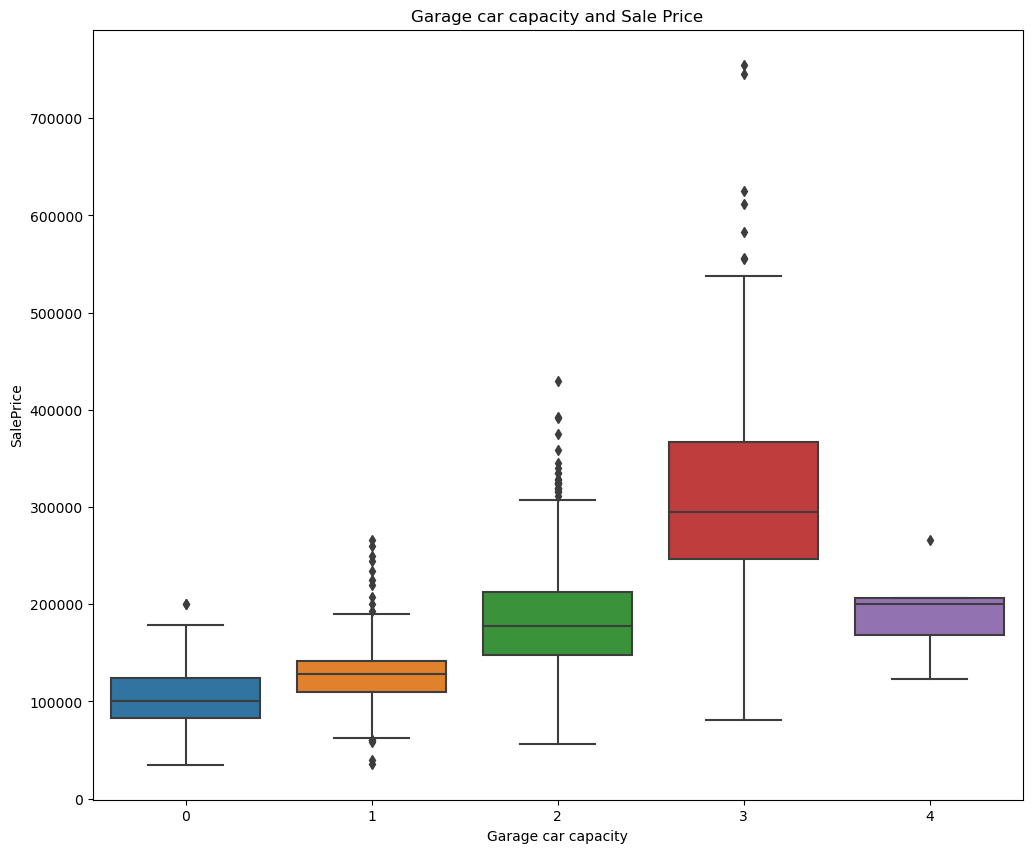

In [126]:
plt.figure(figsize=(12,10))
sns.boxplot(x="Garage car capacity",y="SalePrice",data=df)
plt.title("Garage car capacity and Sale Price")
plt.show()

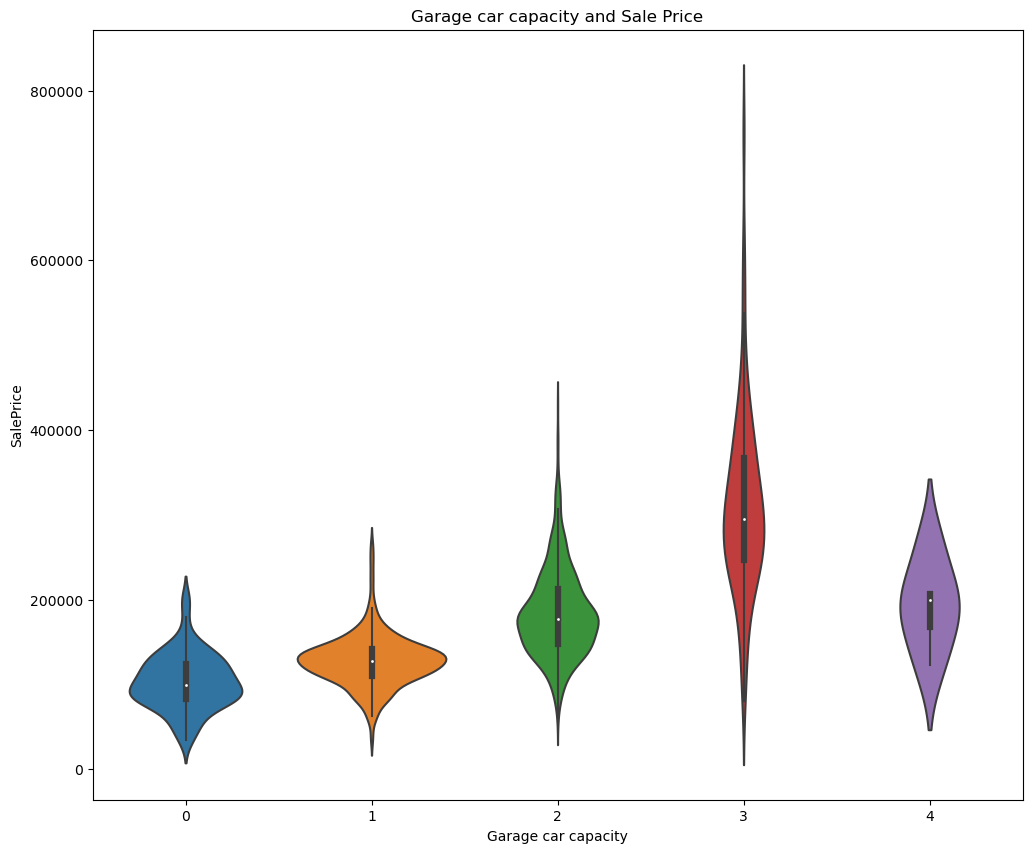

In [127]:
plt.figure(figsize=(12,10))
sns.violinplot(x="Garage car capacity",y="SalePrice",data=df)
plt.title("Garage car capacity and Sale Price")
plt.show()

### Analysis

1.Garage capicity of 3 has highest sales price while 2 garages has 2nd highest sales prices.

2.Houses with 2 nos garages has 3rd highest sales prices.

3.No garages has lowest sales prices.

### Bivariate analysis on Size of garage in sq. feet and Sale price

In [128]:
df["Size of garage in sq. feet"].unique()

array([ 548,  460,  608,  642,  836,  480,  636,  484,  468,  205,  384,
        736,  352,  840,  576,  516,  294,  853,  280,  534,  572,  270,
        890,  772,  319,  240,  250,  271,  447,  556,  691,  672,  498,
        246,    0,  440,  308,  504,  300,  670,  826,  386,  388,  528,
        894,  565,  641,  288,  645,  852,  558,  220,  667,  360,  427,
        490,  379,  297,  283,  509,  405,  758,  461,  400,  462,  420,
        432,  506,  684,  472,  366,  476,  410,  740,  648,  273,  546,
        325,  792,  450,  180,  430,  594,  390,  540,  264,  530,  435,
        453,  750,  487,  624,  471,  318,  766,  660,  470,  720,  577,
        380,  434,  866,  495,  564,  312,  625,  680,  678,  726,  532,
        216,  303,  789,  511,  616,  521,  451, 1166,  252,  497,  682,
        666,  786,  795,  856,  473,  398,  500,  349,  454,  644,  299,
        210,  431,  438,  675,  968,  721,  336,  810,  494,  457,  818,
        463,  604,  389,  538,  520,  309,  429,  6

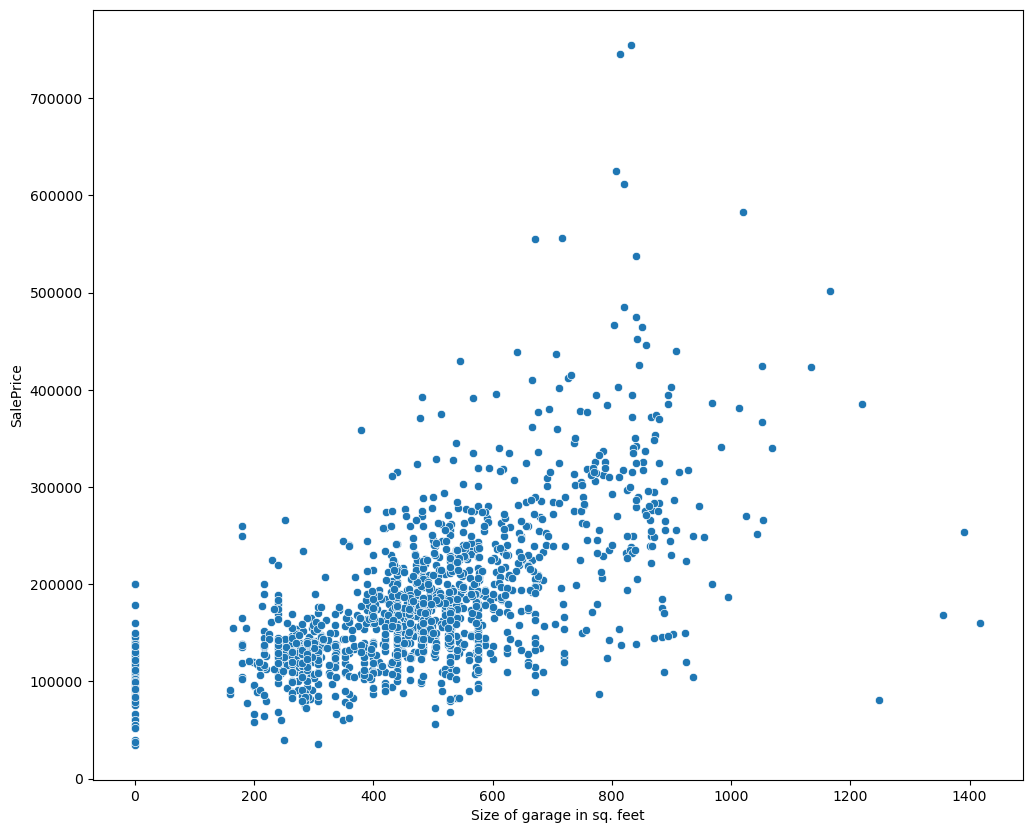

In [129]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="Size of garage in sq. feet",y="SalePrice",data=df)
plt.show()

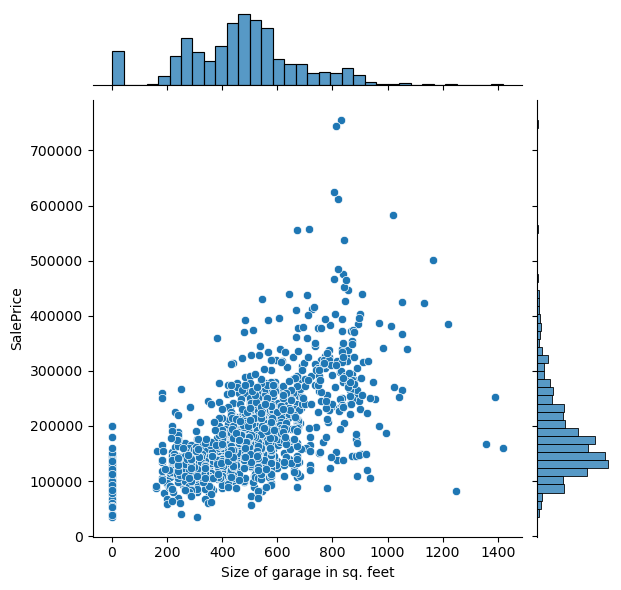

In [130]:
sns.jointplot(x="Size of garage in sq. feet",y="SalePrice",data=df)
plt.show()

### Analysis

1.Houses with garage capacity around 900 sq.ft has highest sales prices.

2.Maximum garages are in size around 400-600 sq.ft with price ranging from 1.5 to 2.5 lakhs.

3.Very few garages with capacity above 1100sq.ft

# Bivariate analysis on Years Sold and Sale Price

In [131]:
df['YrSold'].unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

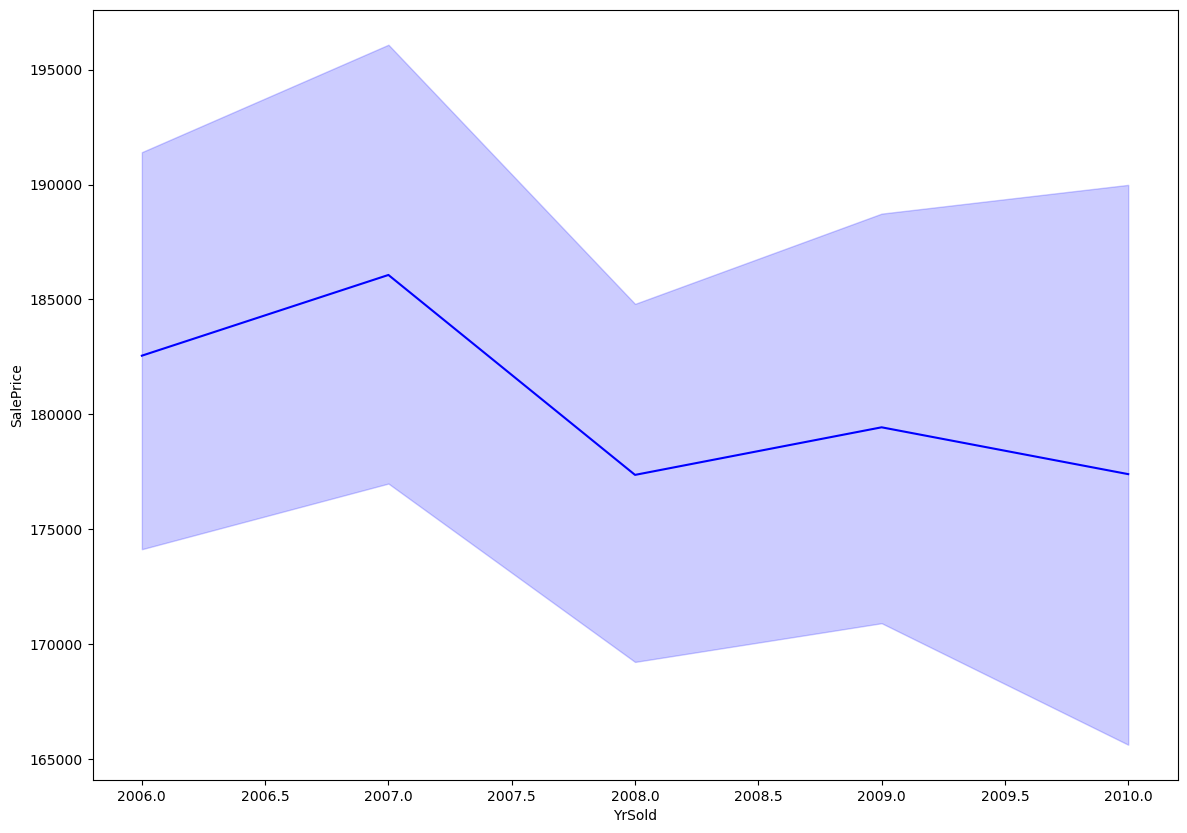

In [132]:
plt.figure(figsize=(14,10))
sns.lineplot(x="YrSold",y="SalePrice",data=df,color="blue")
plt.show()

### Multivariate analysis

taking all less correlated columns in new data subset

In [138]:
lessCorr_columns=df[['Type 1 finished aquare feet','Second floor square feet','Half bath above grade',
                    'Wood deck area in sq. feet',"Open porch area in sq. feet",'SalePrice']]
lessCorr_columns

Type 1 finished aquare feet  Second floor square feet  \
0                             706                       854   
1                             978                         0   
2                             486                       866   
3                             216                       756   
4                             655                      1053   
...                           ...                       ...   
1455                            0                       694   
1456                          790                         0   
1457                          275                      1152   
1458                           49                         0   
1459                          830                         0   

      Half bath above grade  Wood deck area in sq. feet  \
0                         1                           0   
1                         0                         298   
2                         1                           0   
3                         0                           0   
4                         1                         192   
...                     ...                         ...   
1455                      1                           0   
1456                      0                         349   
1457                      0                           0   
1458                      0                         366   
1459                      1                         736   

      Open porch area in sq. feet  SalePrice  
0                              61     208500  
1                               0     181500  
2                              42     223500  
3                              35     140000  
4                              84     250000  
...                           ...        ...  
1455                           40     175000  
1456                            0     210000  
1457                           60     266500  
1458                            0     142125  
1459                           68     147500  

[1460 rows x 6 columns]

<Figure size 1600x1200 with 0 Axes>

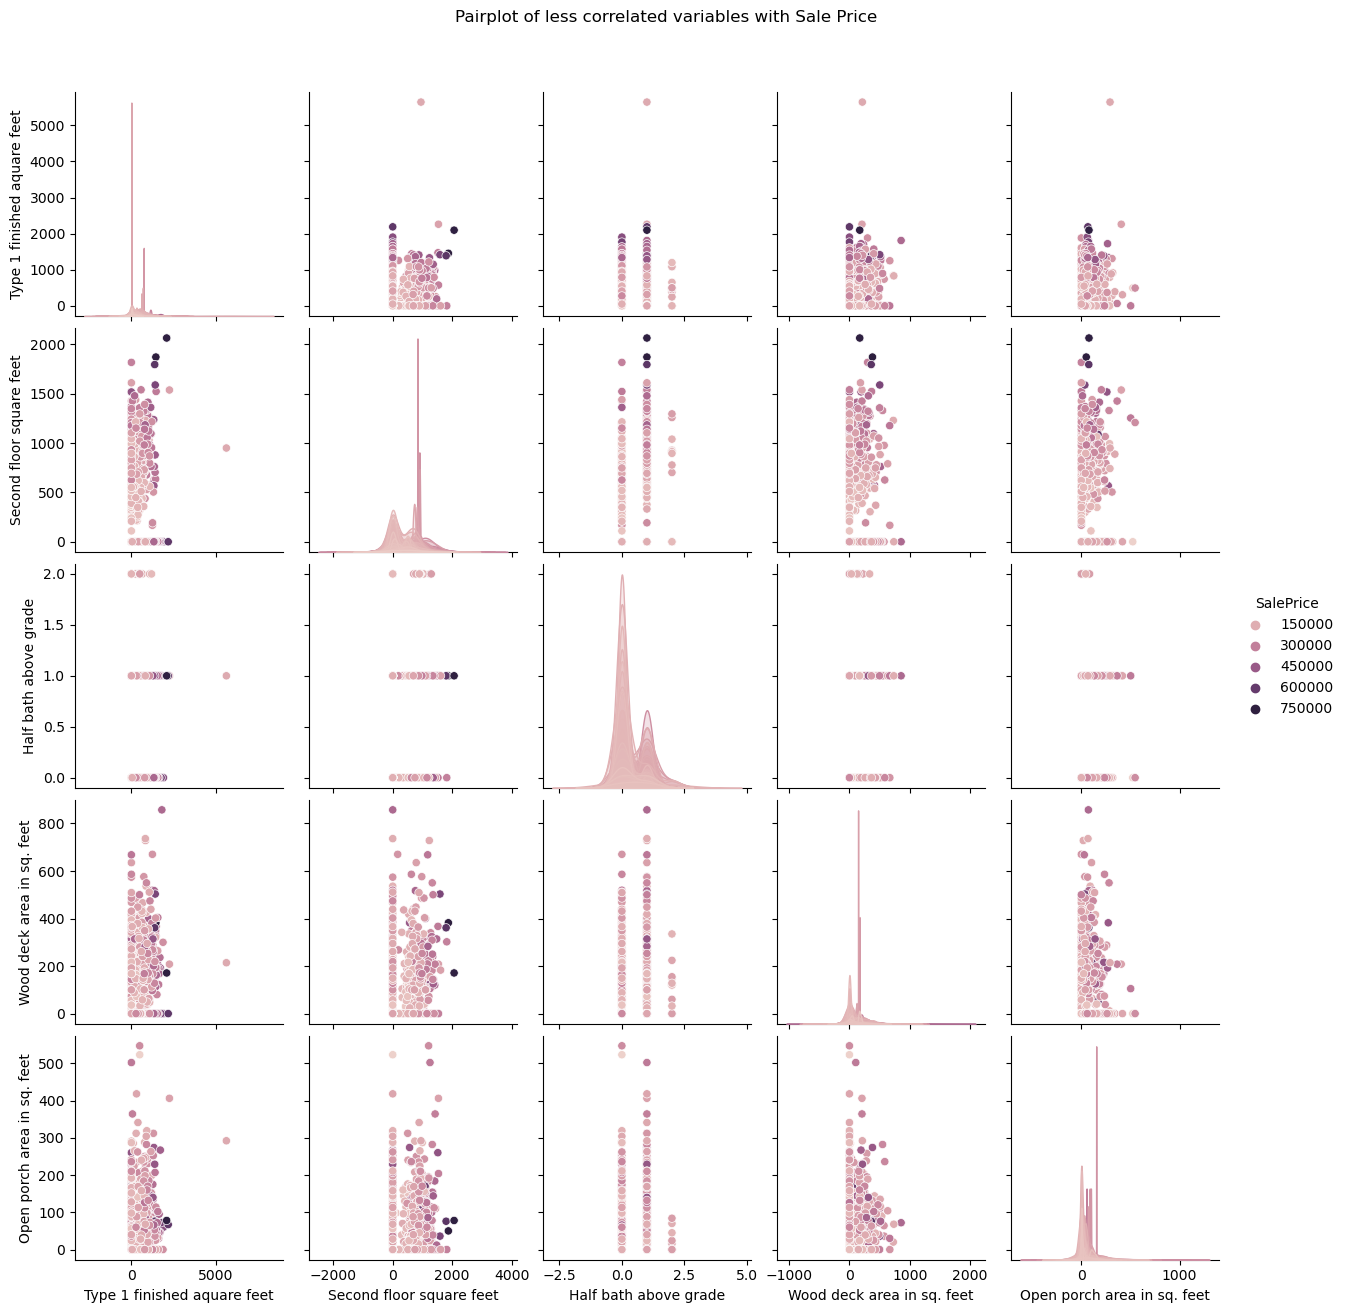

In [140]:
plt.figure(figsize=(16,12))
sns.pairplot(lessCorr_columns,hue="SalePrice")
plt.suptitle("Pairplot of less correlated variables with Sale Price",y=1.05)
plt.show()